In [1]:
import dill

In [2]:
import os
os.getcwd()

'C:\\Users\\aniru\\Winter project'

In [3]:
original_directory = r"C:\Users\aniru\Winter project"

In [4]:
# dill.load_session(os.path.join(original_directory, 'PB23_WP.db'))
dill.load_session('PB23_WP.db')

In [36]:
dill.dump_session(os.path.join(original_directory, 'PB23_WP.db'))

In [37]:
dill.dump_session('PB23_WP_alt.db')

In [20]:
!pip show ipython

Name: ipython
Version: 8.15.0
Summary: IPython: Productive Interactive Computing
Home-page: https://ipython.org
Author: The IPython Development Team
Author-email: ipython-dev@python.org
License: BSD-3-Clause
Location: c:\users\aniru\anaconda3\lib\site-packages
Requires: backcall, colorama, decorator, exceptiongroup, jedi, matplotlib-inline, pickleshare, prompt-toolkit, pygments, stack-data, traitlets, typing-extensions
Required-by: ipykernel, ipywidgets, jupyter-console, spyder, spyder-kernels


In [8]:
print("Hello world!")

Hello world!


In [3]:
import sys
sys.version

'3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]'

In [4]:
!pip show matplotlib

Name: matplotlib
Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\aniru\anaconda3\lib\site-packages
Requires: contourpy, cycler, fonttools, importlib-resources, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn, torch-lr-finder


In [6]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
# from sklearn.compose import make_column_transformer
from sklearn.datasets import make_classification
import time
from sklearn.model_selection import GridSearchCV, train_test_split
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from scipy.stats import pointbiserialr, spearmanr
import itertools
import winsound
from xgboost import XGBClassifier as XC
from sklearn.svm import SVC

In [293]:
X_t = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv", index_col = 0)
X_nt = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv", index_col = 0)
X_nt

AGE  DM  HTN  CKD  INCIDENTAL  PAIN  HEMATURIA  MASS  LOW  FEVER  ...  \
141   52   0    0    0           0     0          1     0  0.0      0  ...   
297   61   0    1    0           0     0          0     0  0.0      1  ...   
670   58   0    0    0           0     1          0     0  0.0      0  ...   
364   75   0    1    0           1     0          0     0  0.0      0  ...   
392   17   0    0    0           0     0          1     0  0.0      0  ...   
..   ...  ..  ...  ...         ...   ...        ...   ...  ...    ...  ...   
244   50   0    0    0           0     1          0     0  0.0      0  ...   
325   50   0    1    0           0     1          0     0  0.0      0  ...   
608   44   0    0    0           0     1          0     0  0.0      0  ...   
664   63   0    0    0           1     0          0     0  0.0      0  ...   
542   43   0    0    0           0     1          0     0  0.0      0  ...   

     SEX_M  SITE_BL  SITE_LEFT  SITE_RIGHT  HISTOPATHOLOGY_CC  \
141      0        0          1           0                  1   
297      1        0          1           0                  1   
670      0        0          1           0                  1   
364      0        0          0           1                  1   
392      1        0          0           1                  1   
..     ...      ...        ...         ...                ...   
244      1        0          1           0                  1   
325      1        0          0           1                  1   
608      1        0          0           1                  1   
664      1        0          1           0                  1   
542      1        0          0           1                  1   

     HISTOPATHOLOGY_PAP  APPROACH_1  APPROACH_2  APPROACH_3  RECURRENCE  
141                   0           1           0           0           0  
297                   0           0           1           0           1  
670                   0           0           1           0           0  
364                   0           0           1           0           0  
392                   0           0           1           0           0  
..                  ...         ...         ...         ...         ...  
244                   0           0           0           1           0  
325                   0           1           0           0           0  
608                   0           0           1           0           0  
664                   0           1           0           0           0  
542                   0           0           1           0           0  

[485 rows x 28 columns]

In [4]:
X = pd.concat([X_nt, X_t])
y = X.pop("RECURRENCE")
y_nt = X_nt.pop("RECURRENCE")
y_t = X_t.pop("RECURRENCE")

In [5]:
X.isna().sum(axis = 1) == 1

141    False
297    False
670    False
364    False
392    False
       ...  
502    False
656    False
130    False
145    False
92     False
Length: 694, dtype: bool

In [6]:
X.loc[63, 'LOW'] = 0

In [7]:
X.loc[X.isna().sum(axis = 1) == 1, 'GRADE'] = 2

In [8]:
X.GRADE.value_counts()

GRADE
2.0    289
1.0    226
3.0    123
4.0     56
Name: count, dtype: int64

In [9]:
dummy_X = X.copy()

In [10]:
dummy_X.columns
# one hot:
# 'SEX_F', 'SEX_M'
# 'SITE_BL', 'SITE_LEFT', 'SITE_RIGHT'
# 'HISTOPATHOLOGY_CC', 'HISTOPATHOLOGY_PAP'
# 'APPROACH_1', 'APPROACH_2', 'APPROACH_3'
# drop: SEX_F, SITE_BL, HISTOPATHOLOGY_PAP, HISTOPATHOLOGY_CC, APPROACH_3

Index(['AGE', 'DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA', 'MASS',
       'LOW', 'FEVER', 'T', 'N', 'M', 'IVC INV', 'MAX DIA', 'GRADE', 'MONTHS',
       'SEX_F', 'SEX_M', 'SITE_BL', 'SITE_LEFT', 'SITE_RIGHT',
       'HISTOPATHOLOGY_CC', 'HISTOPATHOLOGY_PAP', 'APPROACH_1', 'APPROACH_2',
       'APPROACH_3'],
      dtype='object')

In [11]:
dummy_X.HISTOPATHOLOGY_PAP.value_counts()

HISTOPATHOLOGY_PAP
0    690
1      4
Name: count, dtype: int64

In [12]:
dummy_X.SITE_BL.value_counts()

SITE_BL
0    690
1      4
Name: count, dtype: int64

In [13]:
dummy_X.SITE_LEFT.value_counts()

SITE_LEFT
0    371
1    323
Name: count, dtype: int64

In [14]:
dummy_X.SITE_RIGHT.value_counts()

SITE_RIGHT
1    367
0    327
Name: count, dtype: int64

In [15]:
drop_onehot = ['SEX_F', 'SITE_BL', 'HISTOPATHOLOGY_PAP', 'APPROACH_3']
dummy_X = dummy_X.drop(columns = drop_onehot)

In [16]:
dummy_X

AGE  DM  HTN  CKD  INCIDENTAL  PAIN  HEMATURIA  MASS  LOW  FEVER  ...  \
141   52   0    0    0           0     0          1     0  0.0      0  ...   
297   61   0    1    0           0     0          0     0  0.0      1  ...   
670   58   0    0    0           0     1          0     0  0.0      0  ...   
364   75   0    1    0           1     0          0     0  0.0      0  ...   
392   17   0    0    0           0     0          1     0  0.0      0  ...   
..   ...  ..  ...  ...         ...   ...        ...   ...  ...    ...  ...   
502   20   0    0    0           0     1          0     0  0.0      0  ...   
656   43   0    0    0           0     0          1     0  0.0      0  ...   
130   32   0    0    0           1     0          0     0  0.0      0  ...   
145   29   0    0    0           0     1          0     0  0.0      0  ...   
92    39   0    0    0           1     0          0     0  0.0      0  ...   

     IVC INV  MAX DIA  GRADE  MONTHS  SEX_M  SITE_LEFT  SITE_RIGHT  \
141        0     12.5    1.0      71      0          1           0   
297        0      8.9    2.0      52      1          1           0   
670        0      3.5    1.0      19      0          1           0   
364        0      2.5    3.0      52      0          0           1   
392        0      5.0    1.0      50      1          0           1   
..       ...      ...    ...     ...    ...        ...         ...   
502        0      6.0    1.0      38      1          1           0   
656        0      7.0    2.0      21      1          0           1   
130        0      5.0    3.0      73      0          1           0   
145        0      4.7    2.0      71      0          0           1   
92         0      7.0    2.0      79      0          0           1   

     HISTOPATHOLOGY_CC  APPROACH_1  APPROACH_2  
141                  1           1           0  
297                  1           0           1  
670                  1           0           1  
364                  1           0           1  
392                  1           0           1  
..                 ...         ...         ...  
502                  1           0           1  
656                  1           0           1  
130                  1           1           0  
145                  1           0           0  
92                   1           1           0  

[694 rows x 23 columns]

In [17]:
dummy_X.isna().sum().sum()

0

In [18]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dummy_X)
scaled_dummy = pd.DataFrame(scaled_data, columns = dummy_X.columns)

In [19]:
scaled_dummy

AGE   DM  HTN  CKD  INCIDENTAL  PAIN  HEMATURIA  MASS  LOW  FEVER  \
0    0.519481  0.0  0.0  0.0         0.0   0.0        1.0   0.0  0.0    0.0   
1    0.636364  0.0  1.0  0.0         0.0   0.0        0.0   0.0  0.0    1.0   
2    0.597403  0.0  0.0  0.0         0.0   1.0        0.0   0.0  0.0    0.0   
3    0.818182  0.0  1.0  0.0         1.0   0.0        0.0   0.0  0.0    0.0   
4    0.064935  0.0  0.0  0.0         0.0   0.0        1.0   0.0  0.0    0.0   
..        ...  ...  ...  ...         ...   ...        ...   ...  ...    ...   
689  0.103896  0.0  0.0  0.0         0.0   1.0        0.0   0.0  0.0    0.0   
690  0.402597  0.0  0.0  0.0         0.0   0.0        1.0   0.0  0.0    0.0   
691  0.259740  0.0  0.0  0.0         1.0   0.0        0.0   0.0  0.0    0.0   
692  0.220779  0.0  0.0  0.0         0.0   1.0        0.0   0.0  0.0    0.0   
693  0.350649  0.0  0.0  0.0         1.0   0.0        0.0   0.0  0.0    0.0   

     ...  IVC INV   MAX DIA     GRADE    MONTHS  SEX_M  SITE_LEFT  SITE_RIGHT  \
0    ...      0.0  0.414894  0.000000  0.688312    0.0        1.0         0.0   
1    ...      0.0  0.287234  0.333333  0.441558    1.0        1.0         0.0   
2    ...      0.0  0.095745  0.000000  0.012987    0.0        1.0         0.0   
3    ...      0.0  0.060284  0.666667  0.441558    0.0        0.0         1.0   
4    ...      0.0  0.148936  0.000000  0.415584    1.0        0.0         1.0   
..   ...      ...       ...       ...       ...    ...        ...         ...   
689  ...      0.0  0.184397  0.000000  0.259740    1.0        1.0         0.0   
690  ...      0.0  0.219858  0.333333  0.038961    1.0        0.0         1.0   
691  ...      0.0  0.148936  0.666667  0.714286    0.0        1.0         0.0   
692  ...      0.0  0.138298  0.333333  0.688312    0.0        0.0         1.0   
693  ...      0.0  0.219858  0.333333  0.792208    0.0        0.0         1.0   

     HISTOPATHOLOGY_CC  APPROACH_1  APPROACH_2  
0                  1.0         1.0         0.0  
1                  1.0         0.0         1.0  
2                  1.0         0.0         1.0  
3                  1.0         0.0         1.0  
4                  1.0         0.0         1.0  
..                 ...         ...         ...  
689                1.0         0.0         1.0  
690                1.0         0.0         1.0  
691                1.0         1.0         0.0  
692                1.0         0.0         0.0  
693                1.0         1.0         0.0  

[694 rows x 23 columns]

In [20]:
# check for variances AFTER standardizing!!!
variances = scaled_dummy.var()
sorted_columns = variances.sort_values(ascending = False).index
ordered_X = X[sorted_columns]

In [29]:
variances[sorted_columns] # can't get a complete picture at the moment

APPROACH_2           0.250192
SITE_RIGHT           0.249529
SITE_LEFT            0.249163
APPROACH_1           0.238665
PAIN                 0.236037
INCIDENTAL           0.220420
SEX_M                0.220420
HEMATURIA            0.180729
HTN                  0.179198
DM                   0.111957
M                    0.098783
GRADE                0.091852
T                    0.073573
MONTHS               0.071325
N                    0.061978
LOW                  0.061978
IVC INV              0.047958
FEVER                0.042735
CKD                  0.028028
AGE                  0.027809
MASS                 0.022556
MAX DIA              0.014074
HISTOPATHOLOGY_CC    0.005739
dtype: float64

In [33]:
def make_mi_scores(data, target, discrete_features):
    mi_scores = mutual_info_classif(data, target, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=data.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [41]:
discrete_vars = dummy_X.dtypes == 'int64'
discrete_vars

AGE                   True
DM                    True
HTN                   True
CKD                   True
INCIDENTAL            True
PAIN                  True
HEMATURIA             True
MASS                  True
LOW                  False
FEVER                 True
T                     True
N                     True
M                     True
IVC INV               True
MAX DIA              False
GRADE                False
MONTHS                True
SEX_M                 True
SITE_LEFT             True
SITE_RIGHT            True
HISTOPATHOLOGY_CC     True
APPROACH_1            True
APPROACH_2            True
dtype: bool

# WHAT STEPS SHOULD I TAKE?
Back to basics:
1) First look for correlations between each column, and the target variable.
2) Look for anything among the columns.

In [ ]:
# i really am distracted aren't i?
# doing things like a headless chicken at times
# my workplace is a mess, so i first should clean it
# restart the kernel.
# what do i want?
# first i will remove the obvious outlier in the MAX DIA column.
# i have an order based on mutual information, and an order based on correlation, even if the correlations are slightly different
# i want to factor in variance as well. should i standardize?
# if i don't standardize, the scales will bias the variance ordering and not help me any further
# if i z-score standardize, i lose all the information due to variance
# if i min-max normalize, all the values are compressed between 0 and 1, and so calculating the variance is easier.
# so, i will perform min-max scaling.
# i will then calculate the mutual information. how will i handle discrete_vars?
# i will then calculate the correlations with RECURRENCE
# i will then have a list of column subsets which i shall experiment with.
# i will note down, in the next cell, all the columns and how important they are, and whether they must definitely be kept, must definitely be removed,
# or are in a bit of a grey zone.

In [54]:
dummy_X['RECURRENCE'] = y

In [55]:
dummy_X

AGE  DM  HTN  CKD  INCIDENTAL  PAIN  HEMATURIA  MASS  LOW  FEVER  ...  \
141   52   0    0    0           0     0          1     0  0.0      0  ...   
297   61   0    1    0           0     0          0     0  0.0      1  ...   
670   58   0    0    0           0     1          0     0  0.0      0  ...   
364   75   0    1    0           1     0          0     0  0.0      0  ...   
392   17   0    0    0           0     0          1     0  0.0      0  ...   
..   ...  ..  ...  ...         ...   ...        ...   ...  ...    ...  ...   
502   20   0    0    0           0     1          0     0  0.0      0  ...   
656   43   0    0    0           0     0          1     0  0.0      0  ...   
130   32   0    0    0           1     0          0     0  0.0      0  ...   
145   29   0    0    0           0     1          0     0  0.0      0  ...   
92    39   0    0    0           1     0          0     0  0.0      0  ...   

     MAX DIA  GRADE  MONTHS  SEX_M  SITE_LEFT  SITE_RIGHT  HISTOPATHOLOGY_CC  \
141     12.5    1.0      71      0          1           0                  1   
297      8.9    2.0      52      1          1           0                  1   
670      3.5    1.0      19      0          1           0                  1   
364      2.5    3.0      52      0          0           1                  1   
392      5.0    1.0      50      1          0           1                  1   
..       ...    ...     ...    ...        ...         ...                ...   
502      6.0    1.0      38      1          1           0                  1   
656      7.0    2.0      21      1          0           1                  1   
130      5.0    3.0      73      0          1           0                  1   
145      4.7    2.0      71      0          0           1                  1   
92       7.0    2.0      79      0          0           1                  1   

     APPROACH_1  APPROACH_2  RECURRENCE  
141           1           0           0  
297           0           1           1  
670           0           1           0  
364           0           1           0  
392           0           1           0  
..          ...         ...         ...  
502           0           1           0  
656           0           1           0  
130           1           0           0  
145           0           0           0  
92            1           0           0  

[694 rows x 24 columns]

In [58]:
dummy_X.loc[dummy_X['MAX DIA'] > 25, 'MAX DIA']

83    29.0
Name: MAX DIA, dtype: float64

In [59]:
dummy_X = dummy_X.drop(index = 83)

<Axes: xlabel='RECURRENCE', ylabel='MAX DIA'>

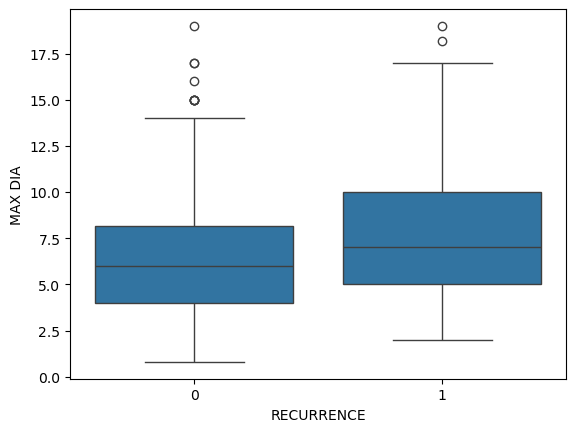

In [62]:
sns.boxplot(x='RECURRENCE', y='MAX DIA', data=dummy_X)

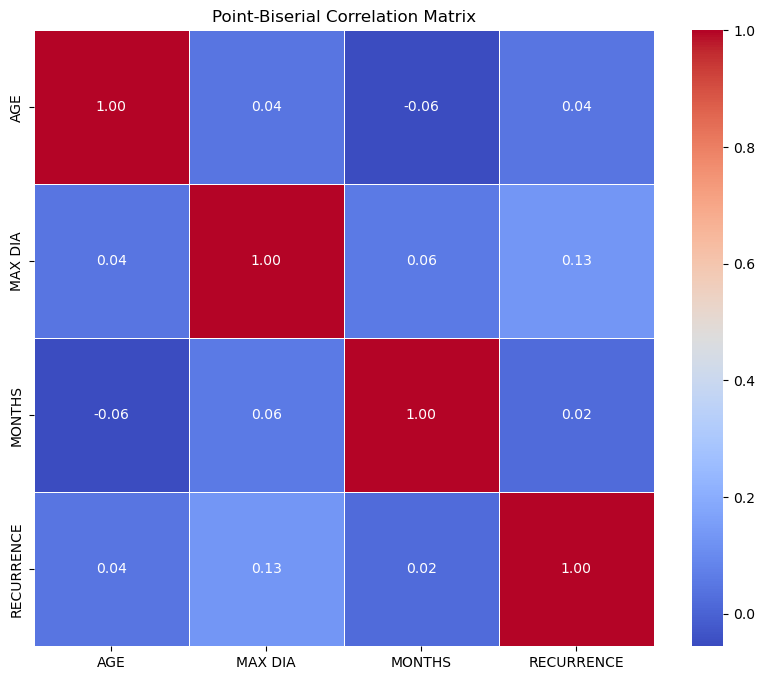

RECURRENCE    1.000000
MAX DIA       0.130012
AGE           0.044141
MONTHS        0.021506
Name: RECURRENCE, dtype: float64


In [64]:
# Assuming df is your DataFrame and 'target' is the binary target column
temp_df = dummy_X[['AGE', 'MAX DIA', 'MONTHS', 'RECURRENCE']]
correlation_matrix = temp_df.corr(method='pearson')
correlation_with_target = correlation_matrix['RECURRENCE'].sort_values(ascending=False)

# Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Point-Biserial Correlation Matrix')
plt.show()

# Display correlation with the target
print(correlation_with_target)

In [65]:
for feature in ['AGE', 'MAX DIA', 'MONTHS']:
    pb_corr, p_value = pointbiserialr(temp_df[feature], dummy_X['RECURRENCE'])
    print(f"Point-Biserial Correlation for {feature} vs. RECURRENCE: {pb_corr}, p-value: {p_value}")

Point-Biserial Correlation for AGE vs. RECURRENCE: 0.04414112836574702, p-value: 0.24585406743621915
Point-Biserial Correlation for MAX DIA vs. RECURRENCE: 0.13001216338220478, p-value: 0.0006014712168539248
Point-Biserial Correlation for MONTHS vs. RECURRENCE: 0.02150581252403306, p-value: 0.5719502767651778


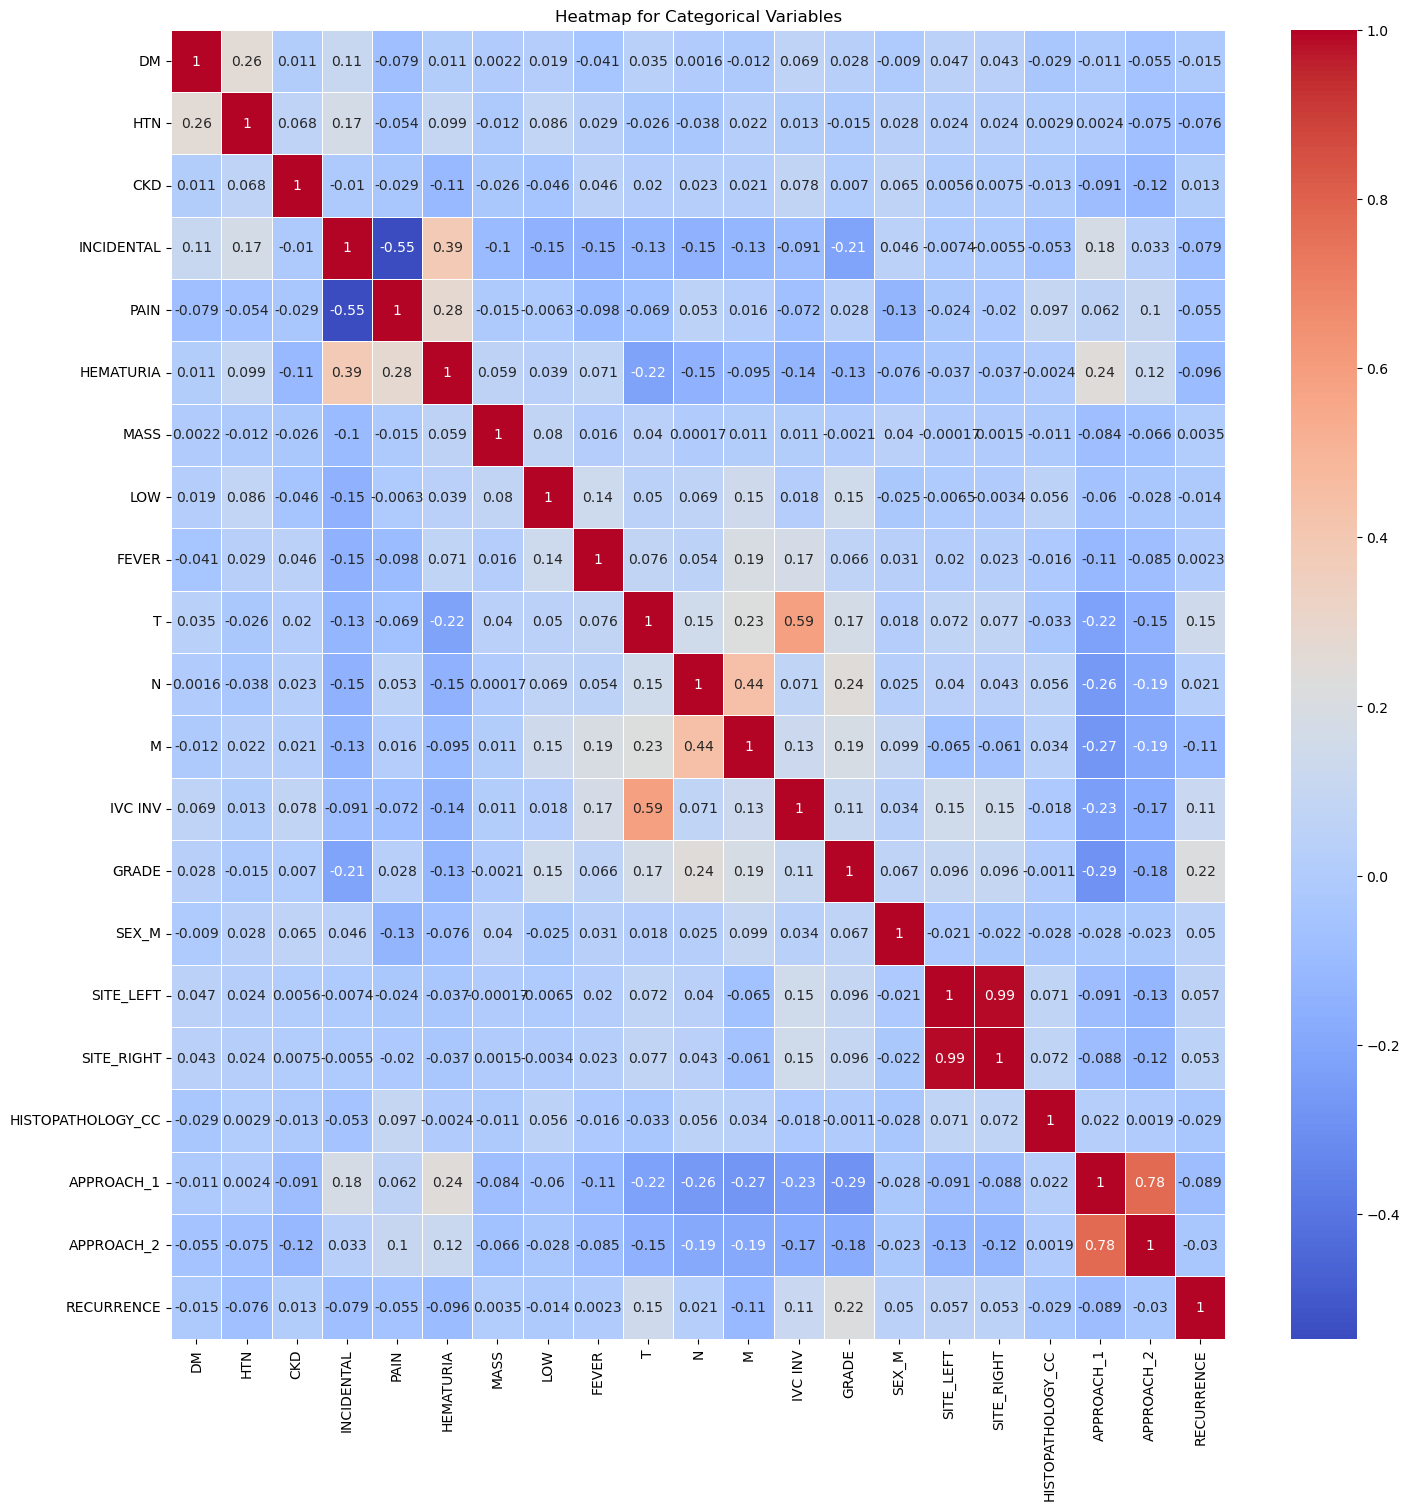

In [66]:
# Heatmap for Categorical Variables
plt.figure(figsize = (17, 17))
not_num_cols = ['DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA', 'MASS', 'LOW', 'FEVER', 'T', 'N', 'M', 'IVC INV', 'GRADE', 'SEX_M',
                'SITE_LEFT', 'SITE_RIGHT', 'HISTOPATHOLOGY_CC', 'APPROACH_1', 'APPROACH_2', 'RECURRENCE']
categorical_corr_matrix = dummy_X[not_num_cols].apply(lambda x: pd.factorize(x)[0]).corr(method='pearson')
sns.heatmap(categorical_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap for Categorical Variables')
plt.show()

In [76]:
dummy_X[['LOW', 'GRADE']] = dummy_X[['LOW', 'GRADE']].astype('int64')
dummy_X.dtypes

AGE                    int64
DM                     int64
HTN                    int64
CKD                    int64
INCIDENTAL             int64
PAIN                   int64
HEMATURIA              int64
MASS                   int64
LOW                    int64
FEVER                  int64
T                      int64
N                      int64
M                      int64
IVC INV                int64
MAX DIA              float64
GRADE                  int64
MONTHS                 int64
SEX_M                  int64
SITE_LEFT              int64
SITE_RIGHT             int64
HISTOPATHOLOGY_CC      int64
APPROACH_1             int64
APPROACH_2             int64
RECURRENCE             int64
dtype: object

In [85]:
pointbiserialr

<function scipy.stats._stats_py.pointbiserialr(x, y)>

In [93]:
# Define a wrapper function to extract the statistic from pointbiserialr result
def pointbiserial_statistic(x, y):
    result = pointbiserialr(x, y)
    return result.statistic

In [268]:
mi_scores

MONTHS               9.391287e-02
AGE                  5.394083e-02
MAX DIA              2.639366e-02
GRADE                1.936682e-02
T                    1.935491e-02
M                    7.701655e-03
IVC INV              4.895002e-03
HEMATURIA            4.343150e-03
APPROACH_1           3.814305e-03
INCIDENTAL           3.246111e-03
HTN                  3.081931e-03
SITE_LEFT            1.618551e-03
PAIN                 1.528804e-03
SITE_RIGHT           1.374829e-03
SEX_M                1.322678e-03
HISTOPATHOLOGY_CC    7.743973e-04
APPROACH_2           4.317285e-04
N                    2.208278e-04
DM                   1.164130e-04
CKD                  7.808279e-05
FEVER                2.852436e-06
MASS                 1.397593e-08
LOW                  0.000000e+00
Name: MI Scores, dtype: float64

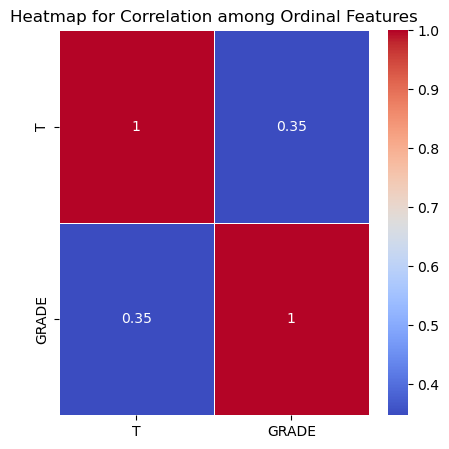

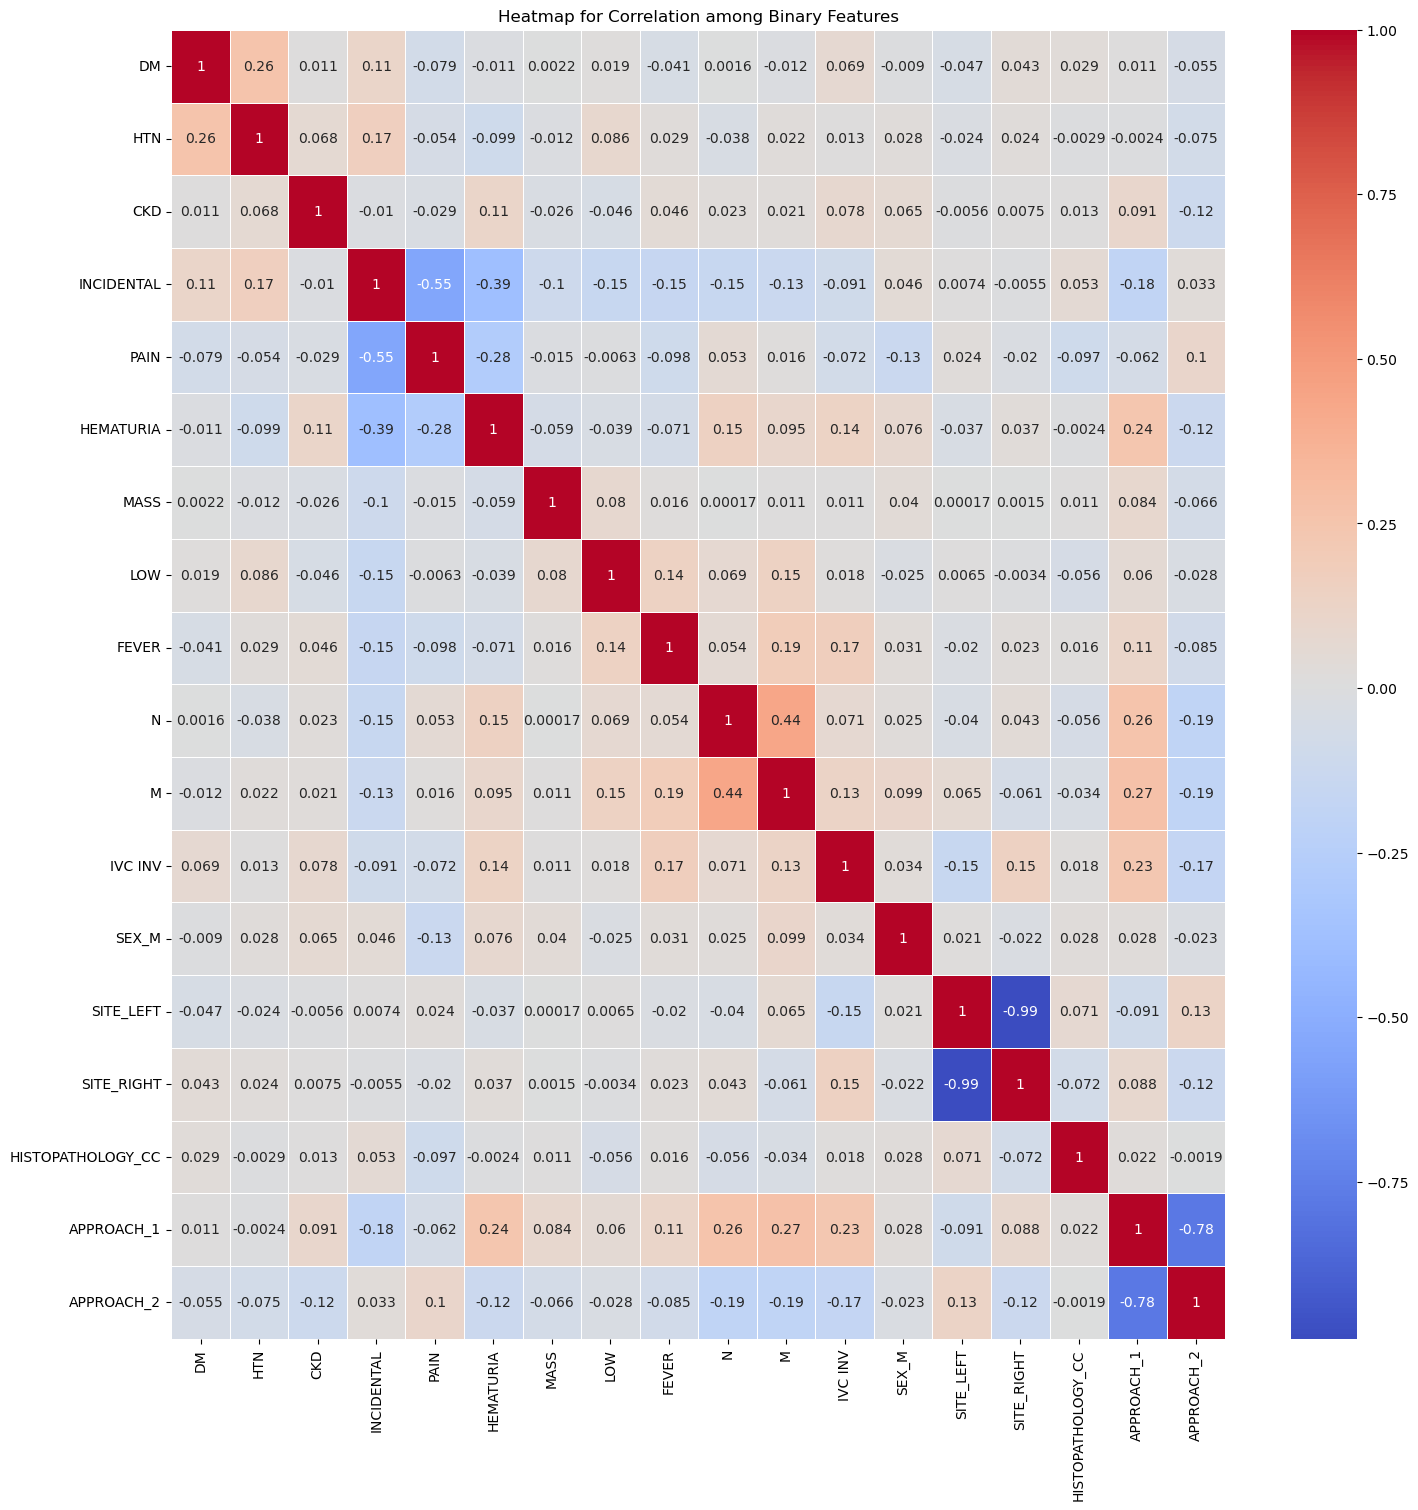

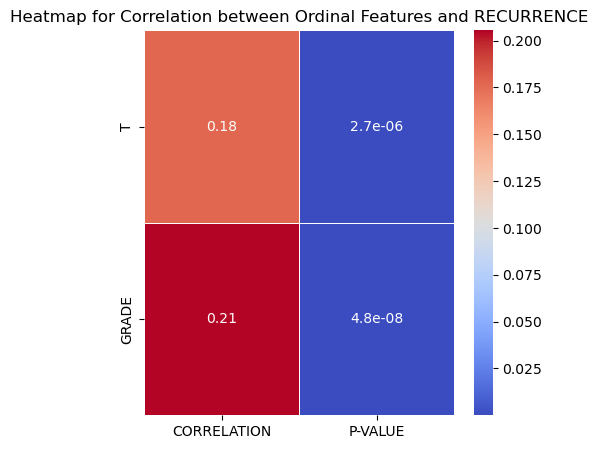

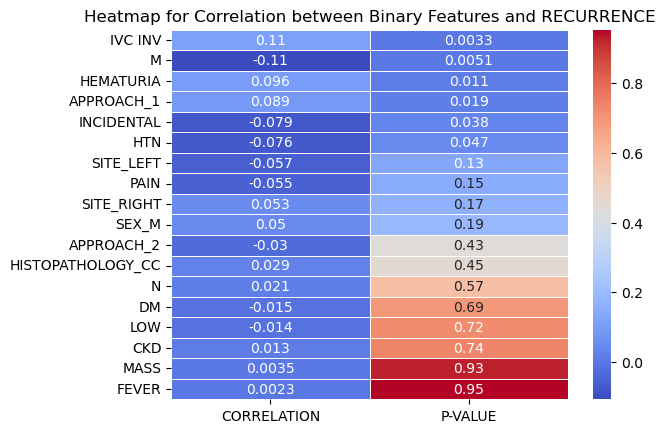

In [130]:
# Assuming df is your DataFrame with ordinal and binary features and a binary target
# Compute correlation between ordinal features (assuming columns 'ordinal1' and 'ordinal2')
ordinal_correlation = dummy_X[['T', 'GRADE']].corr(method='spearman')

# Compute correlation between binary features (excluding ordinal and target columns)
binary_features = [col for col in dummy_X.columns if col not in ['T', 'GRADE', 'RECURRENCE', 'AGE', 'MAX DIA', 'MONTHS']]
binary_correlation_matrix = dummy_X[binary_features].corr(method=pointbiserial_statistic)

# Compute correlation between ordinal features and binary target
ordinal_target_correlation = {}
for col in ['T', 'GRADE']:
    correlation = spearmanr(dummy_X[col], dummy_X['RECURRENCE'])
    ordinal_target_correlation[col] = correlation
ordinal_target_correlation_df = pd.DataFrame(ordinal_target_correlation).T
ordinal_target_correlation_df.columns = ['CORRELATION', 'P-VALUE']

# Compute correlation between binary features and binary target
binary_target_correlation = {}
for col in binary_features:
    correlation = pointbiserialr(dummy_X[col], dummy_X['RECURRENCE'])
    binary_target_correlation[col] = correlation
binary_target_correlation_df = pd.DataFrame(binary_target_correlation).T
binary_target_correlation_df.columns = ['CORRELATION', 'P-VALUE']
sorted_binary_target_correlation_df = binary_target_correlation_df.reindex(
    binary_target_correlation_df['CORRELATION'].abs().sort_values(ascending=False).index
)
# binary_sorted_rows = abs(binary_target_correlation_df['CORRELATION']).sort_values(ascending = False).index
# binary_target_correlation_df = binary_target_correlation_df[binary_sorted_rows, :]

# Print results
plt.figure(figsize = (5, 5))
sns.heatmap(ordinal_correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap for Correlation among Ordinal Features')
plt.show()

plt.figure(figsize = (17, 17))
sns.heatmap(binary_correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap for Correlation among Binary Features')
plt.show()

plt.figure(figsize = (5, 5))
sns.heatmap(ordinal_target_correlation_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap for Correlation between Ordinal Features and RECURRENCE')
plt.show()

sns.heatmap(sorted_binary_target_correlation_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap for Correlation between Binary Features and RECURRENCE')
plt.show()

In [136]:
dummy_X.GRADE

141    1
297    2
670    1
364    3
392    1
      ..
502    1
656    2
130    3
145    2
92     2
Name: GRADE, Length: 693, dtype: int64

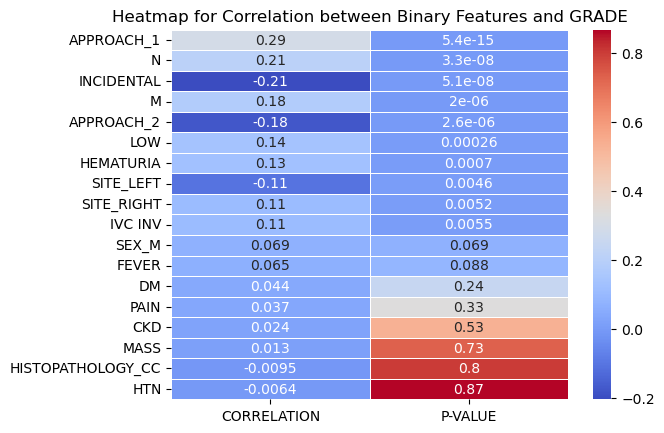

In [145]:
binary_grade_correlation = {}
for col in binary_features:
    correlation = spearmanr(dummy_X[col], dummy_X['GRADE'])
    binary_grade_correlation[col] = correlation
binary_grade_correlation_df = pd.DataFrame(binary_grade_correlation).T
binary_grade_correlation_df.columns = ['CORRELATION', 'P-VALUE']
sorted_binary_grade_correlation_df = binary_grade_correlation_df.reindex(
    binary_grade_correlation_df['CORRELATION'].abs().sort_values(ascending=False).index
)
sns.heatmap(sorted_binary_grade_correlation_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap for Correlation between Binary Features and GRADE')
plt.show()

C:\Users\aniru\AppData\Local\Temp\ipykernel_31972\3927602644.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='GRADE', data=dummy_X, palette='viridis', legend = False)


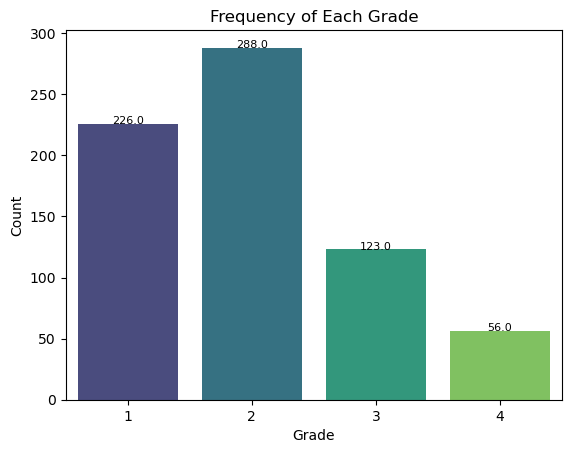

In [143]:
ax = sns.countplot(x='GRADE', data=dummy_X, palette='viridis', legend = False)
# Add frequency labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black')

plt.title('Frequency of Each Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

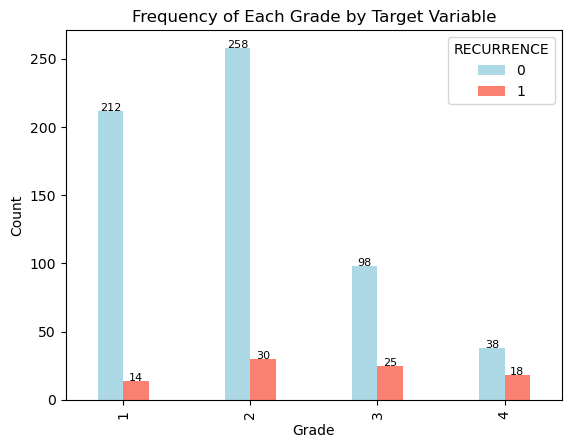

In [147]:
# Create a DataFrame with counts of 0 and 1 for each grade
grade_counts = dummy_X.groupby(['GRADE', 'RECURRENCE']).size().unstack(fill_value=0)

# Plot the double bar chart
ax = grade_counts.plot(kind='bar', color=['lightblue', 'salmon'], width=0.4)

# Add frequency labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black')

plt.title('Frequency of Each Grade by Target Variable')
plt.xlabel('Grade')
plt.ylabel('Count')

# Show plot
plt.show()

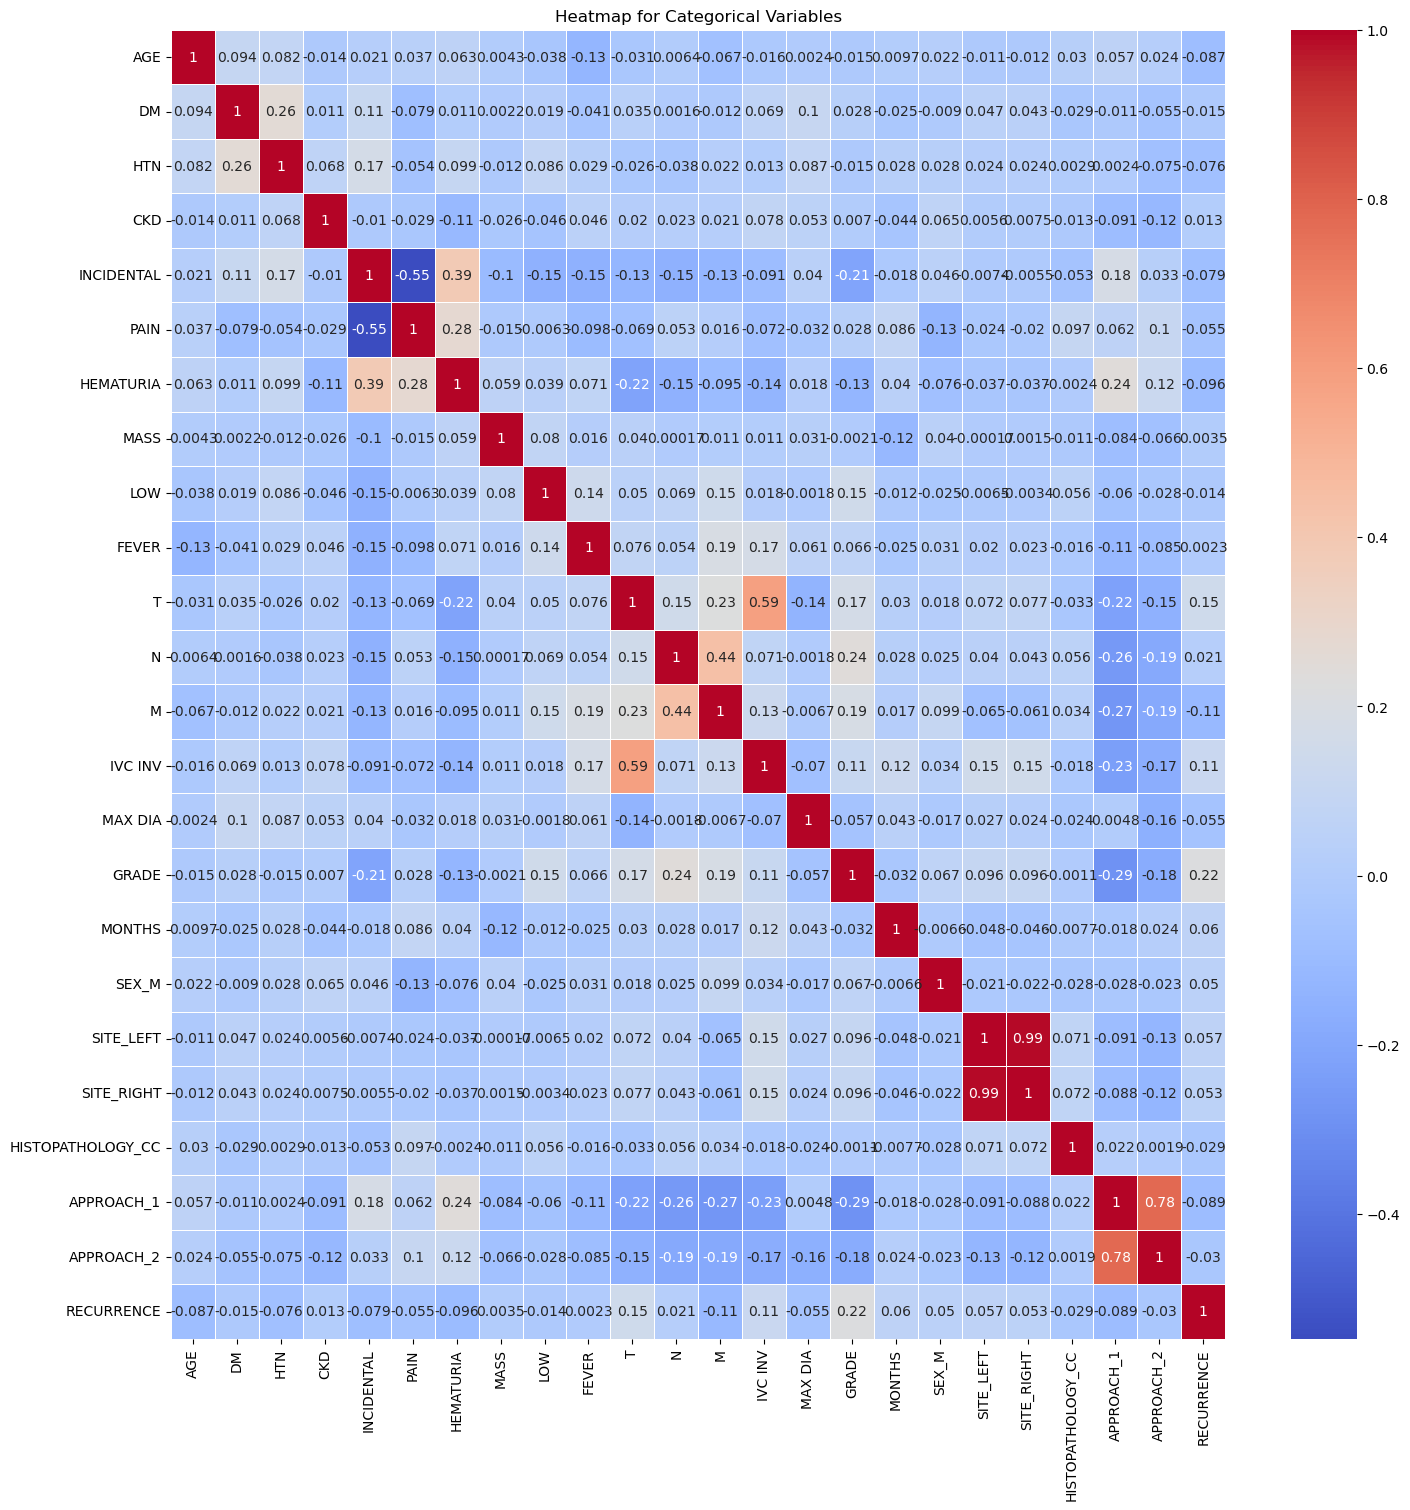

In [125]:
# Heatmap for Categorical Variables
plt.figure(figsize = (17, 17))
categorical_corr_matrix = dummy_X.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson')
sns.heatmap(categorical_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap for Categorical Variables')
plt.show()

In [131]:
cats_rec_corr = categorical_corr_matrix.RECURRENCE
sorted_cats = abs(cats_rec_corr).sort_values(ascending = False).index
cats_rec_corr[sorted_cats]

RECURRENCE           1.000000
GRADE                0.219719
T                    0.145809
IVC INV              0.111493
M                   -0.106245
HEMATURIA           -0.096435
APPROACH_1          -0.089054
AGE                 -0.086694
INCIDENTAL          -0.078857
HTN                 -0.075508
MONTHS               0.060072
SITE_LEFT            0.057182
PAIN                -0.055091
MAX DIA             -0.054981
SITE_RIGHT           0.052798
SEX_M                0.049910
APPROACH_2          -0.029911
HISTOPATHOLOGY_CC   -0.028870
N                    0.021433
DM                  -0.015271
LOW                 -0.013556
CKD                  0.012726
MASS                 0.003498
FEVER                0.002280
Name: RECURRENCE, dtype: float64

In [294]:
X_nt = X_nt.drop(index = 83)

In [295]:
X_nt['RECURRENCE']

141    0
297    1
670    0
364    0
392    0
      ..
244    0
325    0
608    0
664    0
542    0
Name: RECURRENCE, Length: 484, dtype: int64

In [296]:
y_nt = X_nt.pop('RECURRENCE')
y_t = X_t.pop('RECURRENCE')

In [208]:
grade_X = pd.concat([X_nt, X_t])
grade_nan_index = grade_X.loc[grade_X.GRADE.isna(), 'GRADE'].index
grade_X.loc[grade_X.GRADE.isna(), 'GRADE']

585   NaN
487   NaN
687   NaN
57    NaN
564   NaN
151   NaN
577   NaN
289   NaN
459   NaN
461   NaN
4     NaN
Name: GRADE, dtype: float64

In [172]:
def calculate_correlation(data, target):
    correlation, p_value = spearmanr(data, target)
    return correlation, p_value

In [57]:
def generate_permutations(num_samples):
    imputation_values = [1, 2, 3, 4]
    # permutations = itertools.product(imputation_values, repeat=11)
    permutations = [np.random.choice(imputation_values, size = 11) for _ in range(num_samples)]
    return permutations

In [209]:
grade_X['GRADE'] = grade_X['GRADE'].fillna(0)

In [210]:
grade_X.GRADE.value_counts()

GRADE
2.0    277
1.0    226
3.0    123
4.0     56
0.0     11
Name: count, dtype: int64

In [219]:
imputation

array([4, 2, 4, 4, 2, 2, 1, 2, 3, 1, 4])

In [220]:
new_imputation = np.ones(11) * 4
imputed_grade = grade_X['GRADE'].replace({0: new_imputation})
correlation, p_value = calculate_correlation(imputed_grade, grade_X['RECURRENCE'])
correlation

0.19226762888514015

In [241]:
first_p_value

1.7596665219401655e-08

In [266]:
num_samples = 100000
permutations = generate_permutations(num_samples)
best_correlation = -np.inf
best_imputation = None
print(best_correlation)

tic = time.time()
p_value_num = 0
num_changes = 0
target = grade_X['RECURRENCE']
count = 0
best_imps_list = []
first_corr, first_p_value = calculate_correlation(grade_X['GRADE'], grade_X['RECURRENCE'])
print(f"Original correlation = {first_corr}")
print(f"Original p_value = {first_p_value}")
for imputation in permutations:
    # if count == 2:
    #     break
    # print(f"Iteration: {count}")
    # print(f"Imputation = {imputation}")
    # print("Original value counts of GRADE: ")
    # print(grade_X.GRADE.value_counts())
    imputed_grade = grade_X['GRADE'].replace({0: imputation})
    # print("New value counts of GRADE: ")
    # print(imputed_grade.value_counts())
    correlation, p_value = calculate_correlation(imputed_grade, target)
    # print(f"Correlation = {correlation}")
    # print(f"P-Value = {p_value}")
    # print(f"Current best correlation: {best_correlation}")
    if p_value >= 0.05:
        p_value_num += 1
    if correlation > best_correlation:
        num_changes += 1
        best_correlation = correlation
        best_imputation = imputation
    elif correlation == 0.210822748169284:
        best_imps_list.append(imputation)
    # count += 1
    # print()
toc = time.time()
print(f"Time taken: {toc - tic}")
print(f"Best correlation: {best_correlation}")
print(f"Best imputation: {best_imputation}")
print(f"p_value_num = {p_value_num}")
print(f"num_changes = {num_changes}")
print(f"Poor imputations = {num_samples - num_changes}")

-inf
Original correlation = 0.21196811580970645
Original p_value = 1.7596665219401655e-08
Time taken: 145.92979884147644
Best correlation: 0.210822748169284
Best imputation: [1 1 1 1 1 1 1 3 1 2 1]
p_value_num = 0
num_changes = 6
Poor imputations = 99994


In [267]:
for imp in best_imps_list:
    print(imp)
    imputed_grade = grade_X['GRADE'].replace({0: imp})
    c, p = calculate_correlation(imputed_grade, target)
    print(c)

[4 1 1 1 1 1 1 3 1 1 1]
0.210822748169284


In [263]:
grade_X.loc[grade_nan_index, 'GRADE']

585    0.0
487    0.0
687    0.0
57     0.0
564    0.0
151    0.0
577    0.0
289    0.0
459    0.0
461    0.0
4      0.0
Name: GRADE, dtype: float64

In [262]:
grade_X.loc[grade_X['RECURRENCE'] == 1, 'GRADE'].value_counts()

GRADE
2.0    30
3.0    25
4.0    18
1.0    14
Name: count, dtype: int64

In [265]:
grade_X.loc[grade_X['RECURRENCE'] == 0, 'GRADE'].value_counts()

GRADE
2.0    247
1.0    212
3.0     98
4.0     38
0.0     11
Name: count, dtype: int64

In [276]:
imp = best_imps_list[0]
grade_X['GRADE'] = grade_X['GRADE'].replace({0: imp})

In [277]:
X_nt.index

Index([141, 297, 670, 364, 392, 626, 676,  62, 658, 528,
       ...
       473, 507, 683,  82, 295, 244, 325, 608, 664, 542],
      dtype='int64', length=484)

1) <div style='background-color: pink'>APPROACH_2: maybe? - (because of APPROACH_1)</div>
2) SITE_RIGHT
3) SITE_LEFT
4) <div style='background-color: yellow'>APPROACH_1: maybe? +</div>
5) PAIN
6) INCIDENTAL
7) SEX_M
8) <div style='background-color: yellow'>HEMATURIA: maybe? +</div>
9) HTN
10) DM
11) <div style='background-color: lightgreen'><font color='green'>M: keep</font></div>
12) <div style='background-color: lightgreen'><font color='green'>GRADE: keep</font></div>
13) <div style='background-color: lightgreen'><font color='green'>T: keep</font></div>
14) <div style='background-color: yellow'>MONTHS: maybe? + (mi)</div>
15) <div style='background-color: pink'>N: maybe? - (because of M)</div>
16) <div style='background-color: red'>LOW: drop</drop>
17) <div style='background-color: lightgreen'><font color='green'>IVC INV: keep</font></div>
18) <div style='background-color: red'>FEVER: drop</drop>
19) <div style='background-color: red'>CKD: drop</drop>
20) <div style='background-color: yellow'>AGE: maybe? + (mi)</div>
21) <div style='background-color: red'>MASS: drop</drop>
22) <div style='background-color: lightgreen'><font color='green'>MAX DIA: keep</font></div>
23) <div style='background-color: red'>HISTOPATHOLOGY_CC: drop</drop>

In [15]:
# create a function which uses grids with n_estimators: [50, 100, 150], max_features: [0.5, 0.75, None],
# class_weights: ['balanced, None, balanced_subsample']
# preset col_set = col_set1. the estimated time per grid should be a maximum of 15 mins, methinks (assuming it stays at 14580 fits)
# now add all permutations on top of it.
# AGE, MONTHS, HEMATURIA, APPROACH_1, APPROACH_2, N
# there will be 64 fits

In [43]:
l = np.array([x for x in range(2)])
print(l)
l[list(map(int, list(bin()[2:])))]

[0 1]


array([1, 0])

In [47]:
arr = np.array([x for x in range(6, 0, -1)])
print(arr[[True, False, True, False, False, True]])
print(arr[[1, 0, 1, 0, 0, 1]])

[6 4 1]
[5 6 5 6 6 5]


In [51]:
list(map(bool, [1, 0, 1, 0, 0, 1]))

[True, False, True, False, False, True]

In [61]:
def generate_permutations():
    imputation_values = [0, 1]
    permutations = itertools.product(imputation_values, repeat=6)
    # permutations = [np.random.choice(imputation_values, size = 6) for _ in range(num_samples)]
    return permutations

In [82]:
l = [0, 1, 4, 6]
l.reverse()
l

[6, 4, 1, 0]

In [92]:
for i in list(generate_permutations()):
    # print(list(map(bool, i)))
    print(type(list(np.flip(arr[list(map(bool, i))]))))
    # print(arr[list(map(bool, i))])

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [93]:
a = [1, 2, 3]
b = [4, 5, 6]
c = a + b
c

[1, 2, 3, 4, 5, 6]

In [132]:
col_set1 = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']

In [346]:
col_set2 = col_set1 + ['AGE', 'MONTHS']

In [376]:
col_set3 = col_set1 + ['AGE']

In [377]:
col_set4 = col_set2 + ['HEMATURIA']

In [57]:
col_set5 = col_set3 + ['HEMATURIA'] # shite

In [62]:
col_set6 = col_set4 + ['N', 'APPROACH_1']

In [61]:
# doubtful columns: AGE, MONTHS, HEMATURIA, APPROACH_1, APPROACH_2, N: 64 possibilities
# function structure: have a default grid, with first tweaks only in max_features, courtesy of the number of features
# don't include APPROACH_2 if APPROACH_1 isn't there
# 

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [278]:
col_set1

['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']

In [281]:
X_train_1 = grade_X.loc[X_nt.index, col_set1]
X_test_1 = grade_X.loc[X_t.index, col_set1]

In [347]:
X_train_2 = grade_X.loc[X_nt.index, col_set2]
X_test_2 = grade_X.loc[X_t.index, col_set2]

In [362]:
X_train_3 = grade_X.loc[X_nt.index, col_set3]
X_test_3 = grade_X.loc[X_t.index, col_set3]

In [378]:
X_train_4 = grade_X.loc[X_nt.index, col_set4]
X_test_4 = grade_X.loc[X_t.index, col_set4]

In [16]:
X_train_5 = grade_X.loc[X_nt.index, col_set5]
X_test_5 = grade_X.loc[X_t.index, col_set5]

In [63]:
X_train_6 = grade_X.loc[X_nt.index, col_set6]
X_test_6 = grade_X.loc[X_t.index, col_set6]

In [291]:
# progression route: impute with the current best imputation
# split into X_nt and X_t, using the first set of colums
# keep performance of a vanilla run as a baseline
# evaluate the performance of the new dataset.

In [345]:
# order_prod = variances * mi_scores
# order_sorted = order_prod.sort_values(ascending = False).index
# ordered_relevance = order_prod[order_sorted]
# ordered_relevance

# mi1 = [f for f in mi_scores.index if mi_scores[f] > 2e-3] + ['APPROACH_2'] # 2e-3 arbitrary threshold
# X_nt_mi = X_nt[mi1]
# X_t_mi = X_t[mi1]
# X_nt_mi

# plt.figure(figsize = (11, 5))
# plt.plot(variances[sorted_columns][5:], marker = 'o', mfc = 'b')
# plt.plot([2e-3 for x in range(len(variances))])
# plt.xticks(rotation = 90)
# plt.show()

# plt.figure(figsize = (11, 5))
# plt.plot(mi_scores[4:], marker = 'o', mfc = 'b')
# plt.plot([2e-3 for x in range(len(mi_scores))])
# plt.xticks(rotation = 90)
# # plt.yticks(mi_scores[6:])
# plt.show()

# x = 5
# plt.figure(figsize = (11, 5))
# plt.plot(variances[sorted_columns][x:], marker = 'o', mfc = 'b')
# plt.plot(mi_scores[x:], marker = 'o', mfc = 'r')
# # plt.plot([2e-3 for x in range(len(variances))])
# plt.xticks(rotation = 90)
# plt.show()

# plt.figure(figsize = (11, 5))
# plt.plot(ordered_relevance[5:], marker = 'o', mfc = 'b')
# # plt.plot([2e-3 for x in range(len(variances))])
# plt.xticks(rotation = 90)
# plt.show()

In [4]:
def grid_searcher(param_grid, pipeline, scoring, X_nt = X_nt, y_nt = y_nt, cv = 10, verbose = 2):
    tic = time.time()
    grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, scoring = scoring, n_jobs = -1, verbose = verbose)
    grid_search.fit(X_nt, y_nt)
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    best_model = grid_search.best_estimator_
    toc = time.time()
    print("Time Taken:", toc - tic)
    return best_params, best_model

In [109]:
def model_test(best_estimator, X_test = X_t, y_test = y_t, suppress_output = False, small_output = False):
    y_pred_test = best_estimator.predict(X_test)
    class_names = ['Class 0', 'Class 1']
    report_test = classification_report(y_test, y_pred_test, target_names = class_names)
    cm = confusion_matrix(y_test, y_pred_test)
    cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
    if not(suppress_output):
        print("Classification Report on Test Set:")
        print(report_test)
        print("Confusion Matrix:")
        print(cm_table)
        plt.figure(figsize = (8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()
    if small_output:
        return report_test, cm_table, f1_score(y_test, y_pred_test)

In [6]:
def massive_gridsearch():
    template = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']
    candidates = np.array(['AGE', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2', 'N'])
    # we first create a dictionary, which will store
    param_grid = {
        'model__n_estimators': [150, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 3, 4],
        'model__min_samples_leaf': [2, 3, 4],
        'model__max_features': [0.5, 0.75, None],
        'model__bootstrap': [True, False],
        'model__class_weight': ['balanced', None, 'balanced_subsample']
    }
    rows_list = []
    count = 0
    for perm in list(generate_permutations()):
        print(f"Index: {count}")
        new_list = template + list(candidates[list(map(bool, perm))])
        X_train_i = grade_X.loc[X_nt.index, new_list]
        X_test_i = grade_X.loc[X_t.index, new_list]
        pipeline = make_pipeline()
        best_params, best_model = grid_searcher(param_grid, pipeline, 'f1', X_train_i, cv = 5)
        report_test, cm_table, f1 = model_test(best_model, X_test_i, y_t, True, True)
        dict1 = {'col_list': new_list, 'best_params': best_params, 'best_model': best_model,
                 'report_test': report_test, 'cm_table': cm_table, 'f1': f1}
        rows_list.append(dict1)
        count += 1
        # winsound.Beep(1000, 10000)
        if count % 3 == 0:
            time.sleep(240)
        # else:
        #     time.sleep(60)
    df = pd.DataFrame(rows_list)
    return df

In [ ]:
tic = time.time()
gridsearch_df = massive_gridsearch()
toc = time.time()
print(f"{toc - tic} seconds")

Index: 0
Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': 'balanced_subsample', 'model__max_depth': 15, 'model__max_features': 0.5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 150}
Time Taken: 336.0612051486969
Index: 1
Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': 'balanced', 'model__max_depth': 5, 'model__max_features': 0.75, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 175}
Time Taken: 316.72335600852966
Index: 2
Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': 'balanced_subsample', 'model__max_depth': 10, 'model__max_features': 0.5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 175}
Time Taken: 289.297055

In [35]:
14261/3600

3.961388888888889

In [289]:
def make_pipeline():
    model = RFC(random_state = 42)
    imputer = SimpleImputer(strategy = 'median')
    scaler = StandardScaler()
    pipeline = Pipeline([
        ('imputer', imputer),
        ('scaler', scaler),
        ('model', model)
    ])
    return pipeline

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      1.00      0.94       183
     Class 1       1.00      0.12      0.21        26

    accuracy                           0.89       209
   macro avg       0.94      0.56      0.57       209
weighted avg       0.90      0.89      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       183 |         0 |
+-----------+-----------+
|        23 |         3 |
+-----------+-----------+


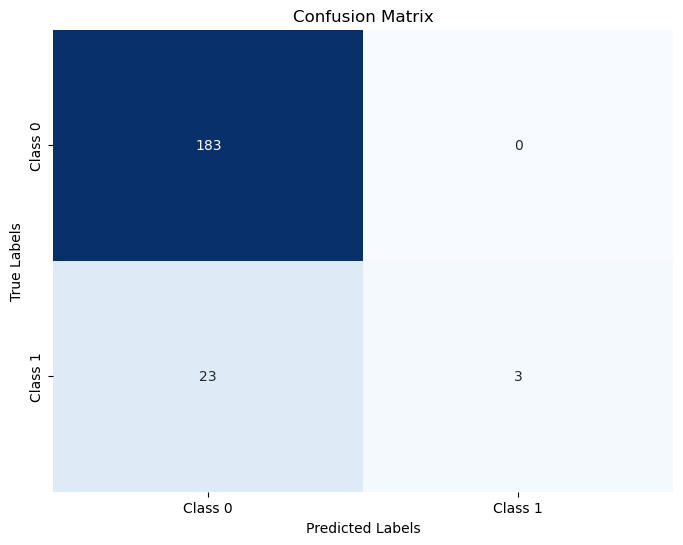

In [308]:
pipeline1 = make_pipeline()
pipeline1.fit(X_nt, y_nt)
model_test(pipeline1)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.94      0.91       183
     Class 1       0.31      0.19      0.24        26

    accuracy                           0.85       209
   macro avg       0.60      0.57      0.58       209
weighted avg       0.82      0.85      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


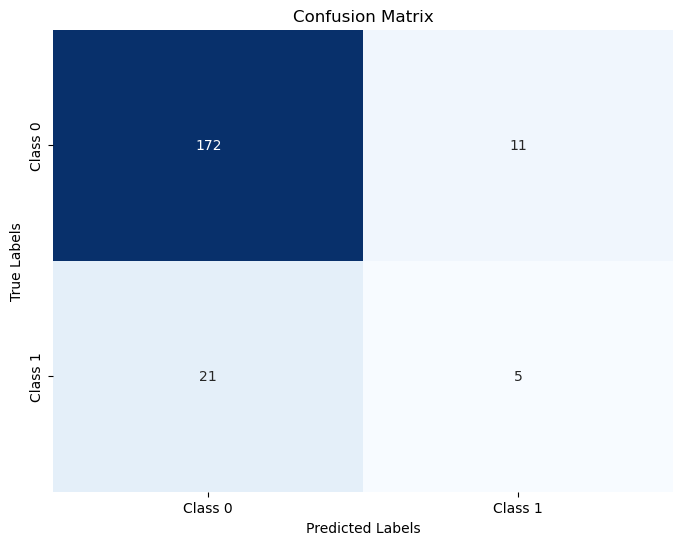

In [309]:
pipeline2 = make_pipeline()
pipeline2.fit(X_train_1, y_nt)
model_test(pipeline2, X_test_1)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.99      0.94       183
     Class 1       0.75      0.12      0.20        26

    accuracy                           0.89       209
   macro avg       0.82      0.55      0.57       209
weighted avg       0.87      0.89      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       182 |         1 |
+-----------+-----------+
|        23 |         3 |
+-----------+-----------+


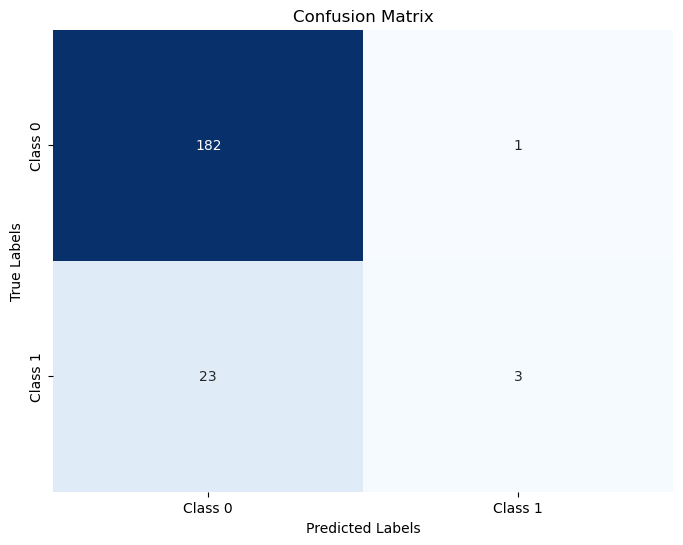

In [4]:
pipeline3 = make_pipeline()
pipeline3.fit(X_train_2, y_nt)
model_test(pipeline3, X_test_2)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.31      0.15      0.21        26

    accuracy                           0.85       209
   macro avg       0.60      0.55      0.56       209
weighted avg       0.82      0.85      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


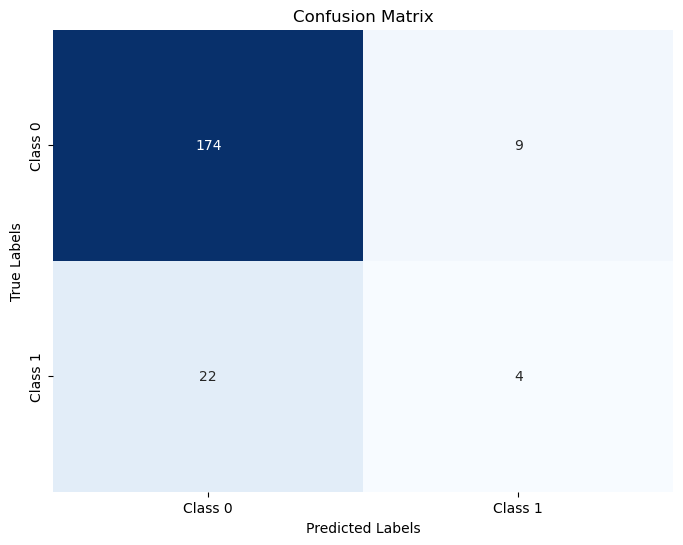

In [6]:
pipeline4 = make_pipeline()
pipeline4.fit(X_train_3, y_nt)
model_test(pipeline4, X_test_3)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.99      0.93       183
     Class 1       0.50      0.08      0.13        26

    accuracy                           0.88       209
   macro avg       0.69      0.53      0.53       209
weighted avg       0.84      0.88      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       181 |         2 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


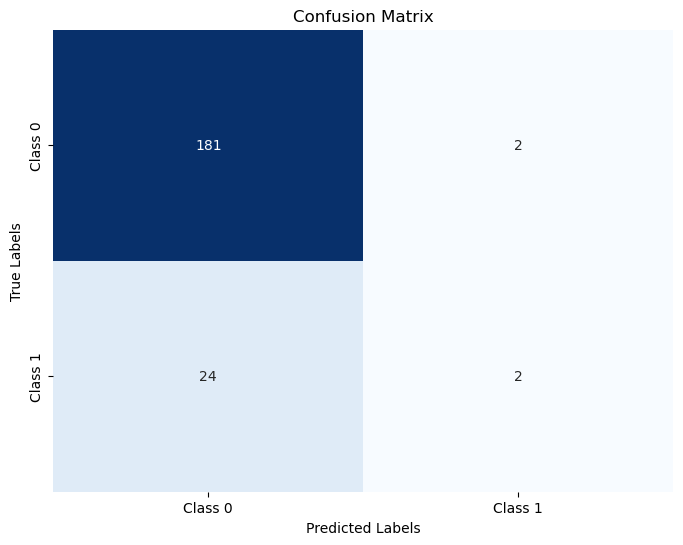

In [7]:
pipeline5 = make_pipeline()
pipeline5.fit(X_train_4, y_nt)
model_test(pipeline5, X_test_4)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.31      0.15      0.21        26

    accuracy                           0.85       209
   macro avg       0.60      0.55      0.56       209
weighted avg       0.82      0.85      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


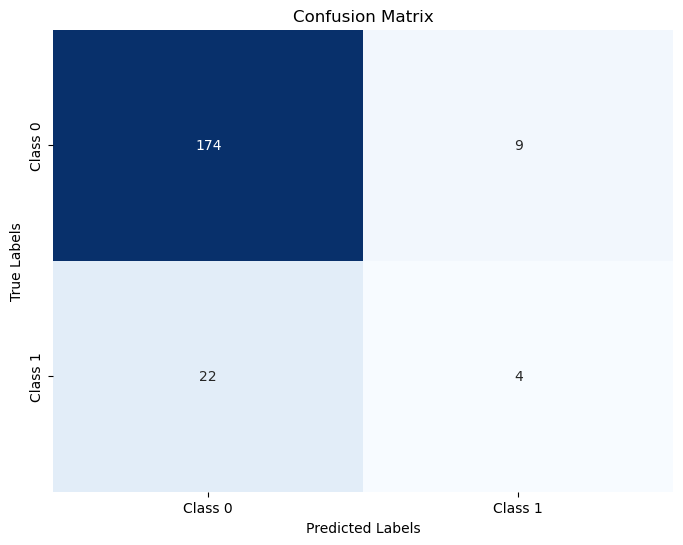

In [17]:
pipeline6 = make_pipeline()
pipeline6.fit(X_train_5, y_nt)
model_test(pipeline6, X_test_5)

# RECALL

## BASELINE

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 107.64053964614868
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


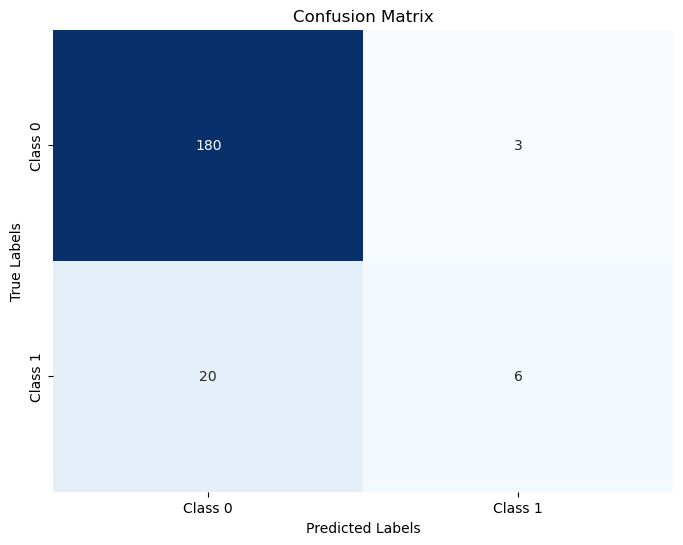

In [313]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': ['sqrt', 'log2'],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params, best_model = grid_searcher(param_grid, pipeline1, 'recall')
model_test(best_model)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 50}
Time Taken: 90.17304396629333
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.94      0.92       183
     Class 1       0.39      0.27      0.32        26

    accuracy                           0.86       209
   macro avg       0.64      0.60      0.62       209
weighted avg       0.84      0.86      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


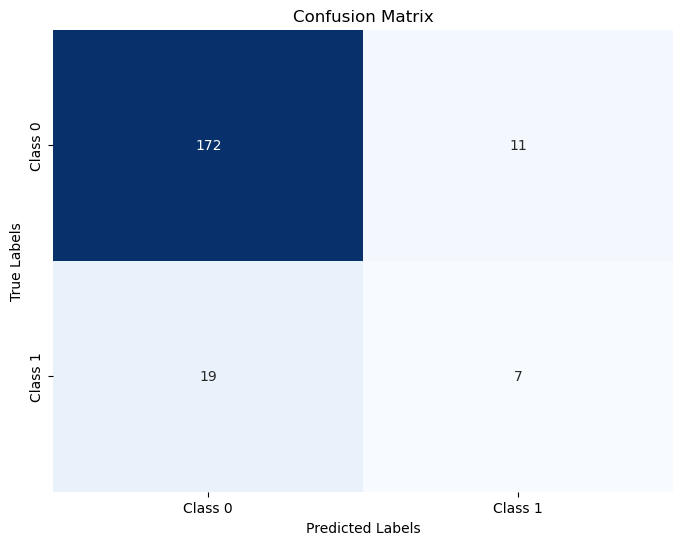

In [314]:
pipeline1_1 = make_pipeline()
best_params_1, best_model_1 = grid_searcher(param_grid, pipeline1_1, 'recall', X_train_1)
model_test(best_model_1, X_test_1)

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 50}
Time Taken: 42.50604462623596
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      1.00      0.94       183
     Class 1       1.00      0.04      0.07        26

    accuracy                           0.88       209
   macro avg       0.94      0.52      0.51       209
weighted avg       0.89      0.88      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       183 |         0 |
+-----------+-----------+
|        25 |         1 |
+-----------+-----------+


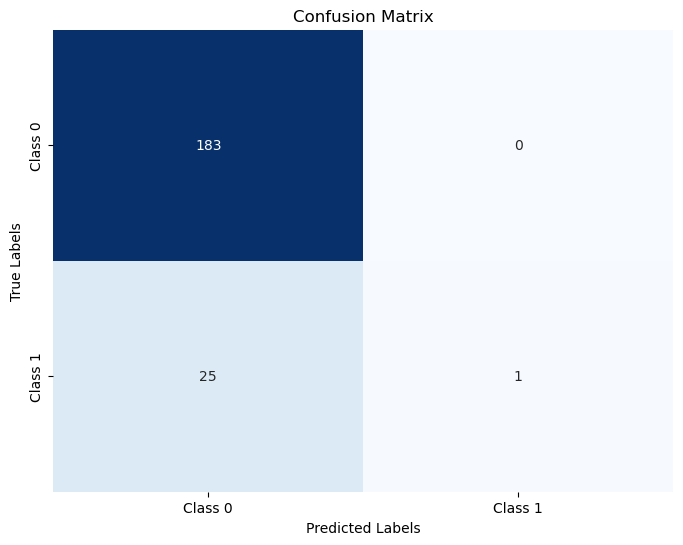

In [315]:
param_grid1a = {
    'model__n_estimators': list(np.arange(50, 201)),
}
pipeline1a = make_pipeline()
best_params1a, best_model1a = grid_searcher(param_grid1a, pipeline1a, 'recall', X_nt) # , best_params_list1a
model_test(best_model1a, X_t)

In [ ]:
# param_grid = {
#     'model__n_estimators': [50, 100, 200],
#     'model__max_depth': [None, 10, 20, 30],
#     'model__min_samples_split': [2, 4, 6],
#     'model__min_samples_leaf': [1, 2, 3],
#     'model__max_features': ['sqrt', 'log2'],
#     'model__bootstrap': [True, False]
# }

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': False}
Time Taken: 0.4451725482940674
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


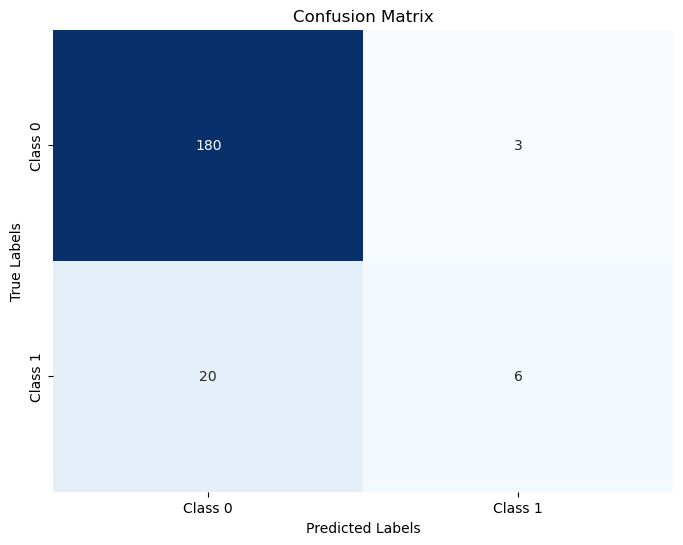

In [316]:
param_grid1b = {
    'model__bootstrap': [True, False]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'recall', X_nt)
model_test(best_model1b, X_t)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': None}
Time Taken: 0.961529016494751
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


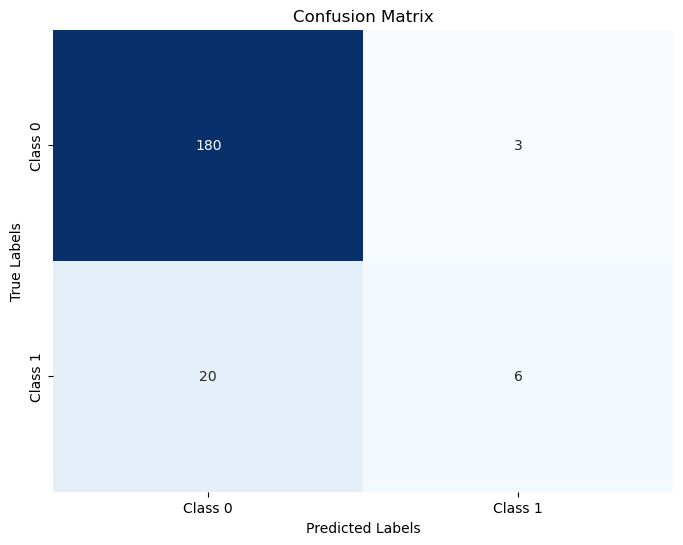

In [317]:
param_grid1c = {
    'model__max_depth': [None, 5, 10, 15, 20, 25, 30]
}
best_params1c, best_model1c = grid_searcher(param_grid1c, best_model1b, 'recall', X_nt) # , best_params_list1a
model_test(best_model1c, X_t)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 0.8613839149475098
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


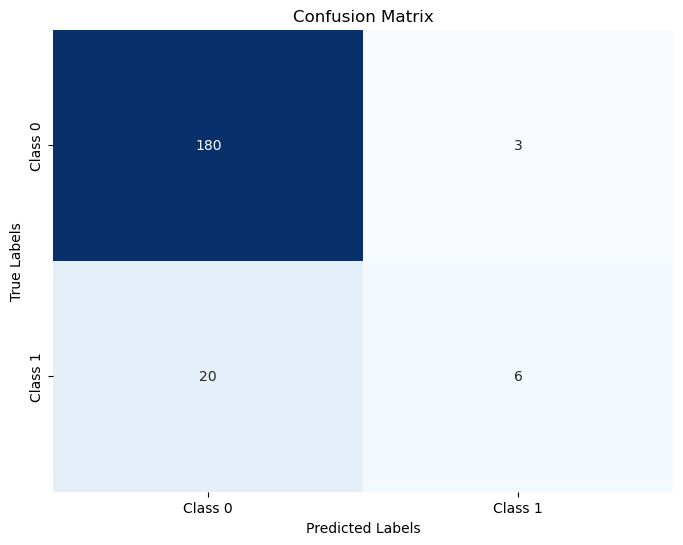

In [318]:
param_grid1d = {
    'model__min_samples_split': [2, 3, 4, 5, 6, 7]
}
best_params1d, best_model1d = grid_searcher(param_grid1d, best_model1c, 'recall', X_nt)
model_test(best_model1d, X_t)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 0.7233002185821533
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


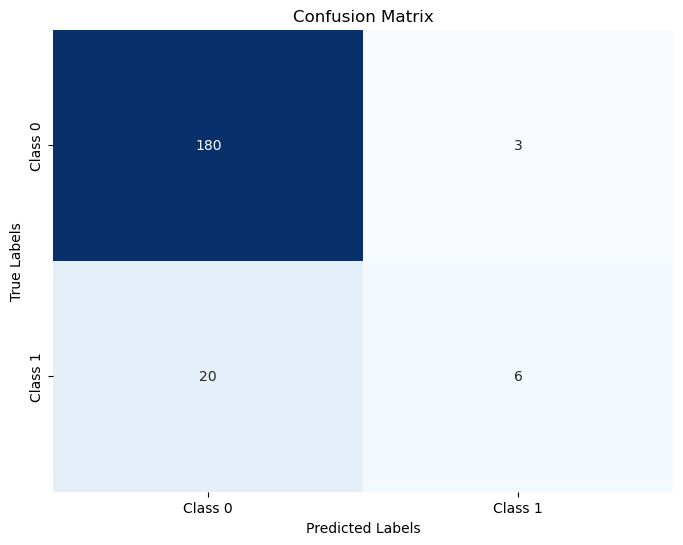

In [319]:
param_grid1e = {
    'model__min_samples_leaf': [1, 2, 3, 4],
}
best_params1e, best_model1e = grid_searcher(param_grid1e, best_model1d, 'recall', X_nt)
model_test(best_model1e, X_t)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 0.9}
Time Taken: 1.3326001167297363
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.92      0.91       183
     Class 1       0.32      0.27      0.29        26

    accuracy                           0.84       209
   macro avg       0.61      0.59      0.60       209
weighted avg       0.83      0.84      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       168 |        15 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


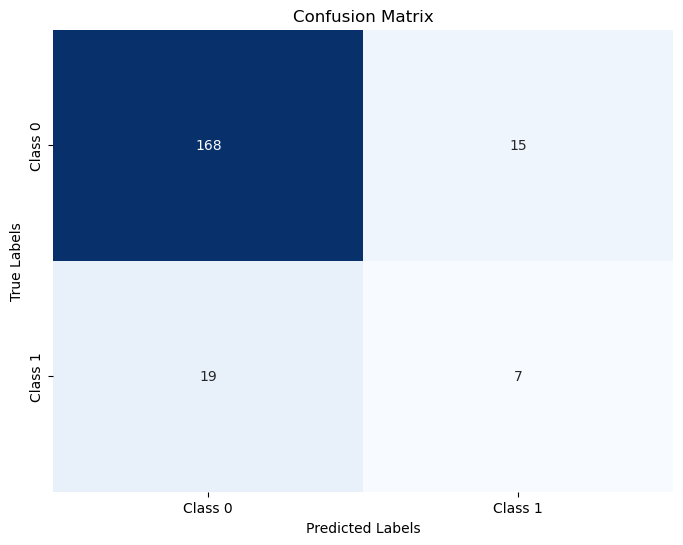

In [320]:
param_grid1f = {
    'model__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'sqrt', 'log2']
}
best_params1f, best_model1f = grid_searcher(param_grid1f, best_model1e, 'recall', X_nt)
model_test(best_model1f, X_t)

## FULL GRID

### SET 1

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 100}
Time Taken: 426.96773052215576
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


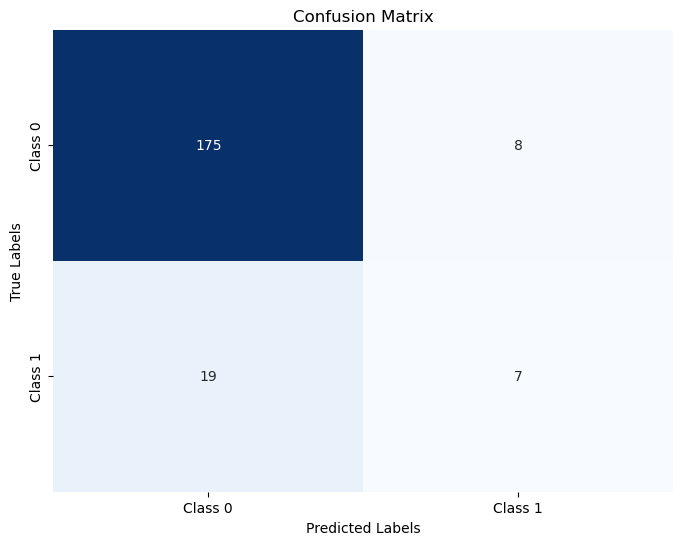

In [33]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [1, 2, 3, 4, 5],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params1a, best_model1a = grid_searcher(param_grid, pipeline1, 'recall', X_train_1)
model_test(best_model1a, X_test_1)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 100}
Time Taken: 221.44151902198792
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


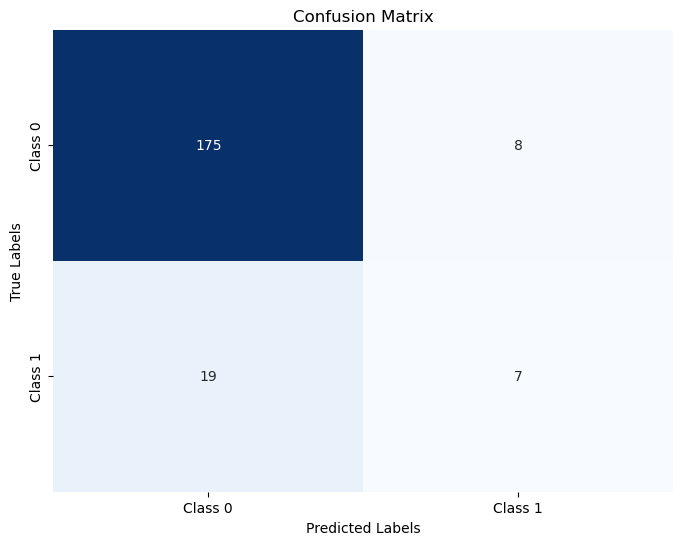

In [34]:
param_grid = {
    'model__n_estimators': [75, 100, 125],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [3, 4, 5],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params1ai, best_model1ai = grid_searcher(param_grid, best_model1a, 'recall', X_train_1)
model_test(best_model1ai, X_test_1)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 100}
Time Taken: 586.9079341888428
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


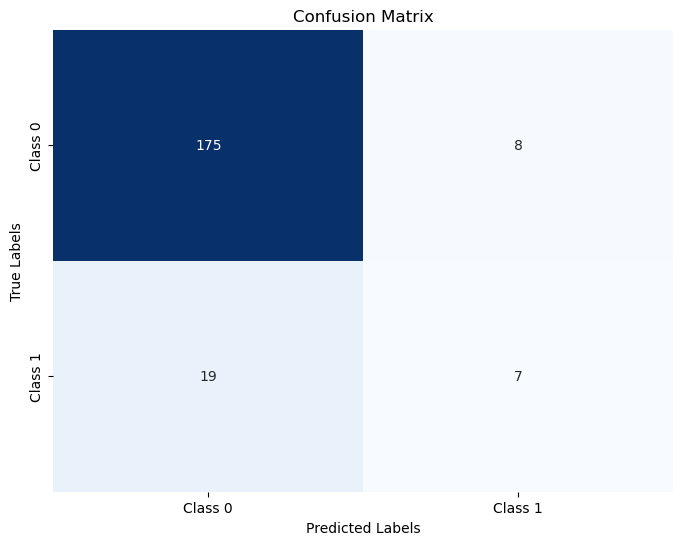

In [35]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [1, 2, 3, 4, 5],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params1a, best_model1a = grid_searcher(param_grid, pipeline1, 'f1', X_train_1)
model_test(best_model1a, X_test_1)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 100}
Time Taken: 217.26059651374817
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


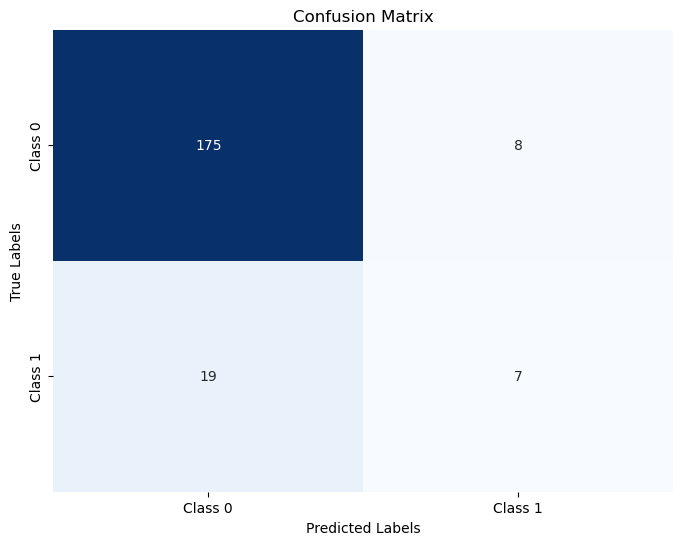

In [36]:
param_grid = {
    'model__n_estimators': [75, 100, 125],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [3, 4, 5],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params1ai, best_model1ai = grid_searcher(param_grid, best_model1a, 'f1', X_train_1)
model_test(best_model1ai, X_test_1)

### SET 2

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 487.94061636924744
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.89      0.89       183
     Class 1       0.19      0.19      0.19        26

    accuracy                           0.80       209
   macro avg       0.54      0.54      0.54       209
weighted avg       0.80      0.80      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       162 |        21 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


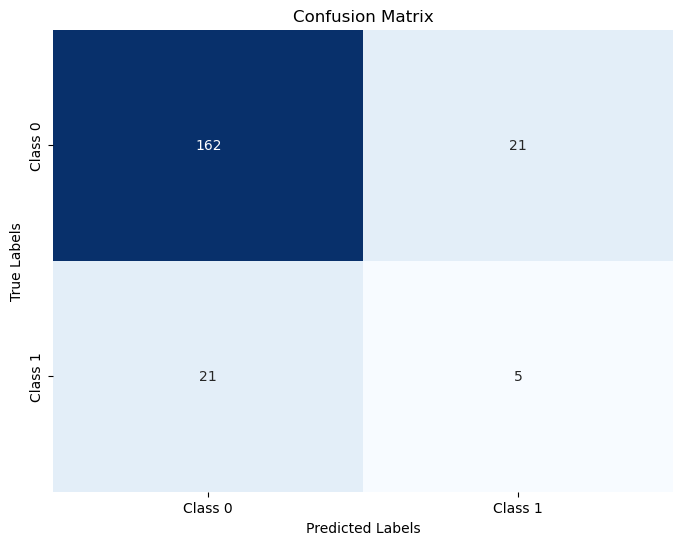

In [43]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [3, 4, 5, 6],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params3a, best_model3a = grid_searcher(param_grid, pipeline1, 'f1', X_train_3)
model_test(best_model3a, X_test_3)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 7, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 390.39251255989075
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.89      0.89       183
     Class 1       0.25      0.27      0.26        26

    accuracy                           0.81       209
   macro avg       0.57      0.58      0.57       209
weighted avg       0.81      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       162 |        21 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


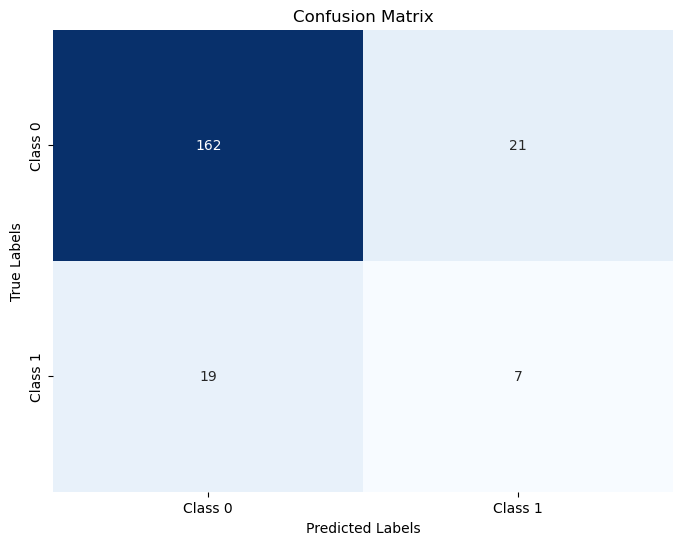

In [44]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [3, 5, 7],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params2a, best_model2a = grid_searcher(param_grid, pipeline1, 'recall', X_train_2)
model_test(best_model2a, X_test_2)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 7, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 190.37742471694946
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.89      0.89       183
     Class 1       0.25      0.27      0.26        26

    accuracy                           0.81       209
   macro avg       0.57      0.58      0.57       209
weighted avg       0.81      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       162 |        21 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


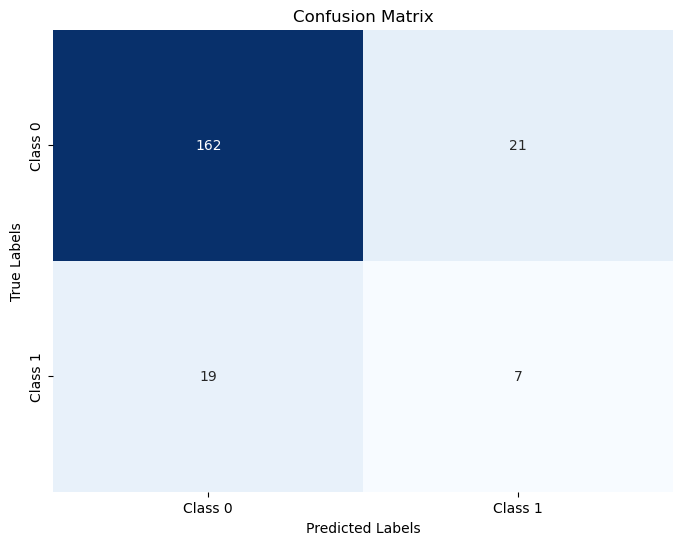

In [45]:
param_grid = {
    'model__n_estimators': [50, 75, 100],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 3, 4],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [5, 6, 7],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params2ai, best_model2ai = grid_searcher(param_grid, best_model2a, 'recall', X_train_2)
model_test(best_model2ai, X_test_2)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 7, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Time Taken: 394.7717123031616
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.89      0.89       183
     Class 1       0.25      0.27      0.26        26

    accuracy                           0.81       209
   macro avg       0.57      0.58      0.57       209
weighted avg       0.81      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       162 |        21 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


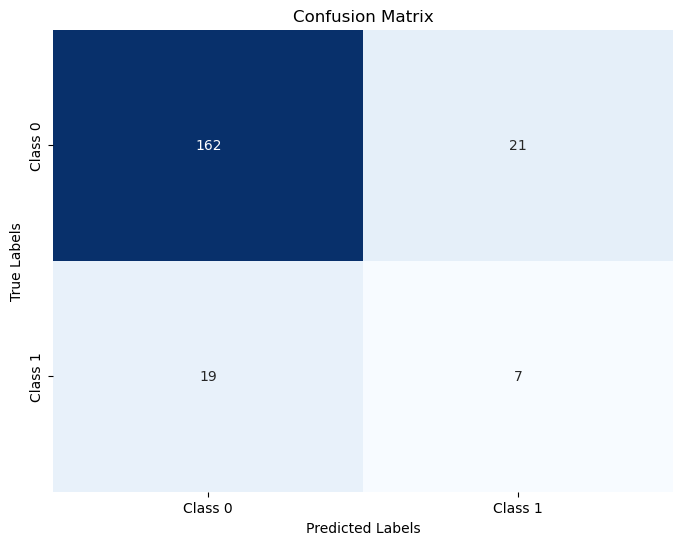

In [46]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [3, 5, 7],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params2a, best_model2a = grid_searcher(param_grid, pipeline1, 'f1', X_train_2)
model_test(best_model2a, X_test_2)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 7, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 75}
Time Taken: 167.7883803844452
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.89      0.89       183
     Class 1       0.25      0.27      0.26        26

    accuracy                           0.81       209
   macro avg       0.57      0.58      0.57       209
weighted avg       0.81      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       162 |        21 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


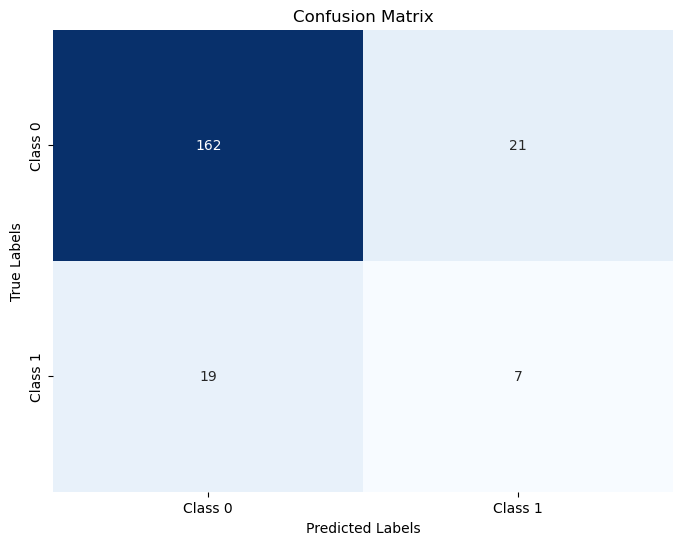

In [47]:
param_grid = {
    'model__n_estimators': [75, 100, 125],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 3, 4],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [5, 6, 7],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params2ai, best_model2ai = grid_searcher(param_grid, best_model2a, 'f1', X_train_2)
model_test(best_model2ai, X_test_2)

### SET 3

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 517.4211943149567
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.89      0.89       183
     Class 1       0.19      0.19      0.19        26

    accuracy                           0.80       209
   macro avg       0.54      0.54      0.54       209
weighted avg       0.80      0.80      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       162 |        21 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


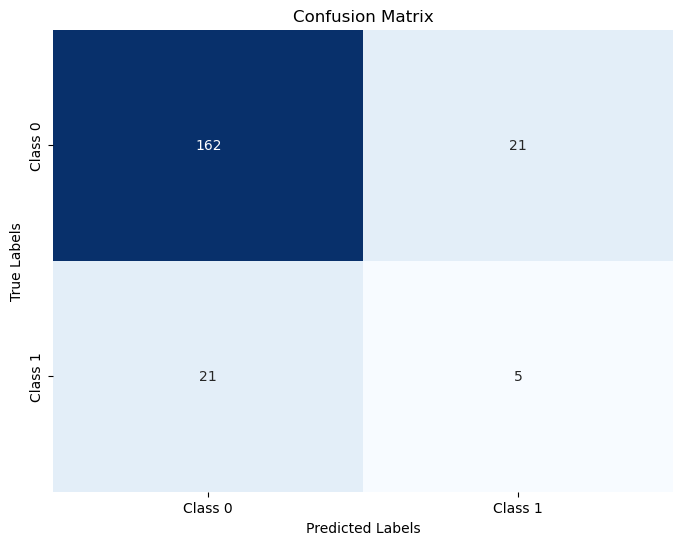

In [41]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [3, 4, 5, 6],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params3a, best_model3a = grid_searcher(param_grid, pipeline1, 'recall', X_train_3)
model_test(best_model3a, X_test_3)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 6, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 178.46479868888855
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.89      0.89       183
     Class 1       0.19      0.19      0.19        26

    accuracy                           0.80       209
   macro avg       0.54      0.54      0.54       209
weighted avg       0.80      0.80      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       162 |        21 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


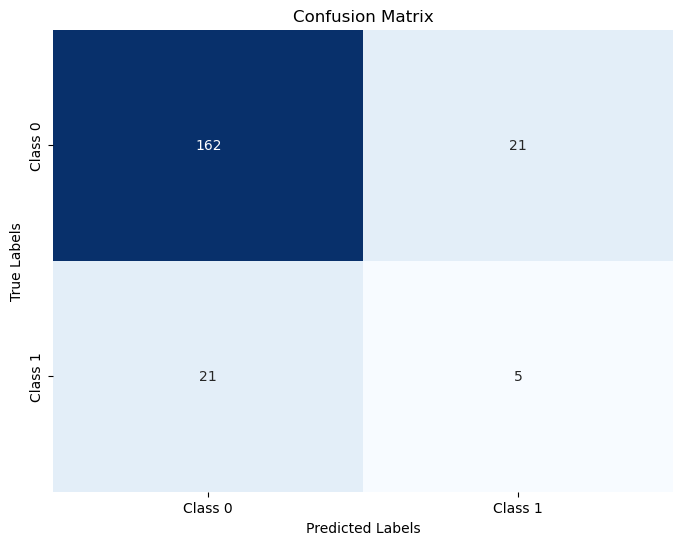

In [42]:
param_grid = {
    'model__n_estimators': [50, 75, 100],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 3, 4],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [4, 5, 6],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params3ai, best_model3ai = grid_searcher(param_grid, best_model3a, 'recall', X_train_3)
model_test(best_model3ai, X_test_3)

### SET 4

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Time Taken: 304.83147954940796
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.89       183
     Class 1       0.24      0.27      0.25        26

    accuracy                           0.80       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.81      0.80      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       161 |        22 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


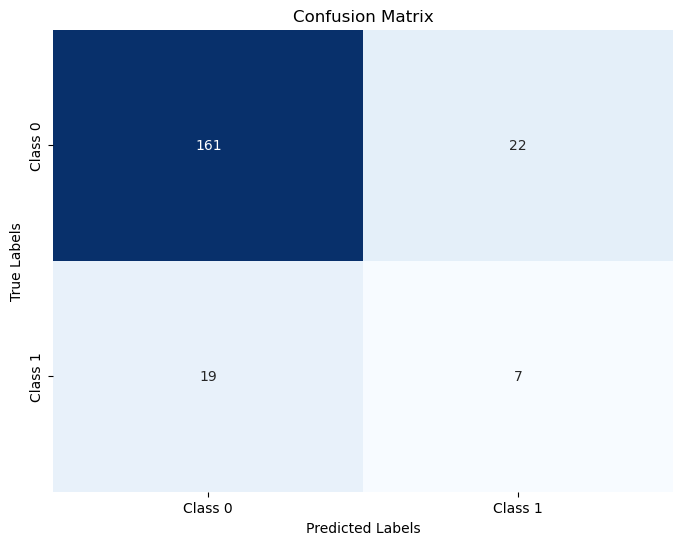

In [49]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [2, 4, 6, 8],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params4a, best_model4a = grid_searcher(param_grid, pipeline1, 'recall', X_train_4)
model_test(best_model4a, X_test_4)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Time Taken: 249.3080689907074
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.89       183
     Class 1       0.24      0.27      0.25        26

    accuracy                           0.80       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.81      0.80      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       161 |        22 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


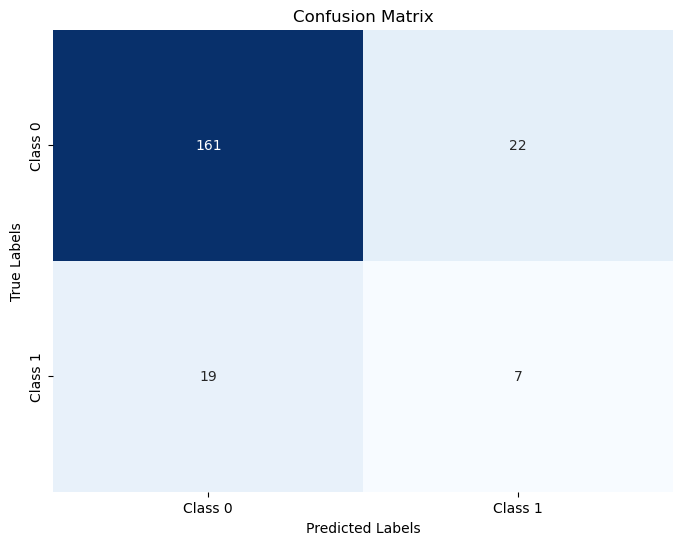

In [50]:
param_grid = {
    'model__n_estimators': [150, 175, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 3, 4],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [6, 7, 8],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params4ai, best_model4ai = grid_searcher(param_grid, best_model4a, 'recall', X_train_4)
model_test(best_model4ai, X_test_4)

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 307.8454940319061
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.88      0.89       183
     Class 1       0.27      0.31      0.29        26

    accuracy                           0.81       209
   macro avg       0.58      0.59      0.59       209
weighted avg       0.82      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       161 |        22 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


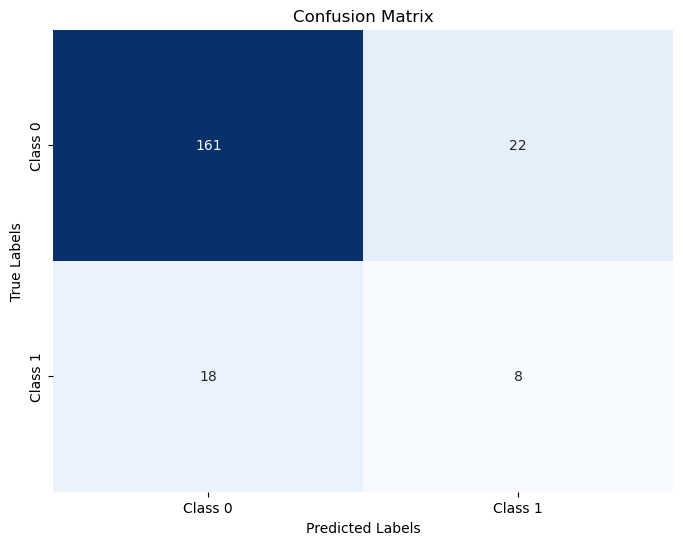

In [51]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [2, 4, 6, 8],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params4a, best_model4a = grid_searcher(param_grid, pipeline1, 'f1', X_train_4)
model_test(best_model4a, X_test_4)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 203.34698176383972
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.88      0.89       183
     Class 1       0.27      0.31      0.29        26

    accuracy                           0.81       209
   macro avg       0.58      0.59      0.59       209
weighted avg       0.82      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       161 |        22 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


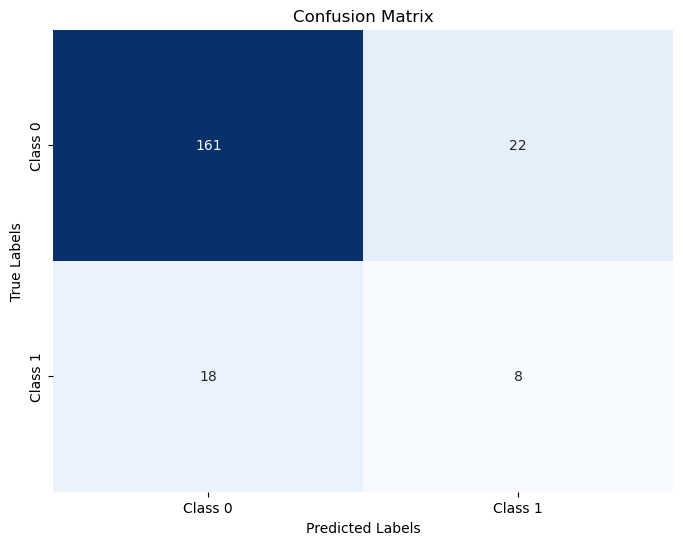

In [52]:
param_grid = {
    'model__n_estimators': [50, 75, 100],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 3, 4],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [6, 7, 8],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params4ai, best_model4ai = grid_searcher(param_grid, best_model4a, 'f1', X_train_4)
model_test(best_model4ai, X_test_4)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 70}
Time Taken: 154.00982975959778
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.88      0.89       183
     Class 1       0.27      0.31      0.29        26

    accuracy                           0.81       209
   macro avg       0.58      0.59      0.59       209
weighted avg       0.82      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       161 |        22 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


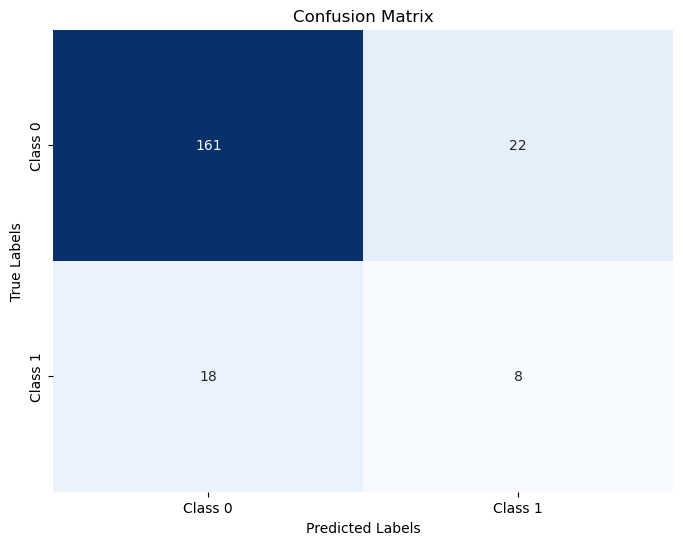

In [53]:
param_grid = {
    'model__n_estimators': [50, 60, 70],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 3, 4],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [6, 7, 8],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params4ai, best_model4ai = grid_searcher(param_grid, best_model4a, 'f1', X_train_4)
model_test(best_model4ai, X_test_4)

### SET 5 (BAD)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 7, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Time Taken: 375.7436668872833
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.93      0.90       183
     Class 1       0.14      0.08      0.10        26

    accuracy                           0.83       209
   macro avg       0.51      0.51      0.50       209
weighted avg       0.79      0.83      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       171 |        12 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


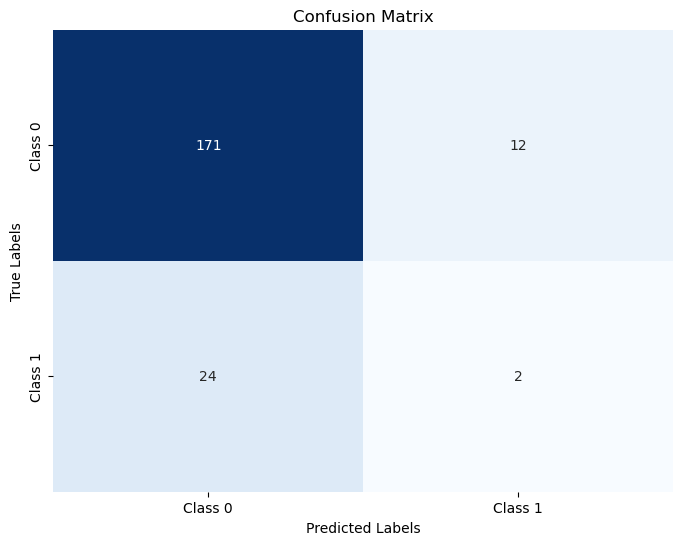

In [55]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [3, 5, 7],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params5a, best_model5a = grid_searcher(param_grid, pipeline1, 'f1', X_train_5)
model_test(best_model5a, X_test_5)

### SET 6

In [107]:
3456 * 3 * 3/ (4 * 4)

1944.0

Fitting 10 folds for each of 3456 candidates, totalling 34560 fits
Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Time Taken: 1792.2351837158203
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92       183
     Class 1       0.43      0.35      0.38        26

    accuracy                           0.86       209
   macro avg       0.67      0.64      0.65       209
weighted avg       0.85      0.86      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       171 |        12 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


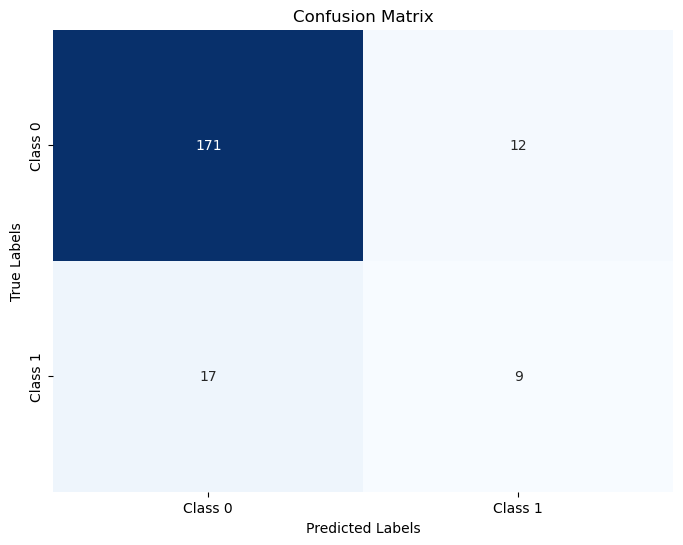

In [74]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': [0.5, 0.75, 'sqrt', None],
    'model__bootstrap': [True, False],
    'model__class_weight': ['balanced', None, 'balanced_subsample']
}
pipeline1 = make_pipeline()
best_params6a, best_model6a = grid_searcher(param_grid, pipeline1, 'f1', X_train_6)
model_test(best_model6a, X_test_6)

In [12]:
1792/34560 * 14580

756.0

In [14]:
1145/1944*1458

858.75

Fitting 10 folds for each of 1944 candidates, totalling 19440 fits
Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': 'balanced_subsample', 'model__max_depth': 5, 'model__max_features': 0.5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 150}
Time Taken: 1145.6134333610535
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.92      0.82      0.87       183
     Class 1       0.28      0.50      0.36        26

    accuracy                           0.78       209
   macro avg       0.60      0.66      0.61       209
weighted avg       0.84      0.78      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       150 |        33 |
+-----------+-----------+
|        13 |        13 |
+-----------+-----------+


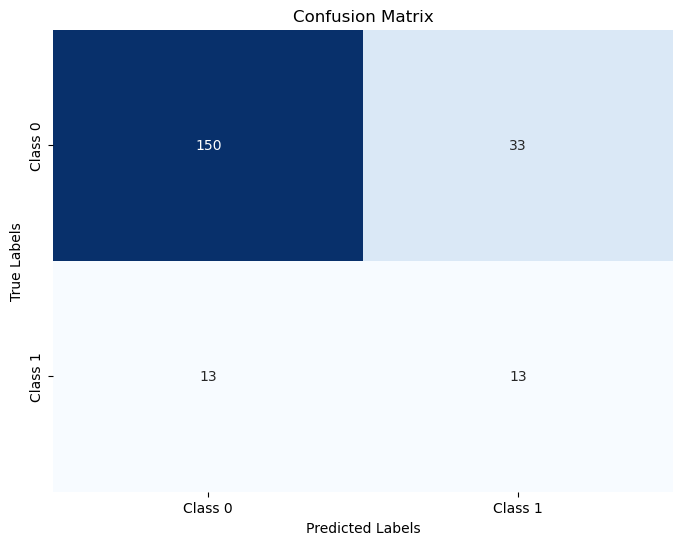

In [5]:
param_grid = {
    'model__n_estimators': [150, 175, 200],
    'model__max_depth': [5, 10, 15],
    'model__min_samples_split': [2, 3, 4],
    'model__min_samples_leaf': [2, 3, 4],
    'model__max_features': [0.5, 0.75, 'sqrt', None],
    'model__bootstrap': [True, False],
    'model__class_weight': ['balanced', None, 'balanced_subsample']
}
pipeline1 = make_pipeline()
best_params6ai, best_model6ai = grid_searcher(param_grid, best_model6a, 'f1', X_train_6)
model_test(best_model6ai, X_test_6)

In [72]:
col_set6, RFC

['M',
 'GRADE',
 'T',
 'IVC INV',
 'MAX DIA',
 'AGE',
 'MONTHS',
 'HEMATURIA',
 'N',
 'APPROACH_1']

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 55}
Time Taken: 38.882752895355225
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.94      0.91       183
     Class 1       0.15      0.08      0.10        26

    accuracy                           0.83       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.83      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


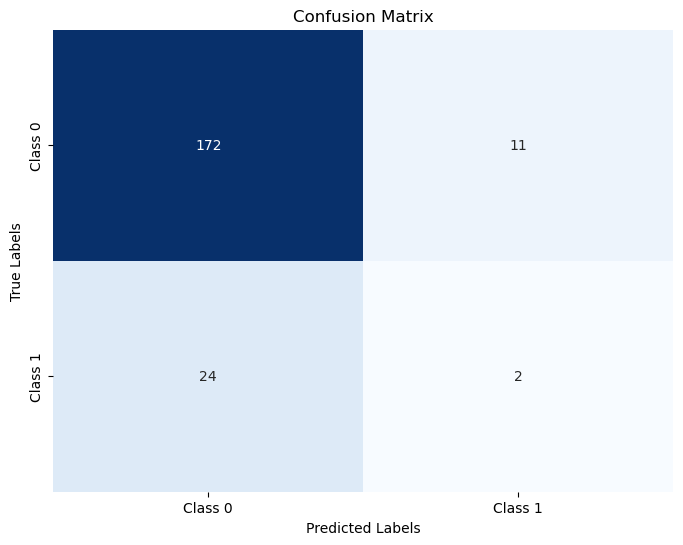

In [323]:
best_params1a1, best_model1a1 = grid_searcher(param_grid1a, pipeline1a, 'recall', X_train_1) # , best_params_list1a
model_test(best_model1a1, X_test_1)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': True}
Time Taken: 0.45335936546325684
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.94      0.91       183
     Class 1       0.15      0.08      0.10        26

    accuracy                           0.83       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.83      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


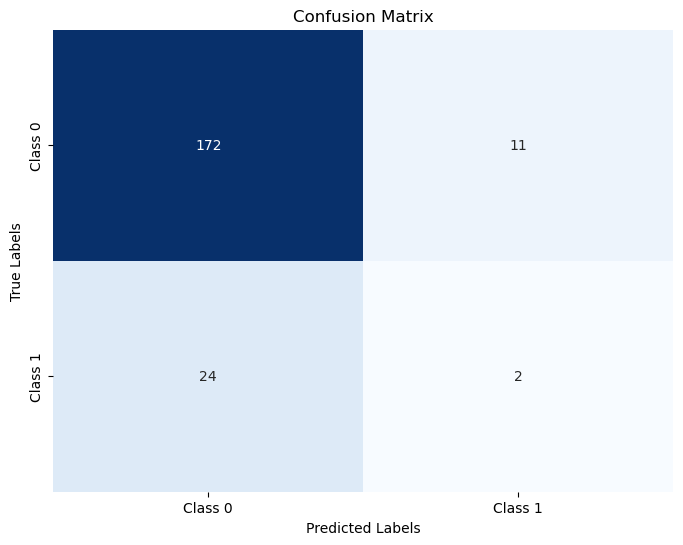

In [324]:
best_params1b1, best_model1b1 = grid_searcher(param_grid1b, best_model1a1, 'recall', X_train_1)
model_test(best_model1b1, X_test_1)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': None}
Time Taken: 1.0920631885528564
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.94      0.91       183
     Class 1       0.15      0.08      0.10        26

    accuracy                           0.83       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.83      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


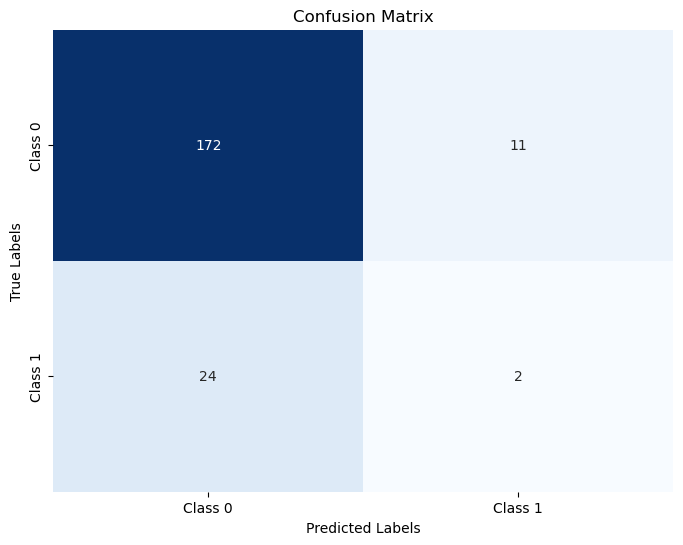

In [325]:
best_params1c1, best_model1c1 = grid_searcher(param_grid1c, best_model1b1, 'recall', X_train_1)
model_test(best_model1c1, X_test_1)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 0.917809009552002
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.94      0.91       183
     Class 1       0.15      0.08      0.10        26

    accuracy                           0.83       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.83      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


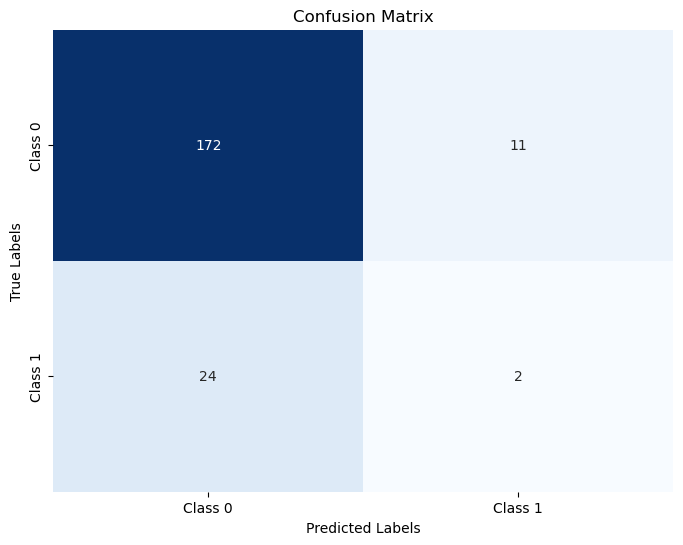

In [326]:
best_params1d1, best_model1d1 = grid_searcher(param_grid1d, best_model1c1, 'recall', X_train_1)
model_test(best_model1d1, X_test_1)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 0.7852039337158203
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.94      0.91       183
     Class 1       0.15      0.08      0.10        26

    accuracy                           0.83       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.83      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


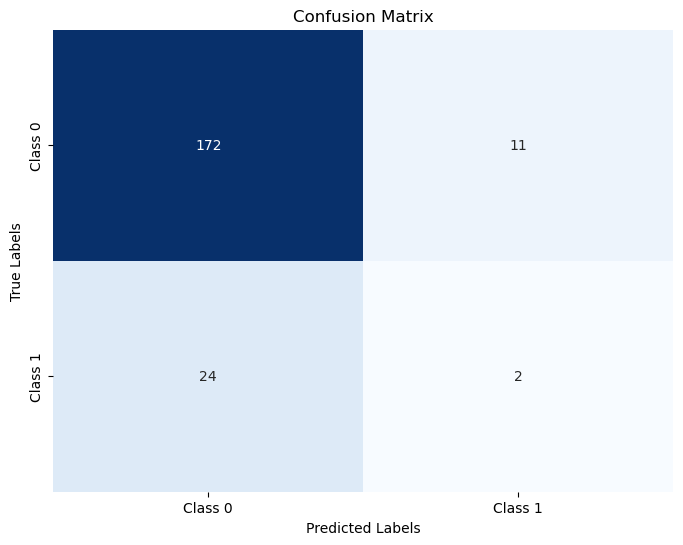

In [327]:
best_params1e1, best_model1e1 = grid_searcher(param_grid1e, best_model1d1, 'recall', X_train_1)
model_test(best_model1e1, X_test_1)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 1.0}
Time Taken: 1.2497355937957764
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.33      0.19      0.24        26

    accuracy                           0.85       209
   macro avg       0.61      0.57      0.58       209
weighted avg       0.82      0.85      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


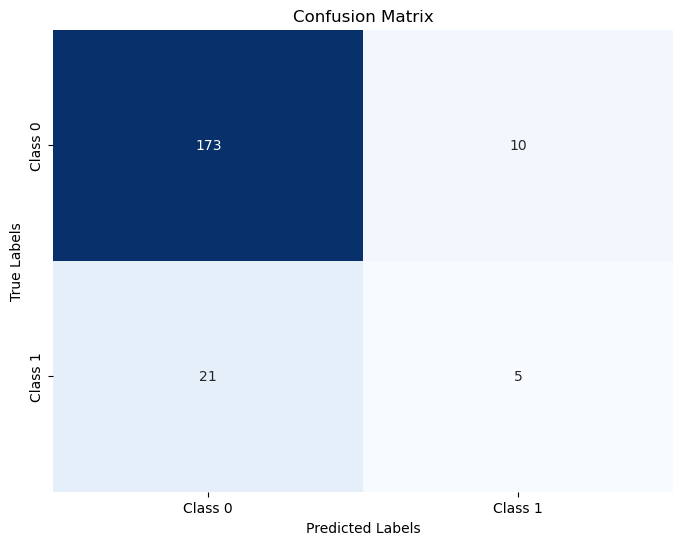

In [328]:
best_params1f1, best_model1f1 = grid_searcher(param_grid1f, best_model1e1, 'recall', X_train_1)
model_test(best_model1f1, X_test_1)

## SET 2

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 90.62227630615234
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.43      0.23      0.30        26

    accuracy                           0.87       209
   macro avg       0.66      0.59      0.61       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


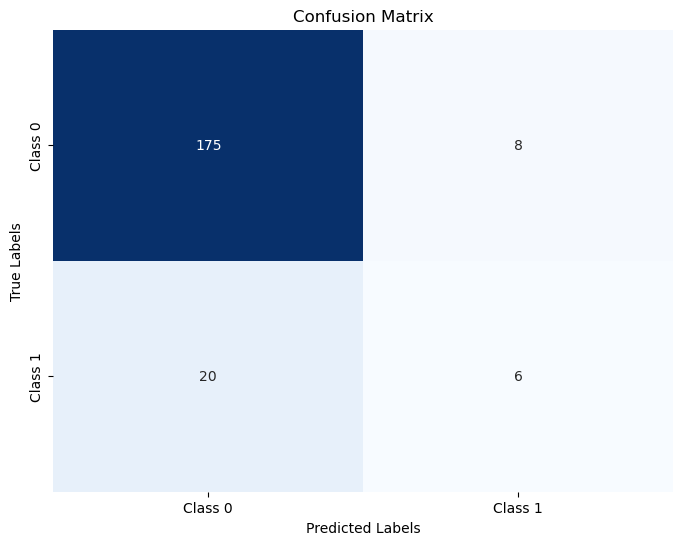

In [31]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': ['sqrt', 'log2'],
    'model__bootstrap': [True, False]
}
pipeline1 = make_pipeline()
best_params1b, best_model1b = grid_searcher(param_grid, pipeline1, 'recall', X_train_2)
model_test(best_model1b, X_test_2)

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 50}
Time Taken: 52.40375113487244
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.99      0.94       183
     Class 1       0.80      0.15      0.26        26

    accuracy                           0.89       209
   macro avg       0.85      0.57      0.60       209
weighted avg       0.88      0.89      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       182 |         1 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


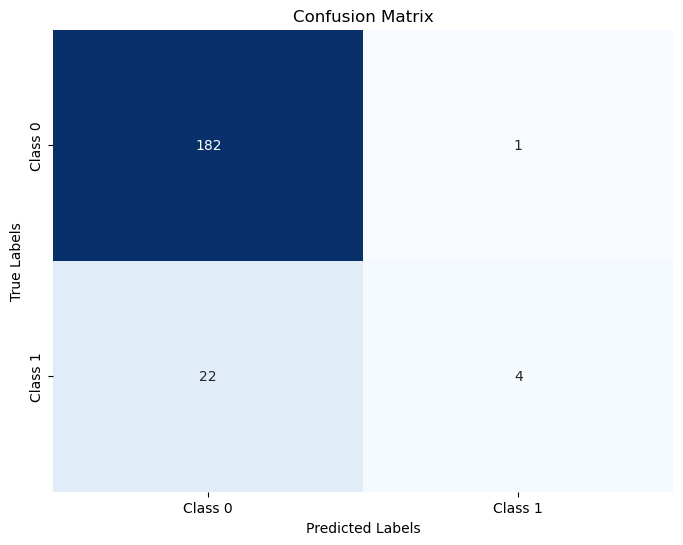

In [348]:
best_params1a2, best_model1a2 = grid_searcher(param_grid1a, pipeline1a, 'recall', X_train_2)
model_test(best_model1a2, X_test_2)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': False}
Time Taken: 0.4605388641357422
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.43      0.23      0.30        26

    accuracy                           0.87       209
   macro avg       0.66      0.59      0.61       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


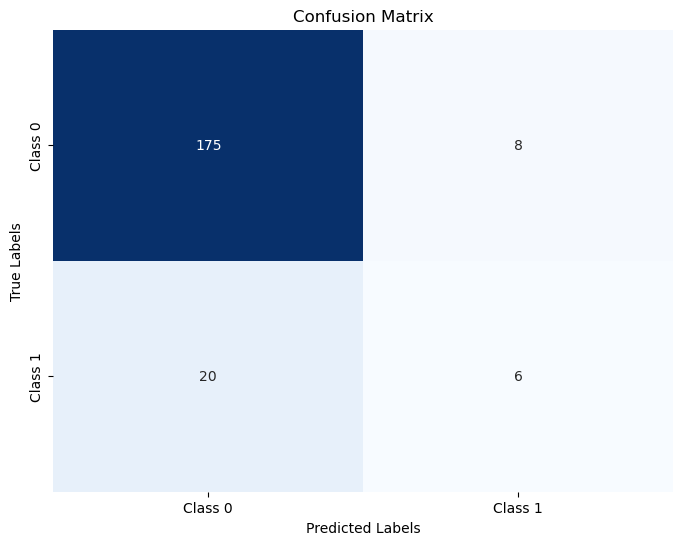

In [349]:
best_params1b2, best_model1b2 = grid_searcher(param_grid1b, best_model1a2, 'recall', X_train_2)
model_test(best_model1b2, X_test_2)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': 15}
Time Taken: 0.9498317241668701
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.46      0.23      0.31        26

    accuracy                           0.87       209
   macro avg       0.68      0.60      0.62       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


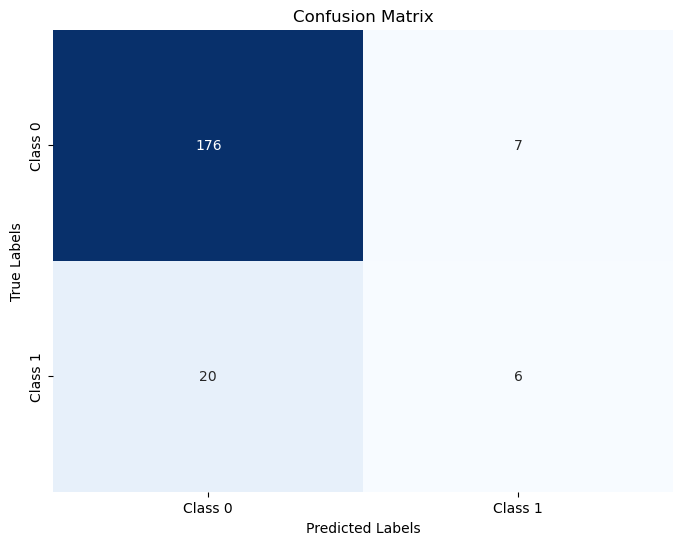

In [350]:
best_params1c2, best_model1c2 = grid_searcher(param_grid1c, best_model1b2, 'recall', X_train_2)
model_test(best_model1c2, X_test_2)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 0.8670997619628906
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.46      0.23      0.31        26

    accuracy                           0.87       209
   macro avg       0.68      0.60      0.62       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


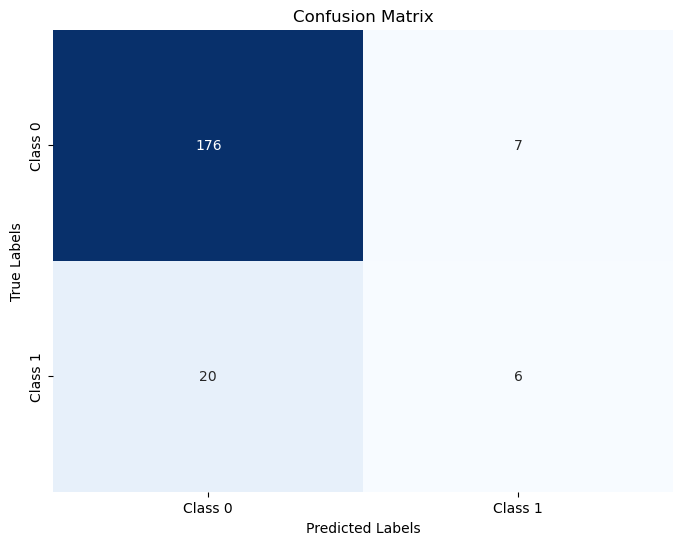

In [351]:
best_params1d2, best_model1d2 = grid_searcher(param_grid1d, best_model1c2, 'recall', X_train_2)
model_test(best_model1d2, X_test_2)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 0.6424098014831543
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.46      0.23      0.31        26

    accuracy                           0.87       209
   macro avg       0.68      0.60      0.62       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


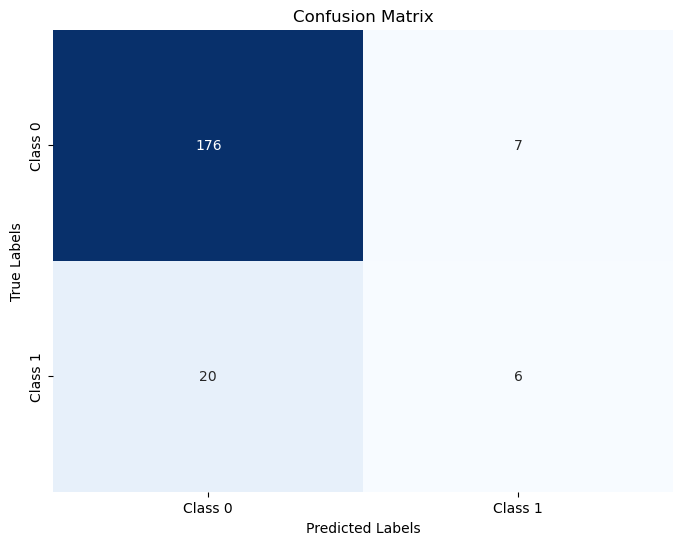

In [352]:
best_params1e2, best_model1e2 = grid_searcher(param_grid1e, best_model1d2, 'recall', X_train_2)
model_test(best_model1e2, X_test_2)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 1.0}
Time Taken: 1.1819665431976318
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.89      0.89       183
     Class 1       0.25      0.27      0.26        26

    accuracy                           0.81       209
   macro avg       0.57      0.58      0.57       209
weighted avg       0.81      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       162 |        21 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


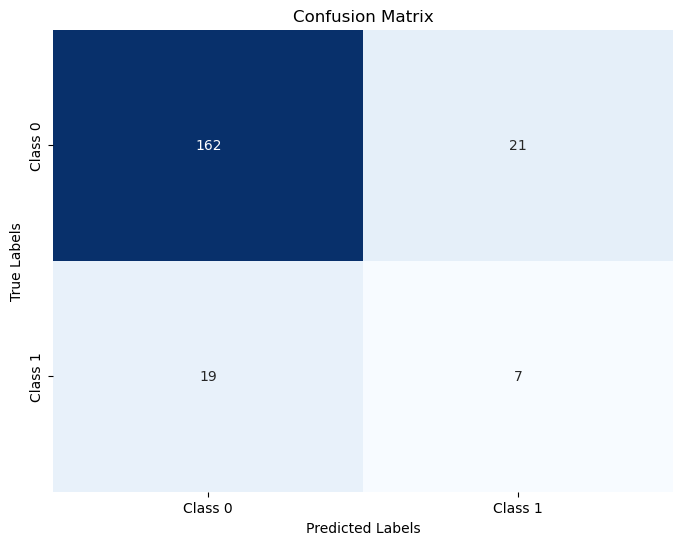

In [353]:
best_params1f2, best_model1f2 = grid_searcher(param_grid1f, best_model1e2, 'recall', X_train_2)
model_test(best_model1f2, X_test_2)

## SET 3

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 111}
Time Taken: 75.15857911109924
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.94      0.91       183
     Class 1       0.27      0.15      0.20        26

    accuracy                           0.84       209
   macro avg       0.58      0.55      0.55       209
weighted avg       0.81      0.84      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


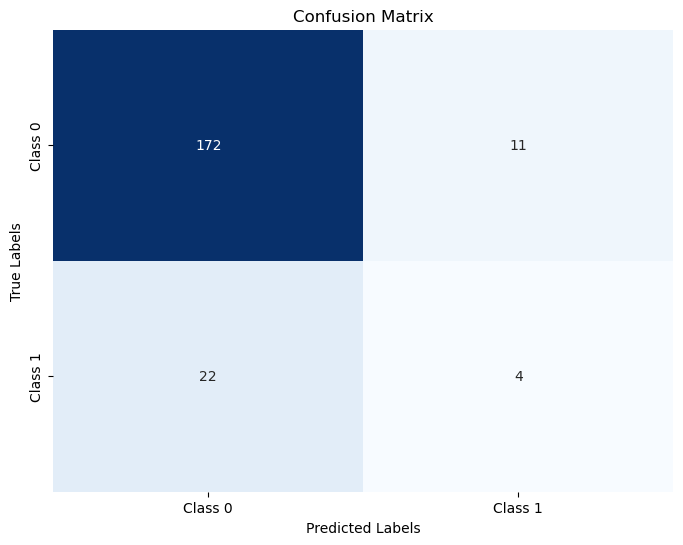

In [363]:
best_params1a3, best_model1a3 = grid_searcher(param_grid1a, pipeline1a, 'recall', X_train_3)
model_test(best_model1a3, X_test_3)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': True}
Time Taken: 1.45810866355896
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.94      0.91       183
     Class 1       0.27      0.15      0.20        26

    accuracy                           0.84       209
   macro avg       0.58      0.55      0.55       209
weighted avg       0.81      0.84      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


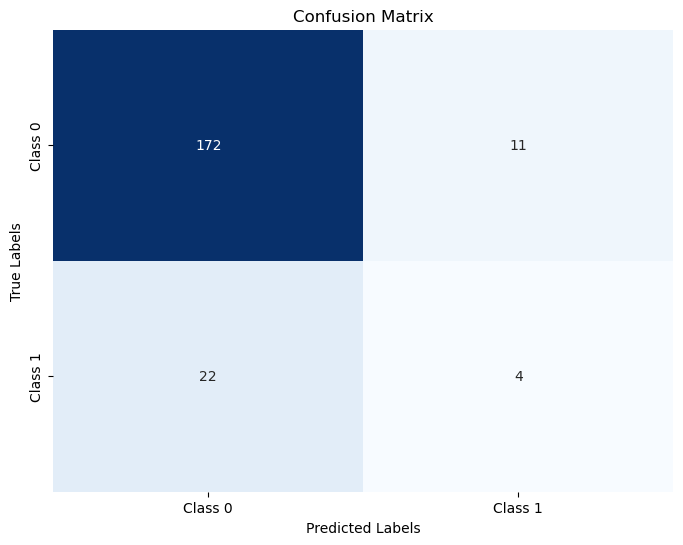

In [364]:
best_params1b3, best_model1b3 = grid_searcher(param_grid1b, best_model1a3, 'recall', X_train_3)
model_test(best_model1b3, X_test_3)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': None}
Time Taken: 3.461033344268799
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.94      0.91       183
     Class 1       0.27      0.15      0.20        26

    accuracy                           0.84       209
   macro avg       0.58      0.55      0.55       209
weighted avg       0.81      0.84      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


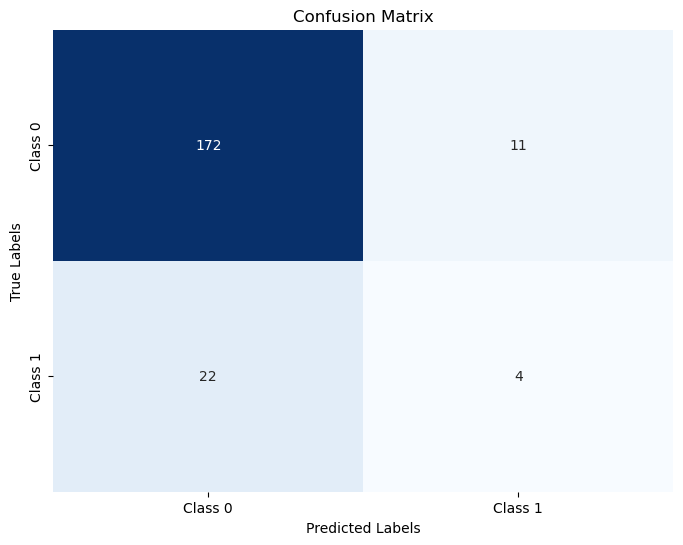

In [365]:
best_params1c3, best_model1c3 = grid_searcher(param_grid1c, best_model1b3, 'recall', X_train_3)
model_test(best_model1c3, X_test_3)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 2.9916553497314453
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.94      0.91       183
     Class 1       0.27      0.15      0.20        26

    accuracy                           0.84       209
   macro avg       0.58      0.55      0.55       209
weighted avg       0.81      0.84      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


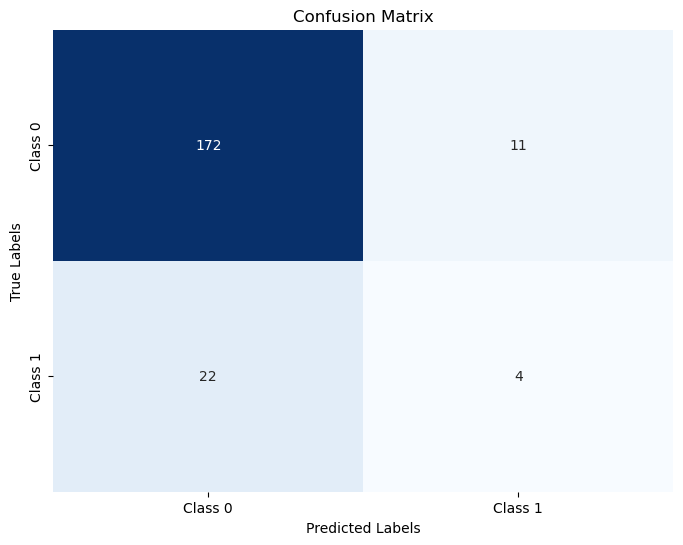

In [366]:
best_params1d3, best_model1d3 = grid_searcher(param_grid1d, best_model1c3, 'recall', X_train_3)
model_test(best_model1d3, X_test_3)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 2.160250186920166
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.94      0.91       183
     Class 1       0.27      0.15      0.20        26

    accuracy                           0.84       209
   macro avg       0.58      0.55      0.55       209
weighted avg       0.81      0.84      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


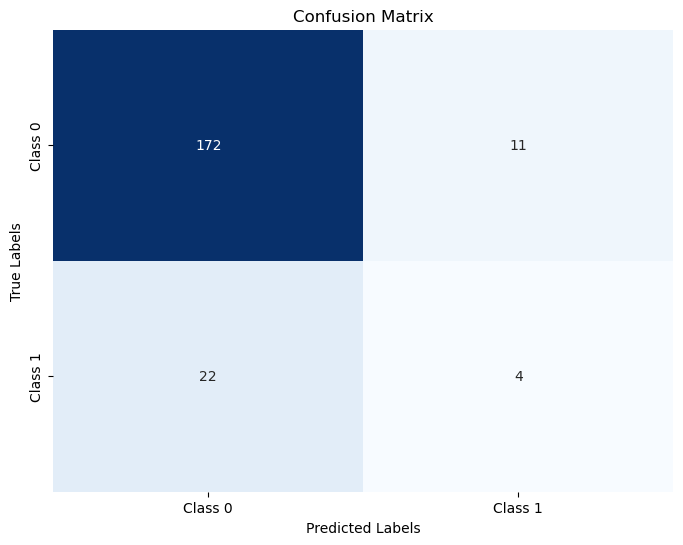

In [367]:
best_params1e3, best_model1e3 = grid_searcher(param_grid1e, best_model1d3, 'recall', X_train_3)
model_test(best_model1e3, X_test_3)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 1.0}
Time Taken: 3.9781270027160645
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.36      0.19      0.25        26

    accuracy                           0.86       209
   macro avg       0.62      0.57      0.59       209
weighted avg       0.83      0.86      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


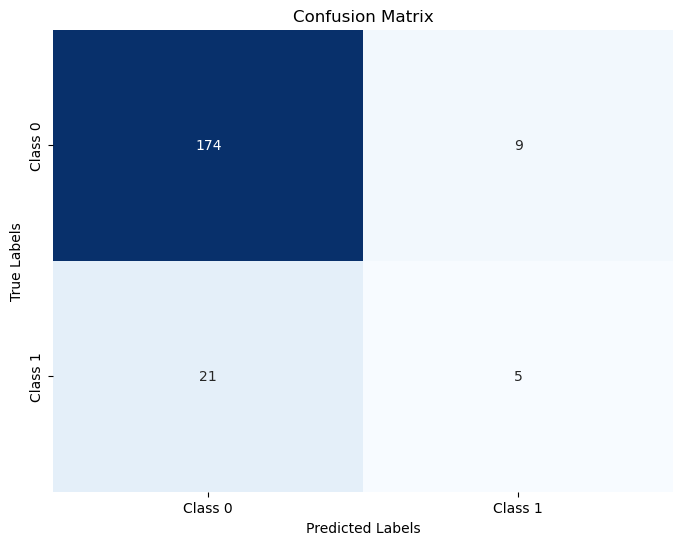

In [368]:
best_params1f3, best_model1f3 = grid_searcher(param_grid1f, best_model1e3, 'recall', X_train_3)
model_test(best_model1f3, X_test_3)

## SET 4

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 103}
Time Taken: 66.22740578651428
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.99      0.93       183
     Class 1       0.50      0.08      0.13        26

    accuracy                           0.88       209
   macro avg       0.69      0.53      0.53       209
weighted avg       0.84      0.88      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       181 |         2 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


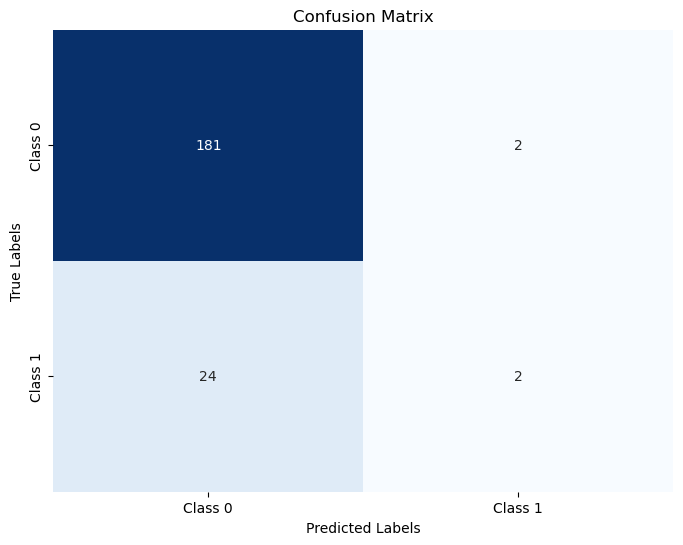

In [379]:
best_params1a4, best_model1a4 = grid_searcher(param_grid1a, pipeline1a, 'recall', X_train_4)
model_test(best_model1a4, X_test_4)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': False}
Time Taken: 1.3709635734558105
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.97      0.93       183
     Class 1       0.55      0.23      0.32        26

    accuracy                           0.88       209
   macro avg       0.72      0.60      0.63       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       178 |         5 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


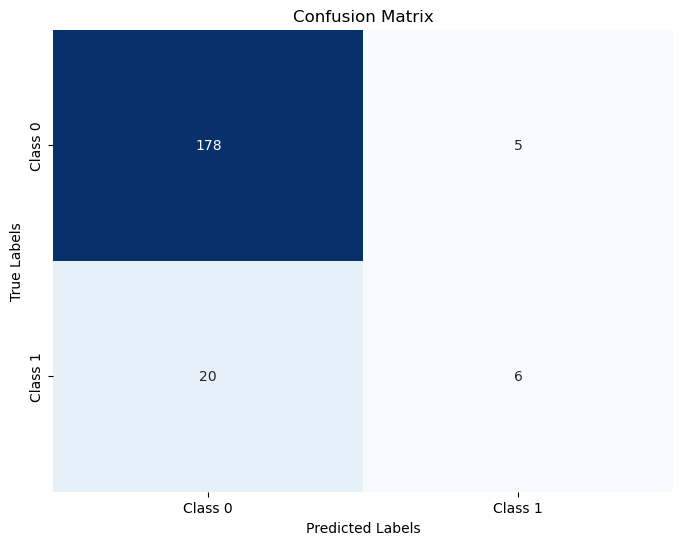

In [380]:
best_params1b4, best_model1b4 = grid_searcher(param_grid1b, best_model1a4, 'recall', X_train_4)
model_test(best_model1b4, X_test_4)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': None}
Time Taken: 2.9014899730682373
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.97      0.93       183
     Class 1       0.55      0.23      0.32        26

    accuracy                           0.88       209
   macro avg       0.72      0.60      0.63       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       178 |         5 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


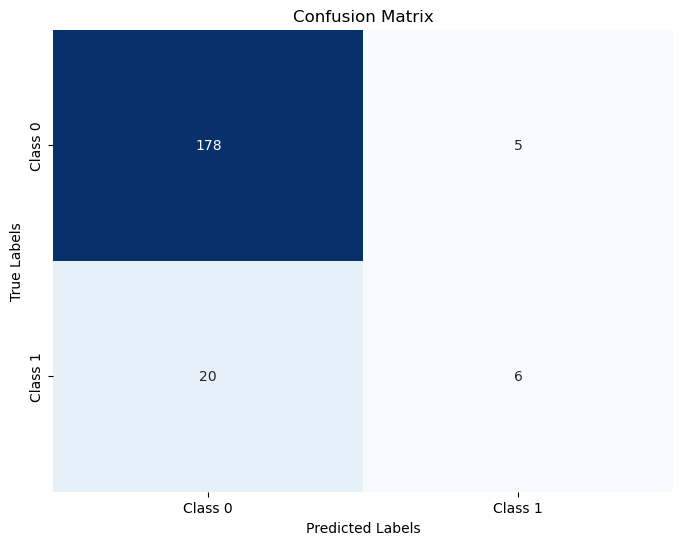

In [381]:
best_params1c4, best_model1c4 = grid_searcher(param_grid1c, best_model1b4, 'recall', X_train_4)
model_test(best_model1c4, X_test_4)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 2.4863836765289307
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.97      0.93       183
     Class 1       0.55      0.23      0.32        26

    accuracy                           0.88       209
   macro avg       0.72      0.60      0.63       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       178 |         5 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


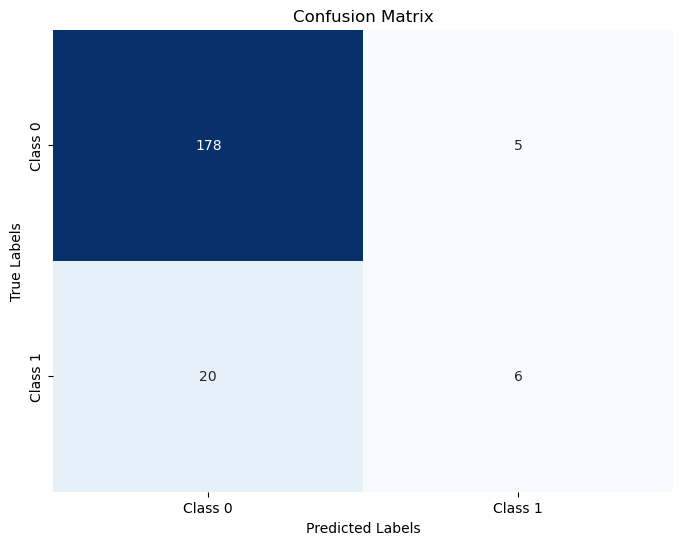

In [382]:
best_params1d4, best_model1d4 = grid_searcher(param_grid1d, best_model1c4, 'recall', X_train_4)
model_test(best_model1d4, X_test_4)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 1.9239451885223389
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.97      0.93       183
     Class 1       0.55      0.23      0.32        26

    accuracy                           0.88       209
   macro avg       0.72      0.60      0.63       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       178 |         5 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


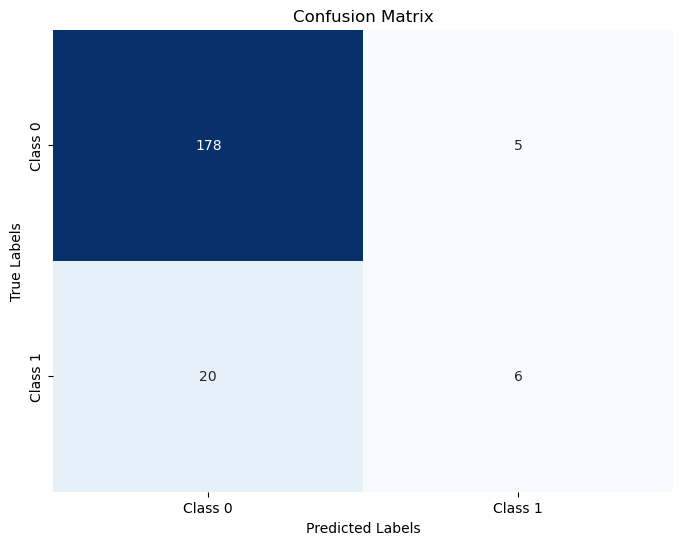

In [383]:
best_params1e4, best_model1e4 = grid_searcher(param_grid1e, best_model1d4, 'recall', X_train_4)
model_test(best_model1e4, X_test_4)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 1.0}
Time Taken: 3.7628791332244873
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.88      0.89       183
     Class 1       0.27      0.31      0.29        26

    accuracy                           0.81       209
   macro avg       0.58      0.59      0.59       209
weighted avg       0.82      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       161 |        22 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


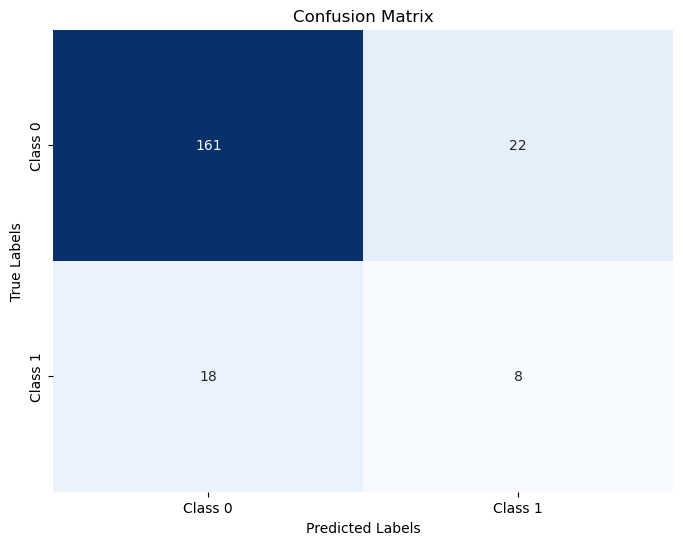

In [384]:
best_params1f4, best_model1f4 = grid_searcher(param_grid1f, best_model1e4, 'recall', X_train_4)
model_test(best_model1f4, X_test_4)

## SET 5

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 89}
Time Taken: 43.67073106765747
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.29      0.15      0.20        26

    accuracy                           0.85       209
   macro avg       0.59      0.55      0.56       209
weighted avg       0.81      0.85      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


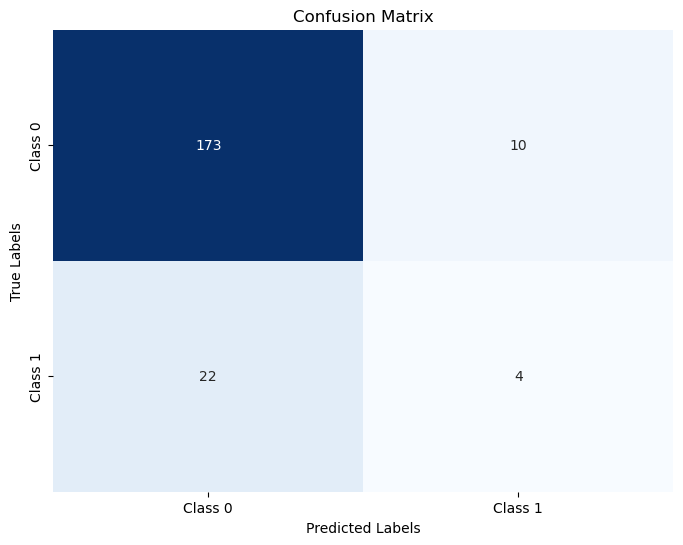

In [18]:
best_params1a5, best_model1a5 = grid_searcher(param_grid1a, pipeline1a, 'recall', X_train_5)
model_test(best_model1a5, X_test_5)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': False}
Time Taken: 0.6933646202087402
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.92      0.90       183
     Class 1       0.12      0.08      0.10        26

    accuracy                           0.82       209
   macro avg       0.50      0.50      0.50       209
weighted avg       0.78      0.82      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       169 |        14 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


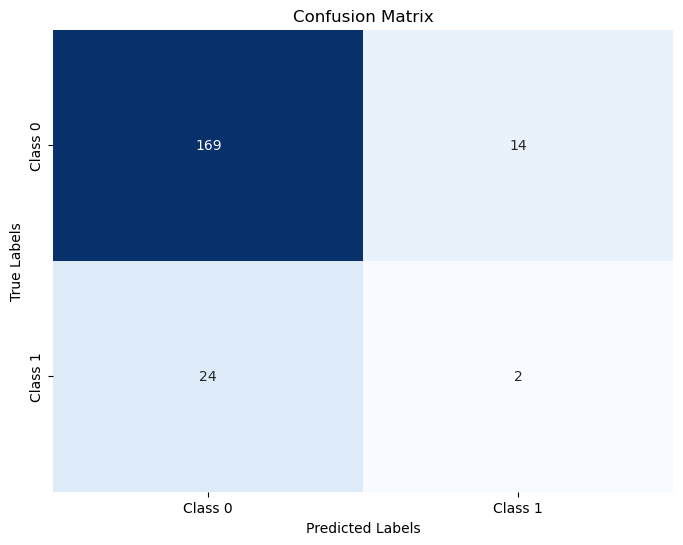

In [19]:
best_params1b5, best_model1b5 = grid_searcher(param_grid1b, best_model1a5, 'recall', X_train_5)
model_test(best_model1b5, X_test_5)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': None}
Time Taken: 1.3809607028961182
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.92      0.90       183
     Class 1       0.12      0.08      0.10        26

    accuracy                           0.82       209
   macro avg       0.50      0.50      0.50       209
weighted avg       0.78      0.82      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       169 |        14 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


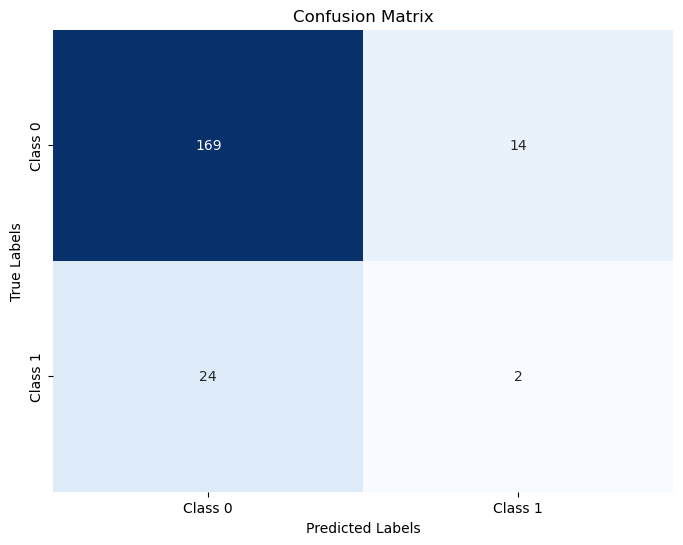

In [20]:
best_params1c5, best_model1c5 = grid_searcher(param_grid1c, best_model1b5, 'recall', X_train_5)
model_test(best_model1c5, X_test_5)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 5}
Time Taken: 1.2102711200714111
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.96      0.92       183
     Class 1       0.33      0.15      0.21        26

    accuracy                           0.86       209
   macro avg       0.61      0.56      0.57       209
weighted avg       0.82      0.86      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


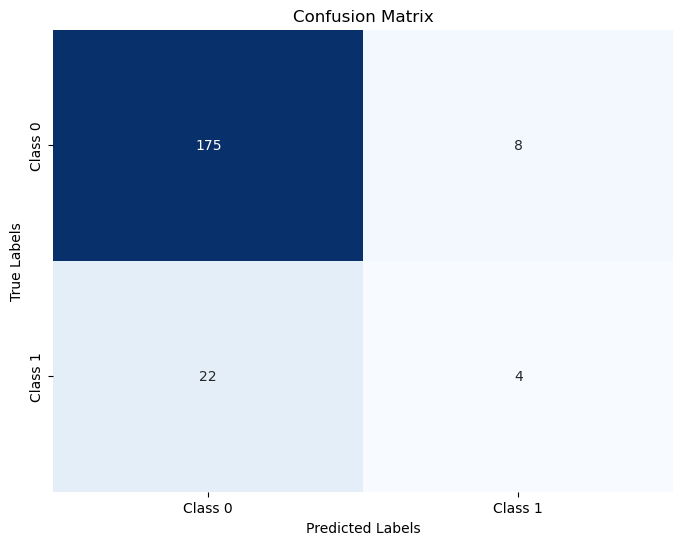

In [21]:
best_params1d5, best_model1d5 = grid_searcher(param_grid1d, best_model1c5, 'recall', X_train_5)
model_test(best_model1d5, X_test_5)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 0.8809406757354736
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.96      0.92       183
     Class 1       0.33      0.15      0.21        26

    accuracy                           0.86       209
   macro avg       0.61      0.56      0.57       209
weighted avg       0.82      0.86      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


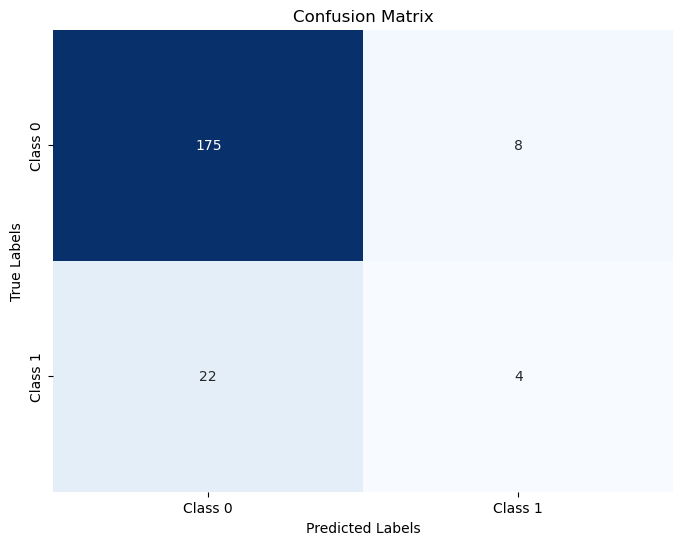

In [22]:
best_params1e5, best_model1e5 = grid_searcher(param_grid1e, best_model1d5, 'recall', X_train_5)
model_test(best_model1e5, X_test_5)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 1.0}
Time Taken: 1.6394271850585938
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.91      0.89       183
     Class 1       0.19      0.15      0.17        26

    accuracy                           0.81       209
   macro avg       0.54      0.53      0.53       209
weighted avg       0.80      0.81      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       166 |        17 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


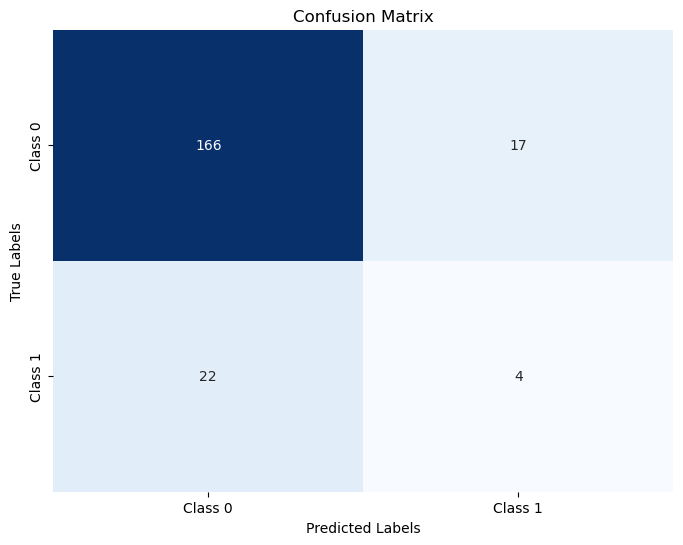

In [23]:
best_params1f5, best_model1f5 = grid_searcher(param_grid1f, best_model1e5, 'recall', X_train_5)
model_test(best_model1f5, X_test_5)

# F1

## BASELINE

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Time Taken: 99.5388355255127
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


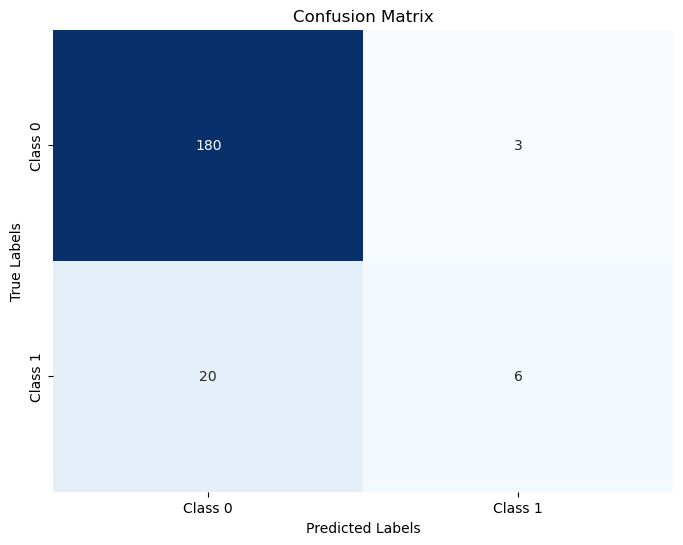

In [330]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': ['sqrt', 'log2'],
    'model__bootstrap': [True, False]
}
pipeline2 = make_pipeline()
best_params, best_model = grid_searcher(param_grid, pipeline2, 'f1')
model_test(best_model)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 50}
Time Taken: 88.97592186927795
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.94      0.92       183
     Class 1       0.39      0.27      0.32        26

    accuracy                           0.86       209
   macro avg       0.64      0.60      0.62       209
weighted avg       0.84      0.86      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


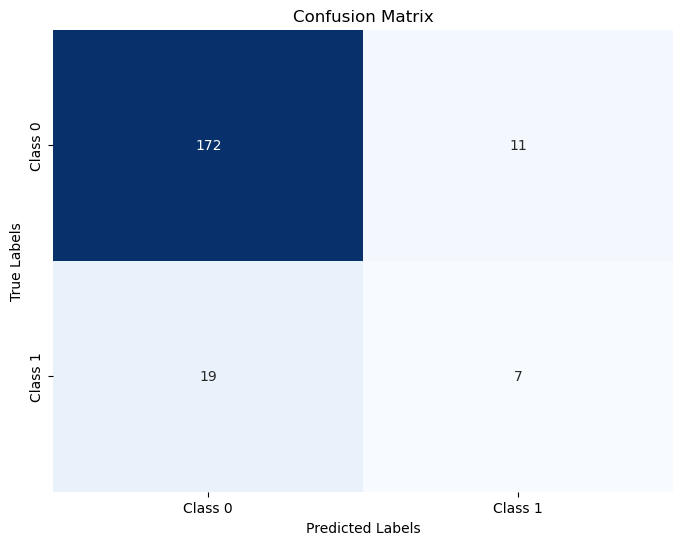

In [331]:
pipeline2_1 = make_pipeline()
best_params_1, best_model_1 = grid_searcher(param_grid, pipeline2_1, 'f1', X_train_1)
model_test(best_model_1, X_test_1)

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 50}
Time Taken: 41.39443564414978
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      1.00      0.94       183
     Class 1       1.00      0.04      0.07        26

    accuracy                           0.88       209
   macro avg       0.94      0.52      0.51       209
weighted avg       0.89      0.88      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       183 |         0 |
+-----------+-----------+
|        25 |         1 |
+-----------+-----------+


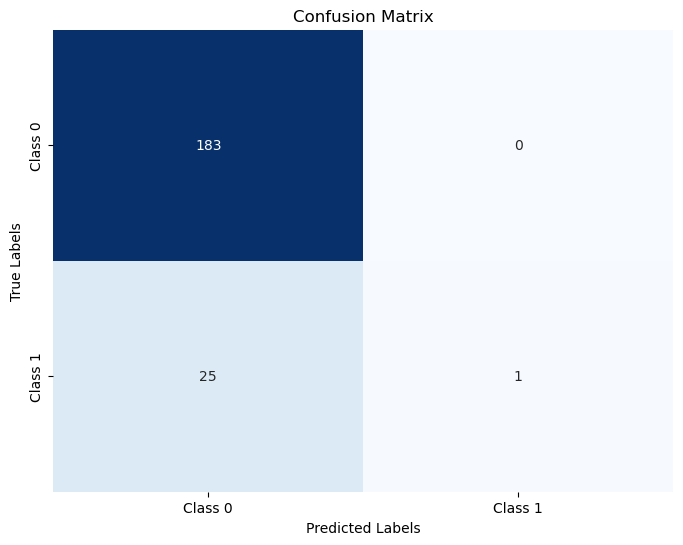

In [332]:
param_grid2a = {
    'model__n_estimators': list(np.arange(50, 201)),
}
pipeline2a = make_pipeline()
best_params2a, best_model2a = grid_searcher(param_grid2a, pipeline2a, 'f1')
model_test(best_model2a)

In [333]:
# param_grid = {
#     'model__n_estimators': [50, 100, 200],
#     'model__max_depth': [None, 10, 20, 30],
#     'model__min_samples_split': [2, 4, 6],
#     'model__min_samples_leaf': [1, 2, 3],
#     'model__max_features': ['sqrt', 'log2'],
#     'model__bootstrap': [True, False]
# }

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': False}
Time Taken: 0.45288634300231934
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


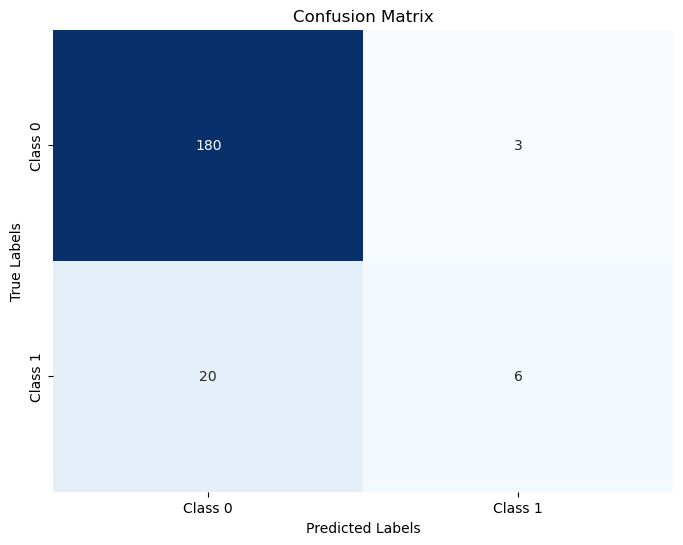

In [334]:
param_grid2b = {
    'model__bootstrap': [True, False]
}
best_params2b, best_model2b = grid_searcher(param_grid2b, best_model2a, 'f1')
model_test(best_model2b)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': None}
Time Taken: 1.1051294803619385
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


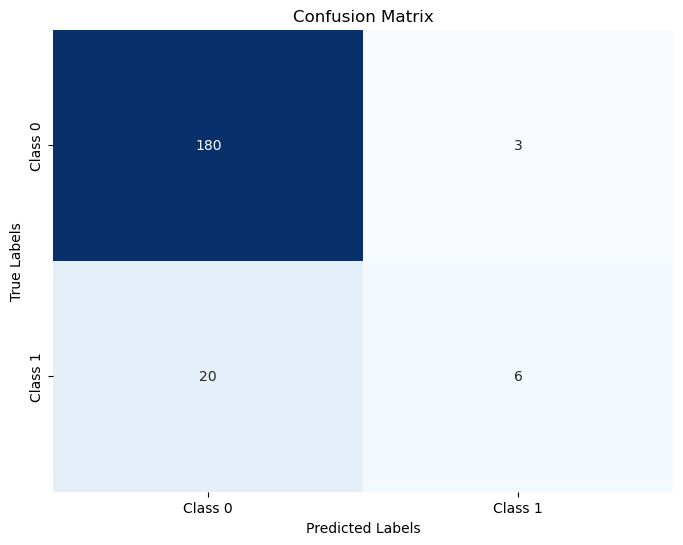

In [335]:
param_grid2c = {
    'model__max_depth': [None, 5, 10, 15, 20, 25, 30]
}
best_params2c, best_model2c = grid_searcher(param_grid2c, best_model2b, 'f1')
model_test(best_model2c)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 0.850407600402832
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


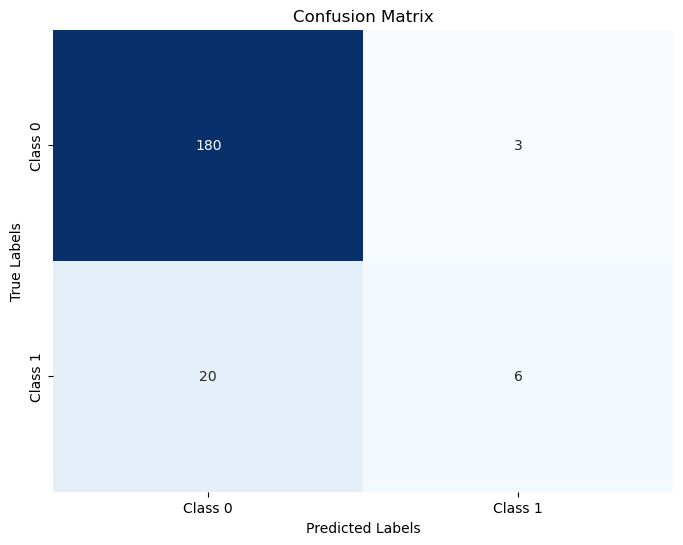

In [336]:
param_grid2d = {
    'model__min_samples_split': [2, 3, 4, 5, 6, 7]
}
best_params2d, best_model2d = grid_searcher(param_grid2d, best_model2c, 'f1')
model_test(best_model2d)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 0.6274702548980713
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       183
     Class 1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


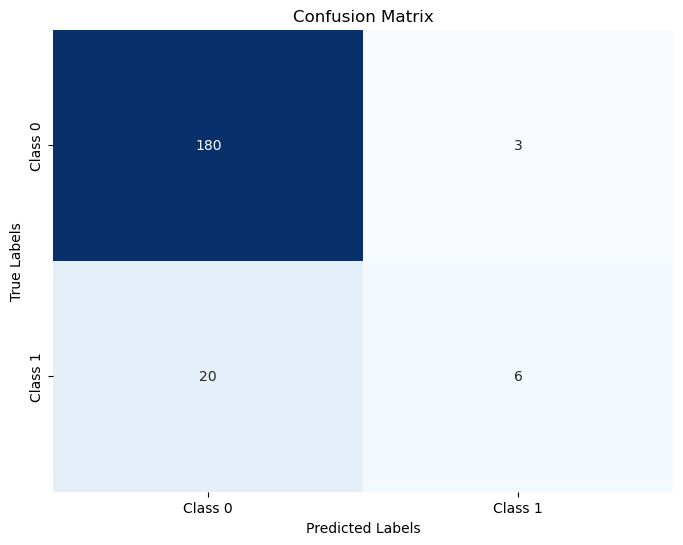

In [337]:
param_grid2e = {
    'model__min_samples_leaf': [1, 2, 3, 4],
}
best_params2e, best_model2e = grid_searcher(param_grid2e, best_model2d, 'f1')
model_test(best_model2e)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 0.9}
Time Taken: 1.3311426639556885
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.92      0.91       183
     Class 1       0.32      0.27      0.29        26

    accuracy                           0.84       209
   macro avg       0.61      0.59      0.60       209
weighted avg       0.83      0.84      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       168 |        15 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


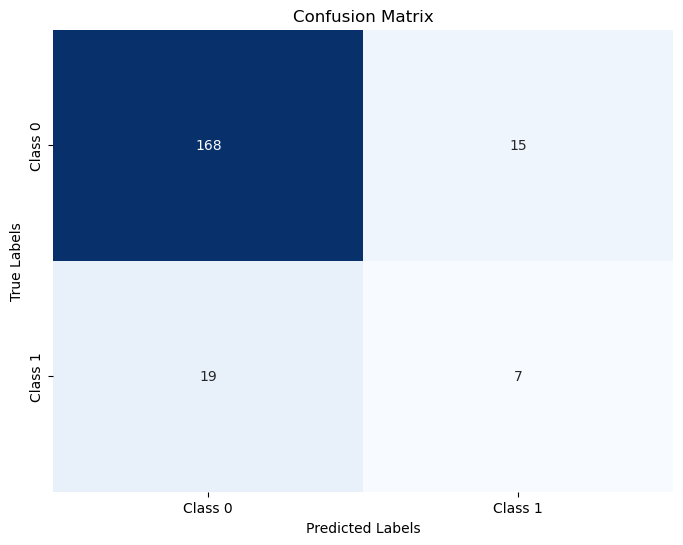

In [338]:
param_grid2f = {
    'model__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'sqrt', 'log2']
}
best_params2f, best_model2f = grid_searcher(param_grid1f, best_model1e, 'f1')
model_test(best_model2f)

## SET 1

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 58}
Time Taken: 39.12190389633179
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91       183
     Class 1       0.17      0.08      0.11        26

    accuracy                           0.84       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.84      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


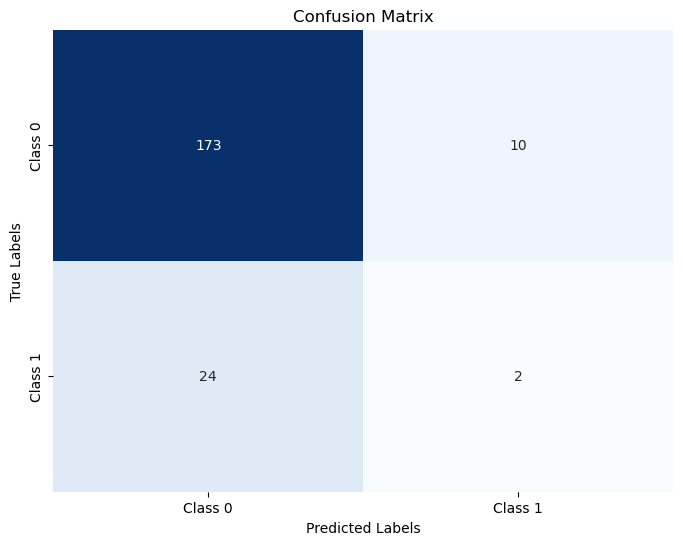

In [339]:
best_params2a1, best_model2a1 = grid_searcher(param_grid2a, pipeline2a, 'f1', X_train_1)
model_test(best_model2a1, X_test_1)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': True}
Time Taken: 0.5424342155456543
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91       183
     Class 1       0.17      0.08      0.11        26

    accuracy                           0.84       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.84      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


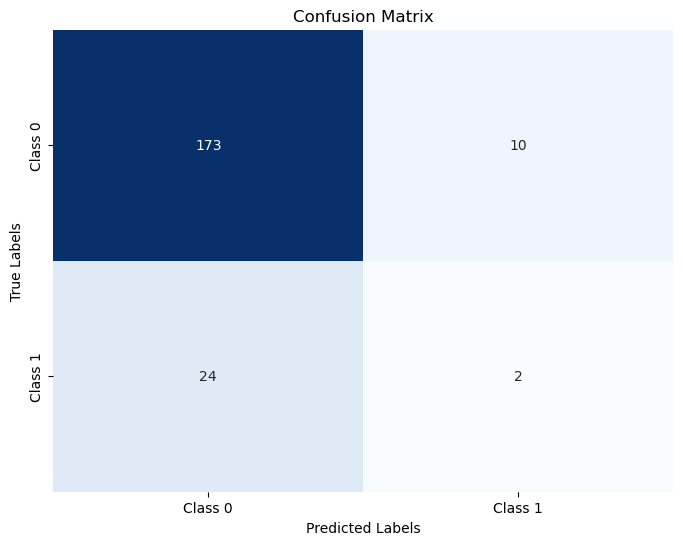

In [340]:
best_params2b1, best_model2b1 = grid_searcher(param_grid2b, best_model2a1, 'f1', X_train_1)
model_test(best_model2b1, X_test_1)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': None}
Time Taken: 1.1568100452423096
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91       183
     Class 1       0.17      0.08      0.11        26

    accuracy                           0.84       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.84      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


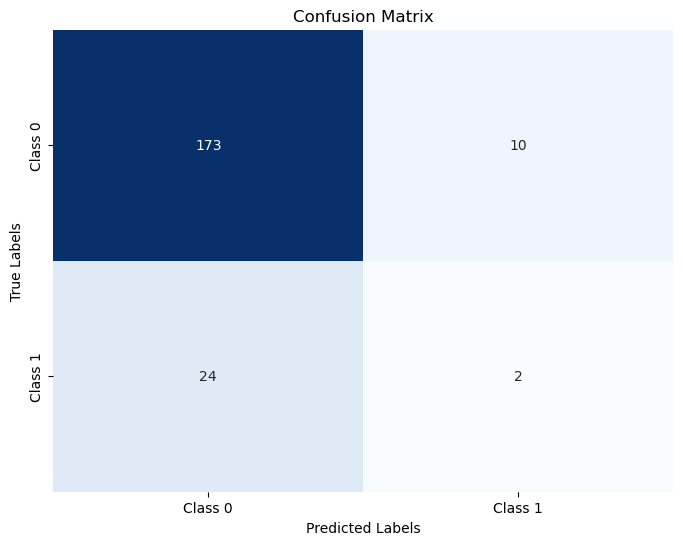

In [341]:
best_params2c1, best_model2c1 = grid_searcher(param_grid2c, best_model2b1, 'f1', X_train_1)
model_test(best_model2c1, X_test_1)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 3}
Time Taken: 0.9841551780700684
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.96      0.93       183
     Class 1       0.42      0.19      0.26        26

    accuracy                           0.87       209
   macro avg       0.66      0.58      0.59       209
weighted avg       0.83      0.87      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


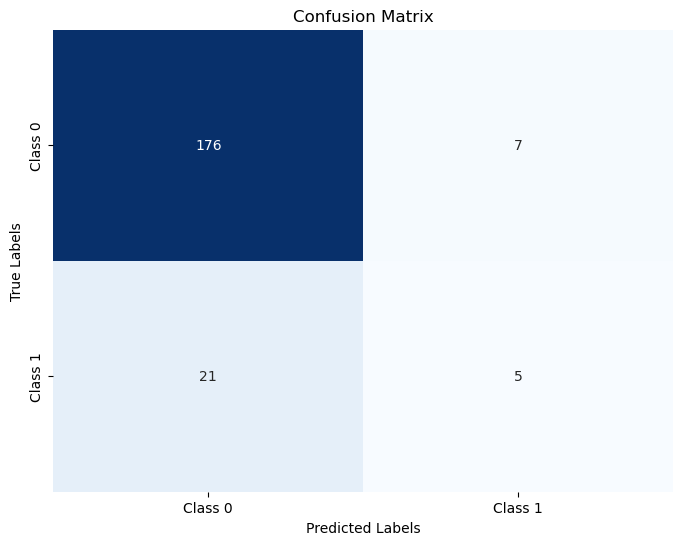

In [342]:
best_params2d1, best_model2d1 = grid_searcher(param_grid2d, best_model2c1, 'f1', X_train_1)
model_test(best_model2d1, X_test_1)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 0.7570059299468994
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.96      0.93       183
     Class 1       0.42      0.19      0.26        26

    accuracy                           0.87       209
   macro avg       0.66      0.58      0.59       209
weighted avg       0.83      0.87      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


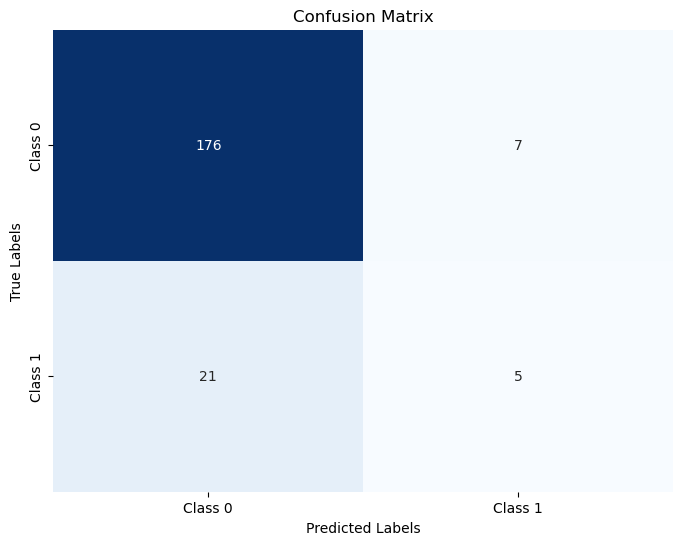

In [343]:
best_params2e1, best_model2e1 = grid_searcher(param_grid2e, best_model2d1, 'f1', X_train_1)
model_test(best_model2e1, X_test_1)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 0.8}
Time Taken: 1.3401339054107666
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.96      0.92       183
     Class 1       0.36      0.15      0.22        26

    accuracy                           0.86       209
   macro avg       0.63      0.56      0.57       209
weighted avg       0.82      0.86      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


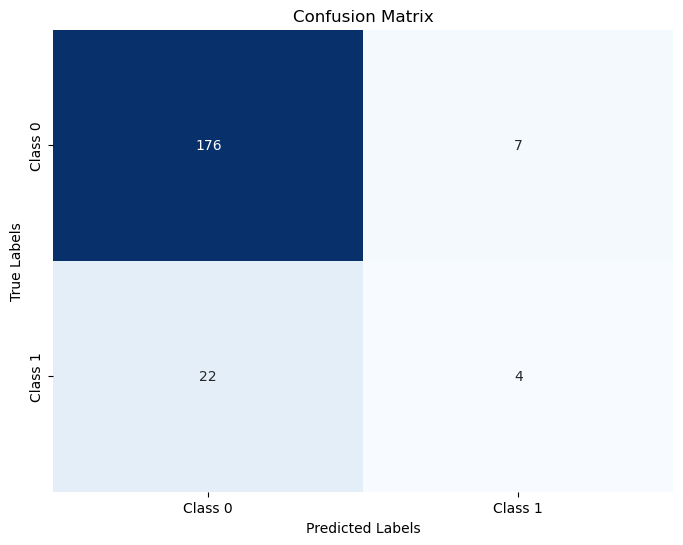

In [344]:
best_params2f1, best_model2f1 = grid_searcher(param_grid2f, best_model2e1, 'f1', X_train_1)
model_test(best_model2f1, X_test_1)

## SET 2

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 50}
Time Taken: 41.43957829475403
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.99      0.94       183
     Class 1       0.80      0.15      0.26        26

    accuracy                           0.89       209
   macro avg       0.85      0.57      0.60       209
weighted avg       0.88      0.89      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       182 |         1 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


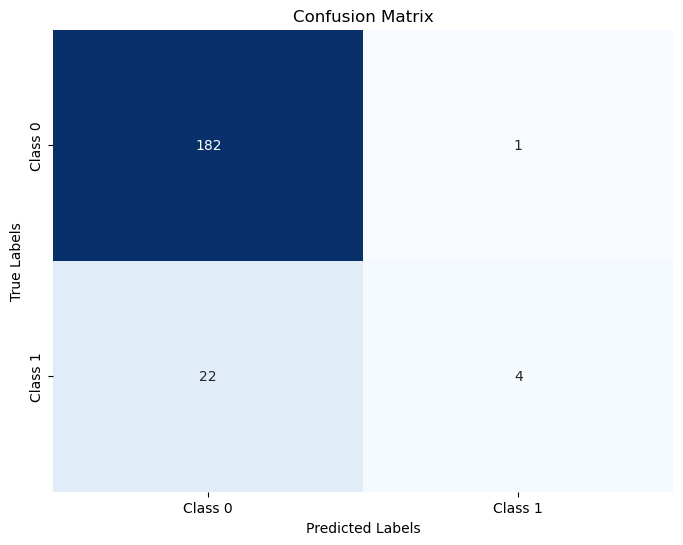

In [354]:
best_params2a2, best_model2a2 = grid_searcher(param_grid2a, pipeline2a, 'f1', X_train_2)
model_test(best_model2a2, X_test_2)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': False}
Time Taken: 0.4196510314941406
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.43      0.23      0.30        26

    accuracy                           0.87       209
   macro avg       0.66      0.59      0.61       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


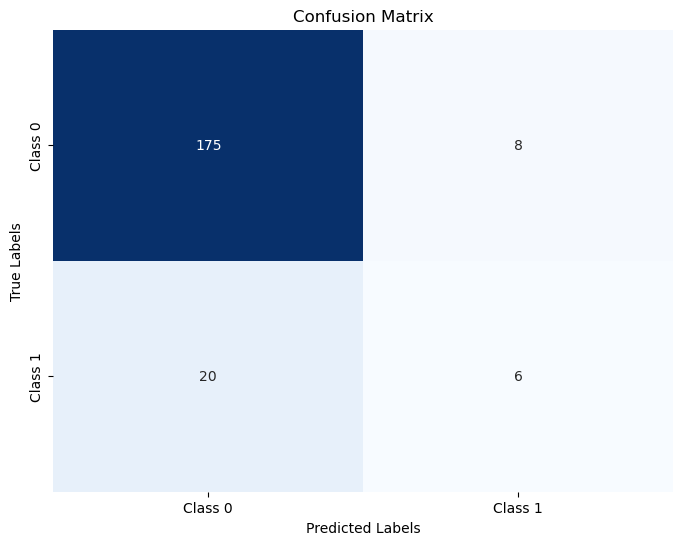

In [355]:
best_params2b2, best_model2b2 = grid_searcher(param_grid2b, best_model2a2, 'f1', X_train_2)
model_test(best_model2b2, X_test_2)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': 15}
Time Taken: 0.9030656814575195
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.46      0.23      0.31        26

    accuracy                           0.87       209
   macro avg       0.68      0.60      0.62       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


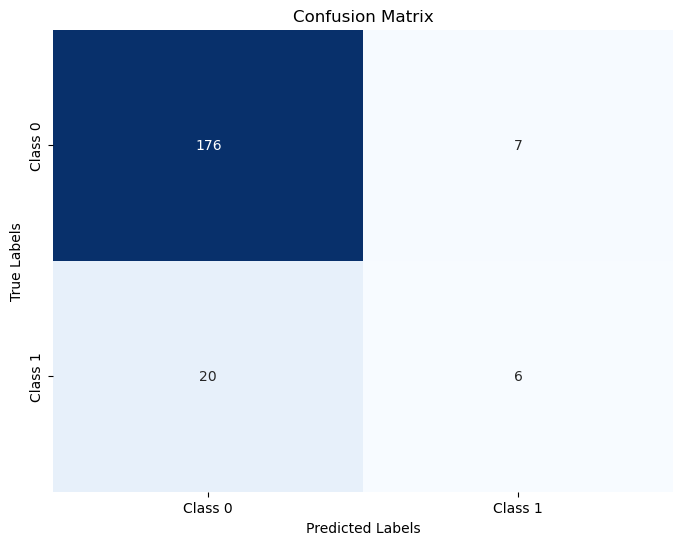

In [356]:
best_params2c2, best_model2c2 = grid_searcher(param_grid2c, best_model2b2, 'f1', X_train_2)
model_test(best_model2c2, X_test_2)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 0.8053810596466064
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.46      0.23      0.31        26

    accuracy                           0.87       209
   macro avg       0.68      0.60      0.62       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


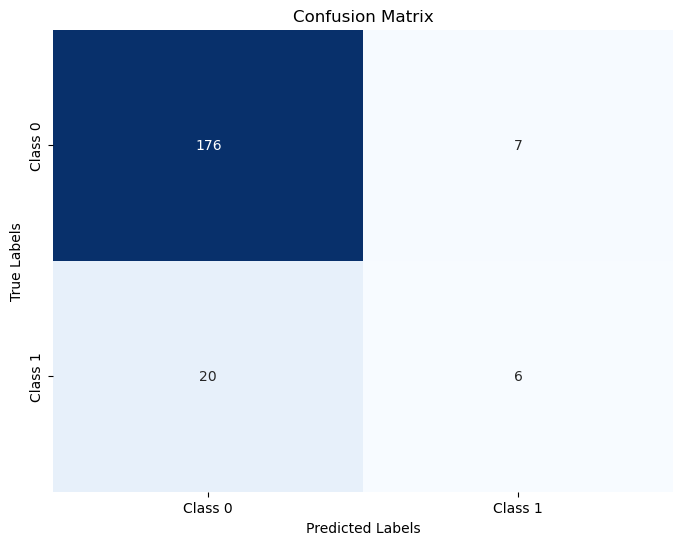

In [357]:
best_params2d2, best_model2d2 = grid_searcher(param_grid2d, best_model2c2, 'f1', X_train_2)
model_test(best_model2d2, X_test_2)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 0.6324031352996826
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.46      0.23      0.31        26

    accuracy                           0.87       209
   macro avg       0.68      0.60      0.62       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


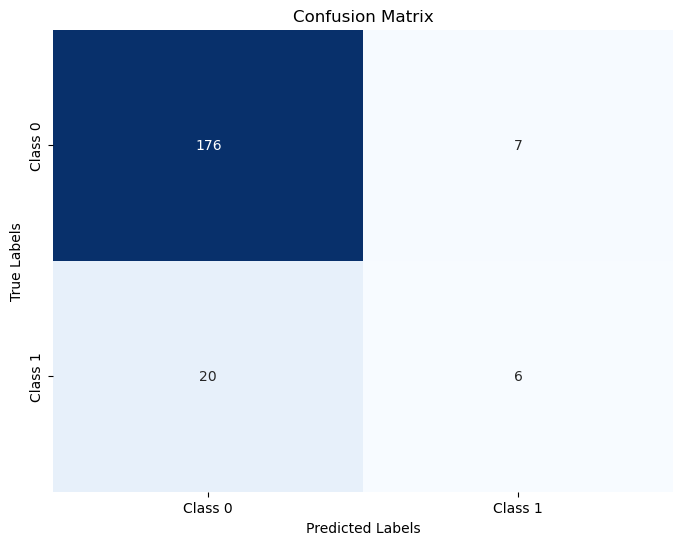

In [358]:
best_params2e2, best_model2e2 = grid_searcher(param_grid2e, best_model2d2, 'f1', X_train_2)
model_test(best_model2e2, X_test_2)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 0.8}
Time Taken: 1.083756446838379
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


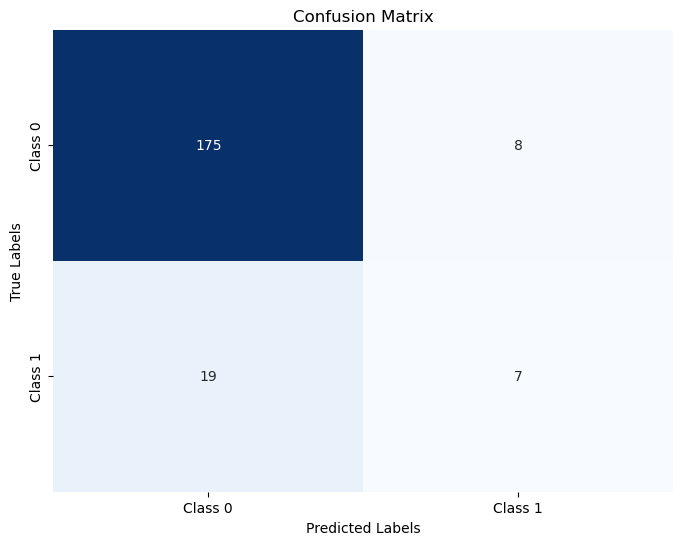

In [359]:
best_params2f2, best_model2f2 = grid_searcher(param_grid2f, best_model2e2, 'f1', X_train_2)
model_test(best_model2f2, X_test_2)

## SET 3

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 51}
Time Taken: 67.590891122818
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.36      0.19      0.25        26

    accuracy                           0.86       209
   macro avg       0.62      0.57      0.59       209
weighted avg       0.83      0.86      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


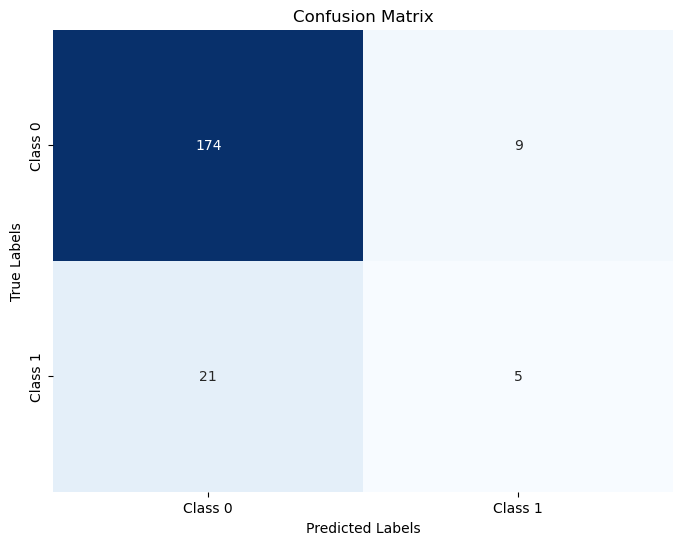

In [369]:
best_params2a3, best_model2a3 = grid_searcher(param_grid2a, pipeline2a, 'f1', X_train_3)
model_test(best_model2a3, X_test_3)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': True}
Time Taken: 0.778911828994751
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.36      0.19      0.25        26

    accuracy                           0.86       209
   macro avg       0.62      0.57      0.59       209
weighted avg       0.83      0.86      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


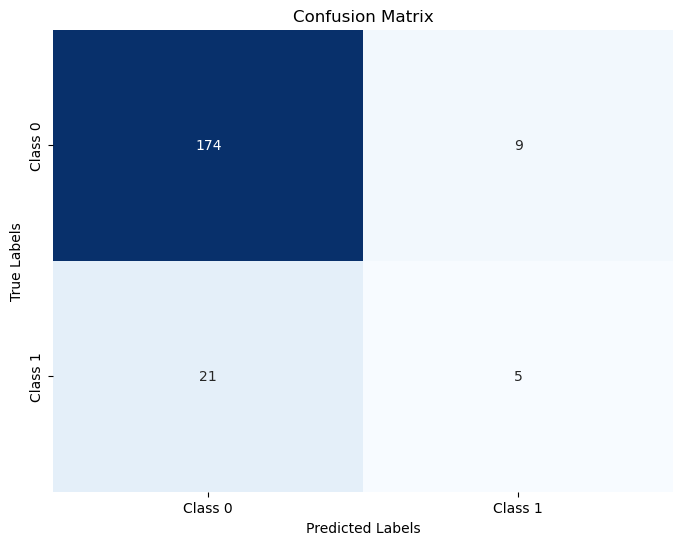

In [370]:
best_params2b3, best_model2b3 = grid_searcher(param_grid2b, best_model2a3, 'f1', X_train_3)
model_test(best_model2b3, X_test_3)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': None}
Time Taken: 1.8721704483032227
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.36      0.19      0.25        26

    accuracy                           0.86       209
   macro avg       0.62      0.57      0.59       209
weighted avg       0.83      0.86      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


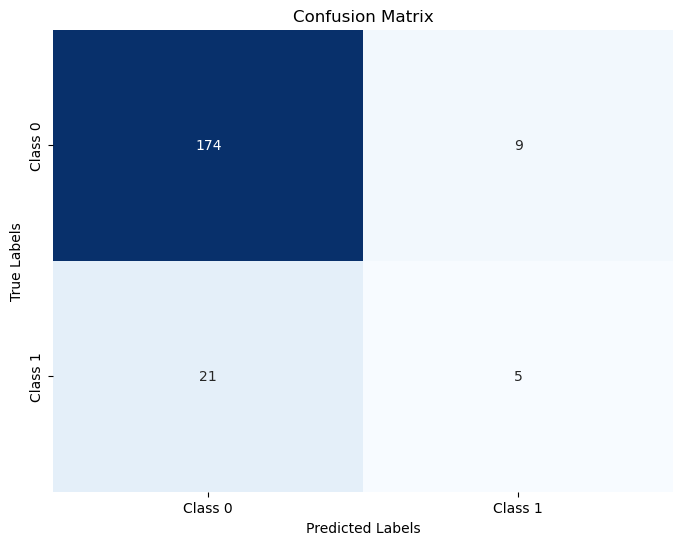

In [371]:
best_params2c3, best_model2c3 = grid_searcher(param_grid2c, best_model2b3, 'f1', X_train_3)
model_test(best_model2c3, X_test_3)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 1.7595901489257812
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.36      0.19      0.25        26

    accuracy                           0.86       209
   macro avg       0.62      0.57      0.59       209
weighted avg       0.83      0.86      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


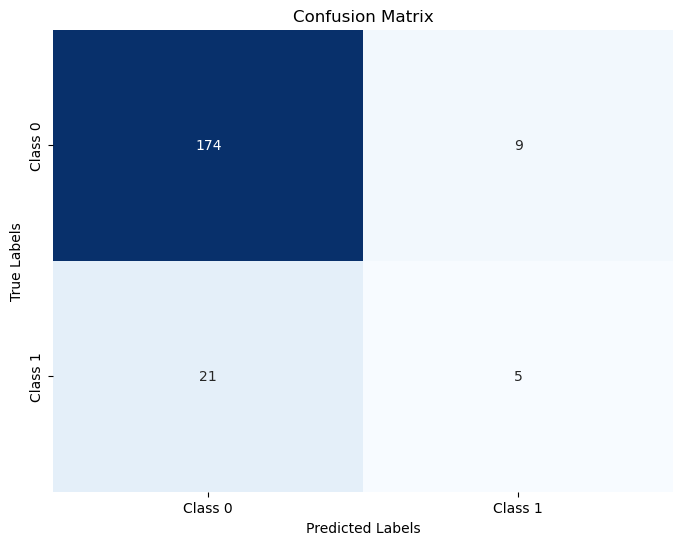

In [372]:
best_params2d3, best_model2d3 = grid_searcher(param_grid2d, best_model2c3, 'f1', X_train_3)
model_test(best_model2d3, X_test_3)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 1.330820083618164
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.36      0.19      0.25        26

    accuracy                           0.86       209
   macro avg       0.62      0.57      0.59       209
weighted avg       0.83      0.86      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


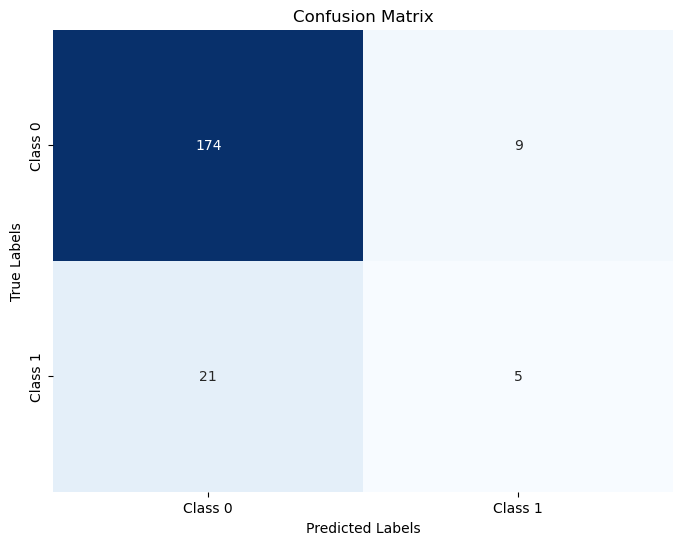

In [373]:
best_params2e3, best_model2e3 = grid_searcher(param_grid2e, best_model2d3, 'f1', X_train_3)
model_test(best_model2e3, X_test_3)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 1.0}
Time Taken: 2.4154269695281982
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.94      0.91       183
     Class 1       0.31      0.19      0.24        26

    accuracy                           0.85       209
   macro avg       0.60      0.57      0.58       209
weighted avg       0.82      0.85      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


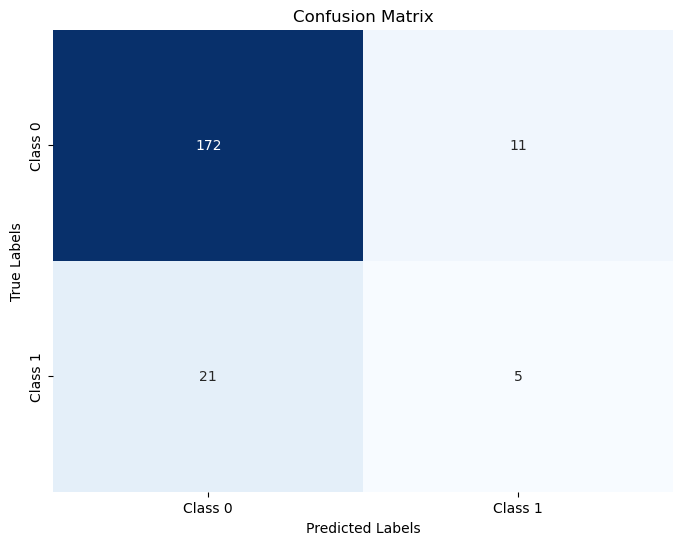

In [374]:
best_params2f3, best_model2f3 = grid_searcher(param_grid2f, best_model2e3, 'f1', X_train_3)
model_test(best_model2f3, X_test_3)

## SET 4

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 103}
Time Taken: 44.73733830451965
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.99      0.93       183
     Class 1       0.50      0.08      0.13        26

    accuracy                           0.88       209
   macro avg       0.69      0.53      0.53       209
weighted avg       0.84      0.88      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       181 |         2 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


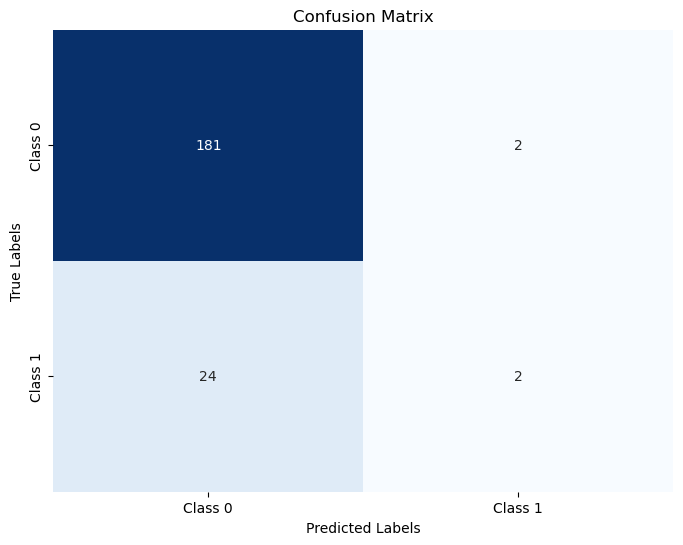

In [8]:
best_params2a4, best_model2a4 = grid_searcher(param_grid2a, pipeline2a, 'f1', X_train_4)
model_test(best_model2a4, X_test_4)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': False}
Time Taken: 0.8089187145233154
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.97      0.93       183
     Class 1       0.55      0.23      0.32        26

    accuracy                           0.88       209
   macro avg       0.72      0.60      0.63       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       178 |         5 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


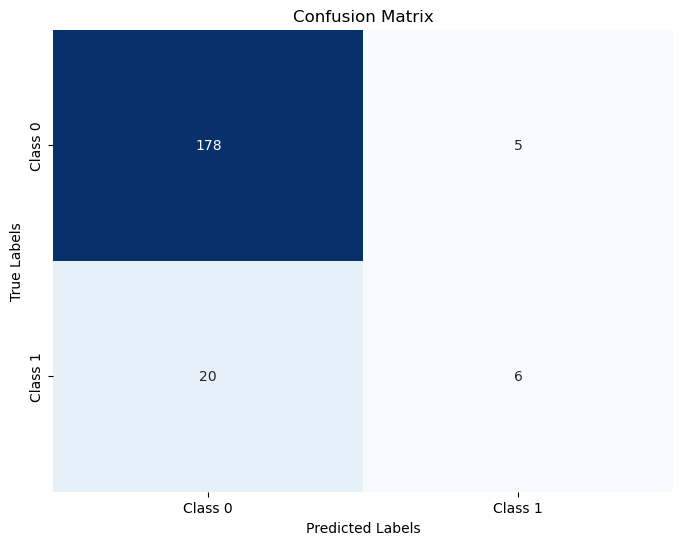

In [9]:
best_params2b4, best_model2b4 = grid_searcher(param_grid2b, best_model2a4, 'f1', X_train_4)
model_test(best_model2b4, X_test_4)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': None}
Time Taken: 1.7889442443847656
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.97      0.93       183
     Class 1       0.55      0.23      0.32        26

    accuracy                           0.88       209
   macro avg       0.72      0.60      0.63       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       178 |         5 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


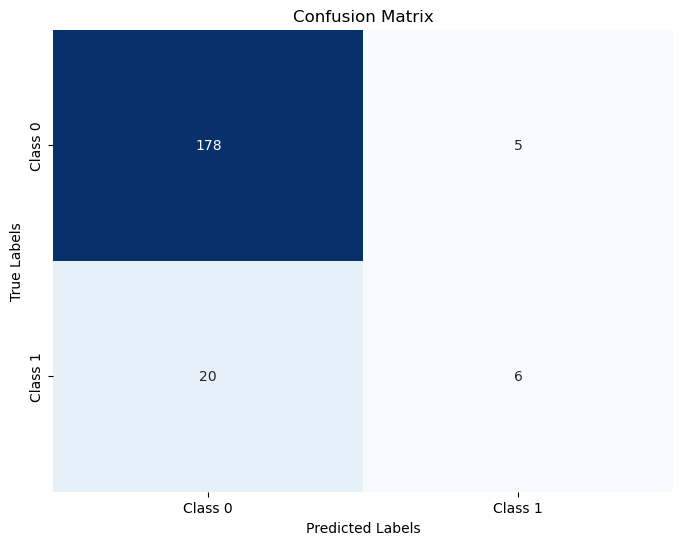

In [10]:
best_params2c4, best_model2c4 = grid_searcher(param_grid2c, best_model2b4, 'f1', X_train_4)
model_test(best_model2c4, X_test_4)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 1.4615447521209717
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.97      0.93       183
     Class 1       0.55      0.23      0.32        26

    accuracy                           0.88       209
   macro avg       0.72      0.60      0.63       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       178 |         5 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


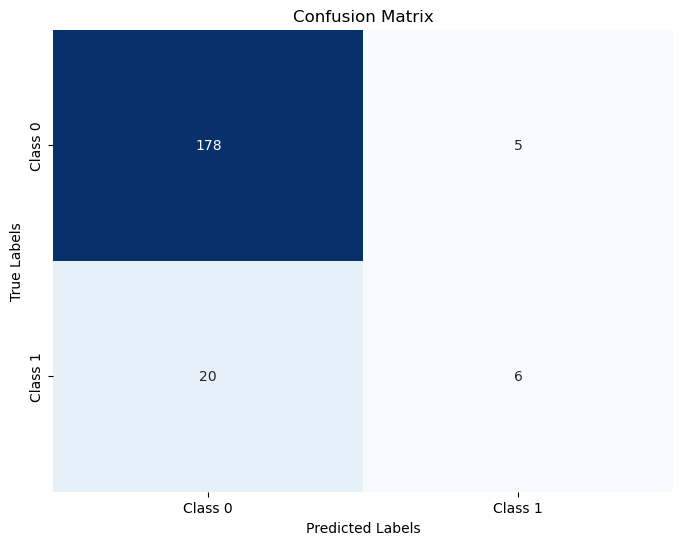

In [11]:
best_params2d4, best_model2d4 = grid_searcher(param_grid2d, best_model2c4, 'f1', X_train_4)
model_test(best_model2d4, X_test_4)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 1.0999891757965088
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.97      0.93       183
     Class 1       0.55      0.23      0.32        26

    accuracy                           0.88       209
   macro avg       0.72      0.60      0.63       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       178 |         5 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


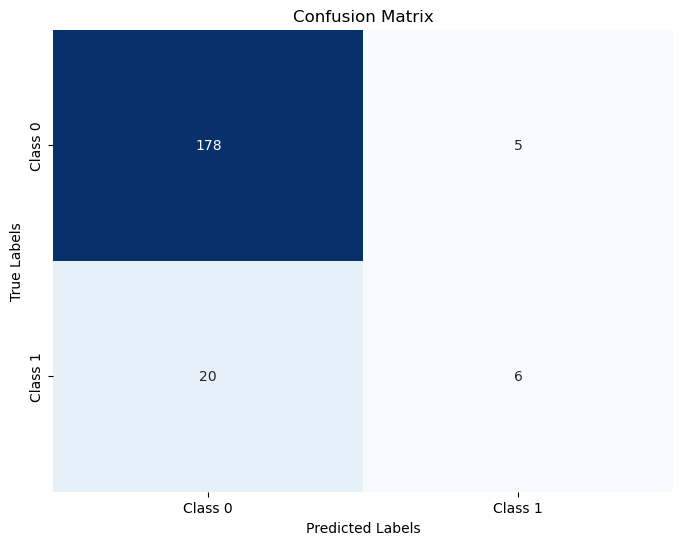

In [12]:
best_params2e4, best_model2e4 = grid_searcher(param_grid2e, best_model2d4, 'f1', X_train_4)
model_test(best_model2e4, X_test_4)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 1.0}
Time Taken: 2.1092820167541504
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.88      0.89       183
     Class 1       0.27      0.31      0.29        26

    accuracy                           0.81       209
   macro avg       0.58      0.59      0.59       209
weighted avg       0.82      0.81      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       161 |        22 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


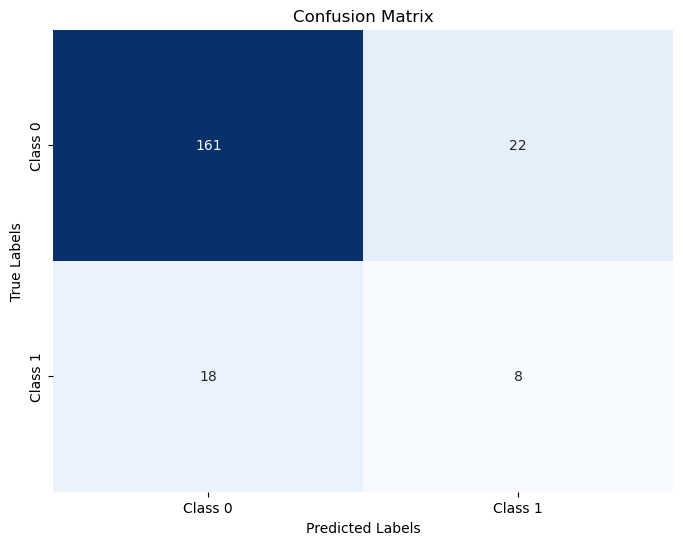

In [13]:
best_params2f4, best_model2f4 = grid_searcher(param_grid2f, best_model2e4, 'f1', X_train_4)
model_test(best_model2f4, X_test_4)

## SET 5

Fitting 10 folds for each of 151 candidates, totalling 1510 fits
Best Hyperparameters: {'model__n_estimators': 96}
Time Taken: 38.16395902633667
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.31      0.15      0.21        26

    accuracy                           0.85       209
   macro avg       0.60      0.55      0.56       209
weighted avg       0.82      0.85      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


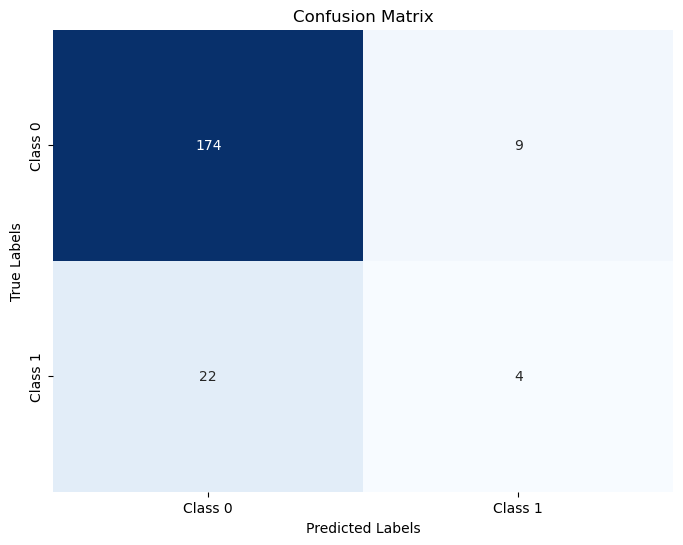

In [24]:
best_params2a5, best_model2a5 = grid_searcher(param_grid2a, pipeline2a, 'f1', X_train_5)
model_test(best_model2a5, X_test_5)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyperparameters: {'model__bootstrap': True}
Time Taken: 0.71893310546875
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       183
     Class 1       0.31      0.15      0.21        26

    accuracy                           0.85       209
   macro avg       0.60      0.55      0.56       209
weighted avg       0.82      0.85      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


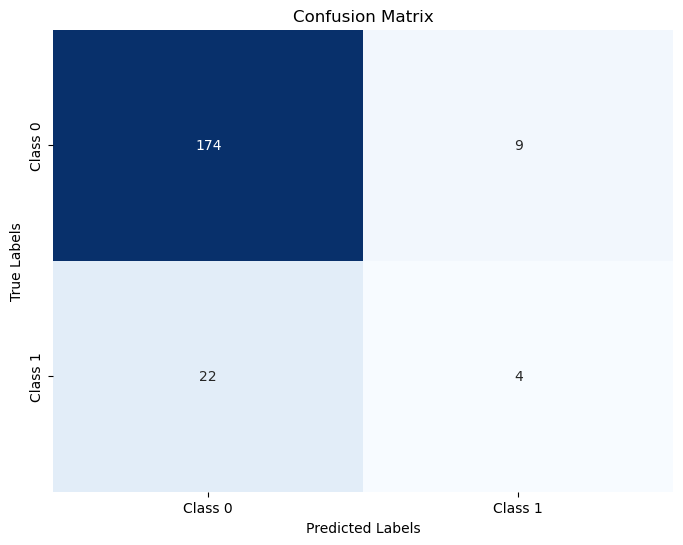

In [25]:
best_params2b5, best_model2b5 = grid_searcher(param_grid2b, best_model2a5, 'f1', X_train_5)
model_test(best_model2b5, X_test_5)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best Hyperparameters: {'model__max_depth': 15}
Time Taken: 1.7386713027954102
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91       183
     Class 1       0.17      0.08      0.11        26

    accuracy                           0.84       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.84      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


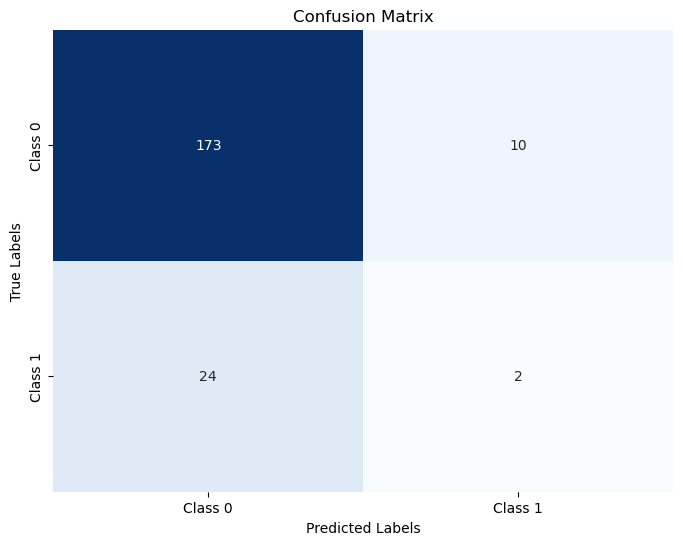

In [26]:
best_params2c5, best_model2c5 = grid_searcher(param_grid2c, best_model2b5, 'f1', X_train_5)
model_test(best_model2c5, X_test_5)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Hyperparameters: {'model__min_samples_split': 2}
Time Taken: 1.4794700145721436
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91       183
     Class 1       0.17      0.08      0.11        26

    accuracy                           0.84       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.84      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


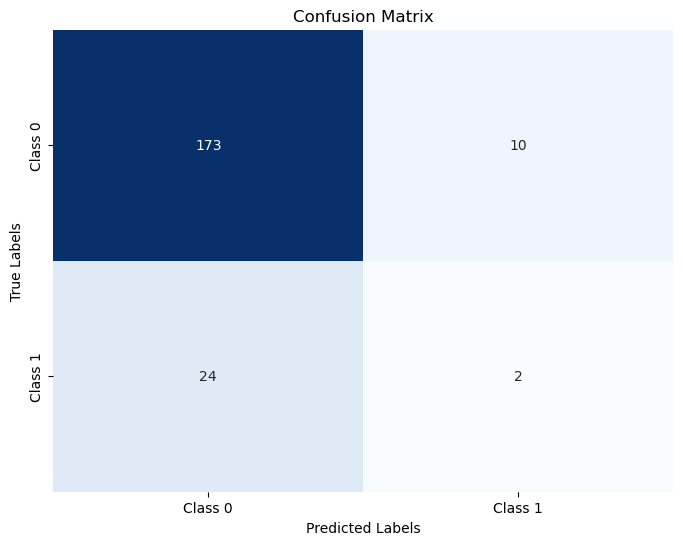

In [27]:
best_params2d5, best_model2d5 = grid_searcher(param_grid2d, best_model2c5, 'f1', X_train_5)
model_test(best_model2d5, X_test_5)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Hyperparameters: {'model__min_samples_leaf': 1}
Time Taken: 1.0978758335113525
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91       183
     Class 1       0.17      0.08      0.11        26

    accuracy                           0.84       209
   macro avg       0.52      0.51      0.51       209
weighted avg       0.79      0.84      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


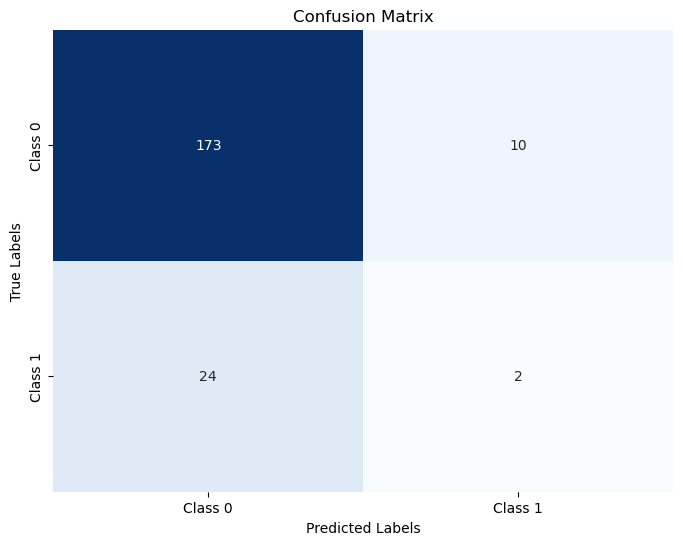

In [28]:
best_params2e5, best_model2e5 = grid_searcher(param_grid2e, best_model2d5, 'f1', X_train_5)
model_test(best_model2e5, X_test_5)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'model__max_features': 0.8}
Time Taken: 2.005831480026245
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.92       183
     Class 1       0.25      0.12      0.16        26

    accuracy                           0.85       209
   macro avg       0.57      0.53      0.54       209
weighted avg       0.80      0.85      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       174 |         9 |
+-----------+-----------+
|        23 |         3 |
+-----------+-----------+


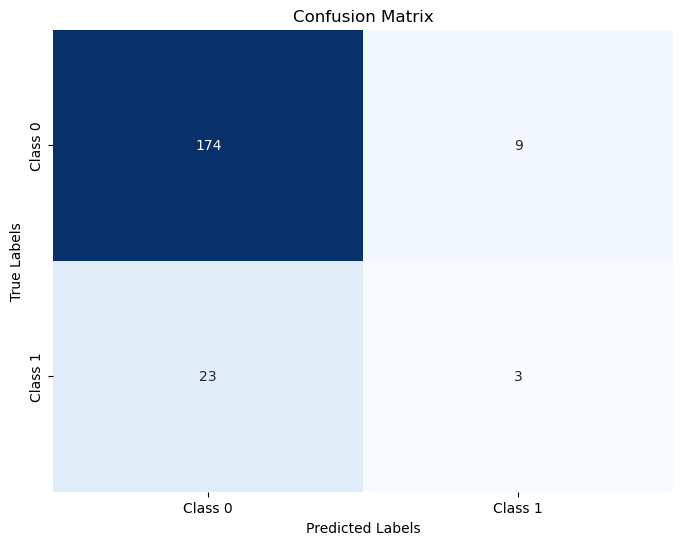

In [29]:
best_params2f5, best_model2f5 = grid_searcher(param_grid2f, best_model2e5, 'f1', X_train_5)
model_test(best_model2f5, X_test_5)

In [17]:
col_set1

['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']

# 

In [21]:
winsound.Beep(1000, 1000)

In [22]:
dir(winsound)

['Beep',
 'MB_ICONASTERISK',
 'MB_ICONEXCLAMATION',
 'MB_ICONHAND',
 'MB_ICONQUESTION',
 'MB_OK',
 'MessageBeep',
 'PlaySound',
 'SND_ALIAS',
 'SND_APPLICATION',
 'SND_ASYNC',
 'SND_FILENAME',
 'SND_LOOP',
 'SND_MEMORY',
 'SND_NODEFAULT',
 'SND_NOSTOP',
 'SND_NOWAIT',
 'SND_PURGE',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

In [14]:
f1_series = gridsearch_df.sort_values(by = 'f1', ascending = False)['f1']

In [33]:
for key, value in f1_series.items():
    print(f"{key}: {value}")

33: 0.42857142857142855
44: 0.4150943396226415
14: 0.4150943396226415
18: 0.40816326530612246
32: 0.4
11: 0.4
15: 0.3928571428571428
38: 0.39215686274509803
21: 0.39215686274509803
23: 0.3913043478260869
12: 0.3870967741935484
10: 0.3859649122807018
31: 0.38461538461538464
22: 0.38461538461538464
20: 0.3773584905660377
19: 0.3773584905660377
27: 0.37500000000000006
16: 0.3703703703703704
13: 0.3703703703703704
29: 0.36734693877551017
51: 0.36734693877551017
17: 0.3666666666666667
5: 0.3666666666666667
37: 0.3636363636363637
30: 0.3636363636363637
58: 0.35999999999999993
6: 0.3571428571428571
4: 0.3571428571428571
46: 0.35555555555555557
45: 0.3548387096774194
28: 0.35294117647058826
1: 0.35294117647058826
36: 0.3508771929824561
9: 0.35000000000000003
62: 0.34615384615384615
56: 0.34615384615384615
25: 0.34615384615384615
8: 0.3448275862068966
48: 0.34375
3: 0.34375
49: 0.3404255319148936
57: 0.33962264150943394
24: 0.33962264150943394
61: 0.3333333333333333
54: 0.3333333333333333
2: 0.

In [29]:
gridsearch_df.loc[33, :]

col_list                 [M, GRADE, T, IVC INV, MAX DIA, AGE, N]
best_params    {'model__bootstrap': True, 'model__class_weigh...
best_model     (SimpleImputer(strategy='median'), StandardSca...
report_test                  precision    recall  f1-score   ...
cm_table       +-----------+-----------+\n|   Class 0 |   Cla...
f1                                                      0.428571
Name: 33, dtype: object

In [34]:
for key, value in f1_series[:9].items():
    print(f"row = {key}")
    for col in ['col_list', 'report_test', 'cm_table', 'f1']:
        print(gridsearch_df.loc[key, col])
    print()

row = 33
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'N']
              precision    recall  f1-score   support

     Class 0       0.92      0.90      0.91       183
     Class 1       0.40      0.46      0.43        26

    accuracy                           0.85       209
   macro avg       0.66      0.68      0.67       209
weighted avg       0.86      0.85      0.85       209

+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       165 |        18 |
+-----------+-----------+
|        14 |        12 |
+-----------+-----------+
0.42857142857142855

row = 44
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'HEMATURIA', 'APPROACH_1']
              precision    recall  f1-score   support

     Class 0       0.92      0.91      0.92       183
     Class 1       0.41      0.42      0.42        26

    accuracy                           0.85       209
   macro avg       0.66      0.67      0.67       209
weighted avg       0.85      0.85      0.85       

In [23]:
col_set1

['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']

In [38]:
# param_grid1 = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'reg_lambda': [0, 0.1, 0.2],
#     'min_child_weight': [1, 2, 3],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.1, 0.2],
#     'scale_pos_weight': [1, 2, 3],
#     'max_delta_step': [0, 1, 2],
# }

In [41]:
3 * 3 * 3 * 3 * 3 * 3 * 3

2187

In [13]:
def make_pipeline_xgb():
    model = XC(random_state = 42)
    imputer = SimpleImputer(strategy = 'median')
    scaler = StandardScaler()
    pipeline = Pipeline([
        ('imputer', imputer),
        ('scaler', scaler),
        ('model', model)
    ])
    return pipeline

In [14]:
def massive_gridsearch_xgb():
    template = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']
    candidates = np.array(['AGE', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2', 'N'])
    # we first create a dictionary, which will store
    param_grid = {
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 4, 5],
        'model__min_child_weight': [1, 2, 3],
        'model__subsample': [0.8, 0.9, 1.0],
        'model__colsample_bytree': [0.8, 0.9, 1.0],
        'model__reg_lambda': [0, 0.1, 0.2],
        # 'reg_alpha': [0, 0.1, 0.2],
        # 'gamma': [0, 0.1, 0.2],
        # 'max_delta_step': [0, 1, 2],
        # 'scale_pos_weight': [1, 2, 3],
    }
    rows_list = []
    count = 0
    for perm in list(generate_permutations()):
        print(f"Index: {count}")
        new_list = template + list(candidates[list(map(bool, perm))])
        X_train_i = grade_X.loc[X_nt.index, new_list]
        X_test_i = grade_X.loc[X_t.index, new_list]
        pipeline = make_pipeline_xgb()
        best_params, best_model = grid_searcher(param_grid, pipeline, 'f1', X_train_i, cv = 5)
        report_test, cm_table, f1 = model_test(best_model, X_test_i, y_t, True, True)
        dict1 = {'col_list': new_list, 'best_params': best_params, 'best_model': best_model,
                 'report_test': report_test, 'cm_table': cm_table, 'f1': f1}
        rows_list.append(dict1)
        count += 1
        # winsound.Beep(1000, 10000)
        if count % 5 == 0:
            time.sleep(240)
        # else:
        #     time.sleep(60)
    df = pd.DataFrame(rows_list)
    return df

In [15]:
xgb_search_df = massive_gridsearch_xgb()

Index: 0
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__min_child_weight': 2, 'model__n_estimators': 300, 'model__reg_lambda': 0, 'model__subsample': 1.0}
Time Taken: 107.42876148223877
Index: 1
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__reg_lambda': 0, 'model__subsample': 0.8}
Time Taken: 95.65663862228394
Index: 2
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.2, 'model__max_depth': 4, 'model__min_child_weight': 1, 'model__n_estimators': 200, 'model__reg_lambda': 0.1, 'model__subsample': 1.0}
Time Taken: 94.86358332633972
Index: 3
Fitting 5 folds for each of 218

In [16]:
xgb_search_df

col_list  \
0                     [M, GRADE, T, IVC INV, MAX DIA]   
1                  [M, GRADE, T, IVC INV, MAX DIA, N]   
2         [M, GRADE, T, IVC INV, MAX DIA, APPROACH_2]   
3      [M, GRADE, T, IVC INV, MAX DIA, APPROACH_2, N]   
4         [M, GRADE, T, IVC INV, MAX DIA, APPROACH_1]   
..                                                ...   
59  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
60  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
61  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
62  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
63  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   

                                          best_params  \
0   {'model__colsample_bytree': 0.8, 'model__learn...   
1   {'model__colsample_bytree': 1.0, 'model__learn...   
2   {'model__colsample_bytree': 0.8, 'model__learn...   
3   {'model__colsample_bytree': 0.8, 'model__learn...   
4   {'model__colsample_bytree': 0.8, 'model__learn...   
..                                                ...   
59  {'model__colsample_bytree': 1.0, 'model__learn...   
60  {'model__colsample_bytree': 0.8, 'model__learn...   
61  {'model__colsample_bytree': 1.0, 'model__learn...   
62  {'model__colsample_bytree': 1.0, 'model__learn...   
63  {'model__colsample_bytree': 1.0, 'model__learn...   

                                           best_model  \
0   (SimpleImputer(strategy='median'), StandardSca...   
1   (SimpleImputer(strategy='median'), StandardSca...   
2   (SimpleImputer(strategy='median'), StandardSca...   
3   (SimpleImputer(strategy='median'), StandardSca...   
4   (SimpleImputer(strategy='median'), StandardSca...   
..                                                ...   
59  (SimpleImputer(strategy='median'), StandardSca...   
60  (SimpleImputer(strategy='median'), StandardSca...   
61  (SimpleImputer(strategy='median'), StandardSca...   
62  (SimpleImputer(strategy='median'), StandardSca...   
63  (SimpleImputer(strategy='median'), StandardSca...   

                                          report_test  \
0                 precision    recall  f1-score   ...   
1                 precision    recall  f1-score   ...   
2                 precision    recall  f1-score   ...   
3                 precision    recall  f1-score   ...   
4                 precision    recall  f1-score   ...   
..                                                ...   
59                precision    recall  f1-score   ...   
60                precision    recall  f1-score   ...   
61                precision    recall  f1-score   ...   
62                precision    recall  f1-score   ...   
63                precision    recall  f1-score   ...   

                                             cm_table        f1  
0   +-----------+-----------+\n|   Class 0 |   Cla...  0.181818  
1   +-----------+-----------+\n|   Class 0 |   Cla...  0.285714  
2   +-----------+-----------+\n|   Class 0 |   Cla...  0.270270  
3   +-----------+-----------+\n|   Class 0 |   Cla...  0.166667  
4   +-----------+-----------+\n|   Class 0 |   Cla...  0.222222  
..                                                ...       ...  
59  +-----------+-----------+\n|   Class 0 |   Cla...  0.210526  
60  +-----------+-----------+\n|   Class 0 |   Cla...  0.307692  
61  +-----------+-----------+\n|   Class 0 |   Cla...  0.333333  
62  +-----------+-----------+\n|   Class 0 |   Cla...  0.307692  
63  +-----------+-----------+\n|   Class 0 |   Cla...  0.270270  

[64 rows x 6 columns]

In [17]:
xgb_f1_series = xgb_search_df.sort_values(by = 'f1', ascending = False)['f1']

In [18]:
xgb_f1_series

25    0.428571
24    0.409091
30    0.400000
29    0.390244
23    0.380952
        ...   
43    0.146341
47    0.133333
13    0.121212
50    0.108108
56    0.108108
Name: f1, Length: 64, dtype: float64

In [26]:
for key, value in xgb_f1_series[:1].items():
    print(f"row = {key}")
    for col in ['col_list', 'report_test', 'cm_table', 'f1', 'best_params']:
        print(xgb_search_df.loc[key, col])
    print()

row = 25
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'N']
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.94       183
     Class 1       0.56      0.35      0.43        26

    accuracy                           0.89       209
   macro avg       0.74      0.65      0.68       209
weighted avg       0.87      0.89      0.87       209

+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+
0.4285714285714286
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__reg_lambda': 0.2, 'model__subsample': 1.0}



Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Best Hyperparameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__min_child_weight': 1, 'model__n_estimators': 250, 'model__reg_lambda': 0.3, 'model__scale_pos_weight': 3, 'model__subsample': 0.8}
Time Taken: 445.6523206233978
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.35      0.42        26

    accuracy                           0.88       209
   macro avg       0.72      0.65      0.68       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


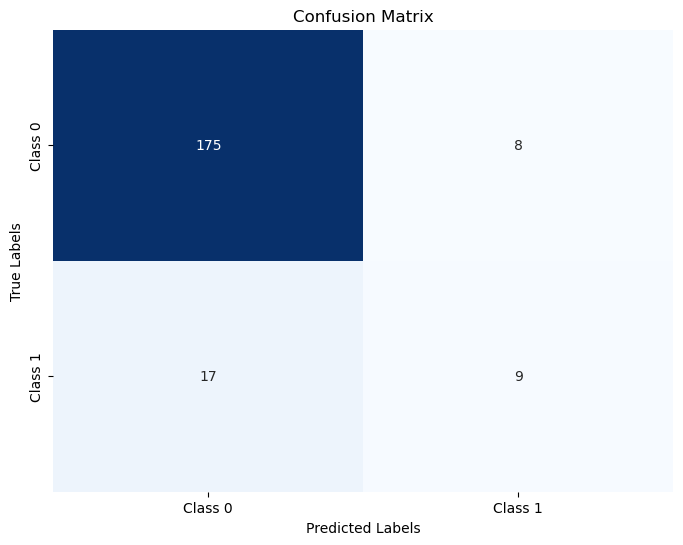

In [52]:
# Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__min_child_weight': 2,
#                        'model__n_estimators': 200, 'model__reg_lambda': 0.2, 'model__scale_pos_weight': 3, 'model__subsample': 1.0}
param_gridx1 = {
    'model__learning_rate': [5e-3, 1e-2, 1.5e-2],
    'model__n_estimators': [150, 200, 250, 300],
    'model__max_depth': [3, 4, 5],
    'model__min_child_weight': [1, 2, 3],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_lambda': [0.1, 0.2, 0.3],
    # 'reg_alpha': [0, 0.1, 0.2],
    # 'gamma': [0, 0.1, 0.2],
    # 'max_delta_step': [0, 1, 2],
    'model__scale_pos_weight': [1, 2, 3],
}
col_setx1 = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'N']
X_train_x1 = grade_X.loc[X_nt.index, col_setx1]
X_test_x1 = grade_X.loc[X_t.index, col_setx1]
# pipelinex1 = make_pipeline_xgb()
best_paramsx1, best_modelx1 = grid_searcher(param_gridx1, best_modelx, 'f1', X_train_x1, cv = 5)
model_test(best_modelx1, X_test_x1)
winsound.Beep(1000, 3000)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Hyperparameters: {'model__learning_rate': 0.01, 'model__n_estimators': 200, 'model__reg_lambda': 0.2, 'model__scale_pos_weight': 3}
Time Taken: 20.650458335876465
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.92      0.96      0.94       183
     Class 1       0.56      0.38      0.45        26

    accuracy                           0.89       209
   macro avg       0.74      0.67      0.70       209
weighted avg       0.87      0.89      0.88       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        16 |        10 |
+-----------+-----------+


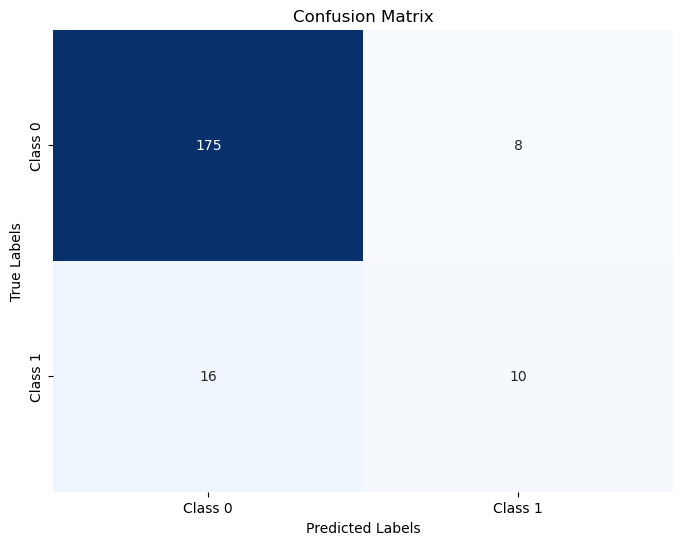

In [51]:
# Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__min_child_weight': 2,
#                        'model__n_estimators': 200, 'model__reg_lambda': 0.2, 'model__scale_pos_weight': 3, 'model__subsample': 1.0}
param_gridx1a = {
    'model__learning_rate': [5e-3, 1e-2, 1.5e-2],
    'model__n_estimators': [150, 200, 250],
    # 'model__max_depth': [3, 4, 5],
    # 'model__min_child_weight': [1, 2, 3],
    # 'model__subsample': [0.8, 0.9, 1.0],
    # 'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_lambda': [0.1, 0.2, 0.3],
    # 'reg_alpha': [0, 0.1, 0.2],
    # 'gamma': [0, 0.1, 0.2],
    # 'max_delta_step': [0, 1, 2],
    'model__scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}
col_setx1 = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'N']
X_train_x1 = grade_X.loc[X_nt.index, col_setx1]
X_test_x1 = grade_X.loc[X_t.index, col_setx1]
# pipelinex1 = make_pipeline_xgb()
best_paramsx1a, best_modelx1a = grid_searcher(param_gridx1a, best_modelx, 'f1', X_train_x1, cv = 5)
model_test(best_modelx1a, X_test_x1)
winsound.Beep(1000, 3000)

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__min_child_weight': 2, 'model__n_estimators': 200, 'model__reg_lambda': 0.2, 'model__scale_pos_weight': 3, 'model__subsample': 1.0}
Time Taken: 433.73374676704407
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.92      0.96      0.94       183
     Class 1       0.56      0.38      0.45        26

    accuracy                           0.89       209
   macro avg       0.74      0.67      0.70       209
weighted avg       0.87      0.89      0.88       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        16 |        10 |
+-----------+-----------+


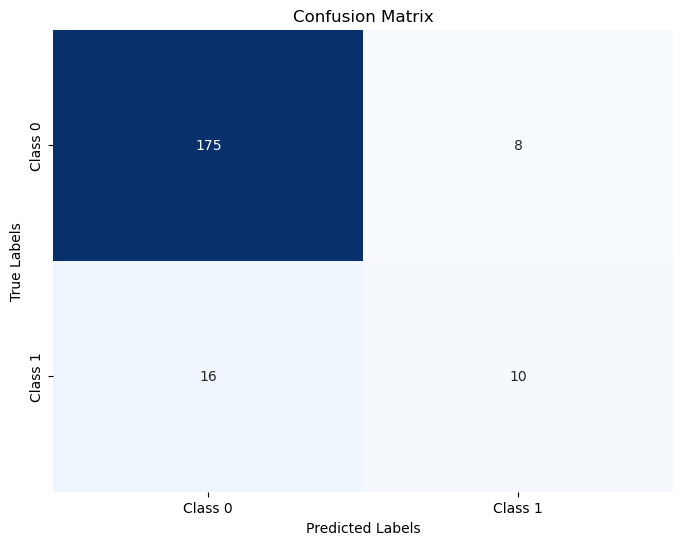

In [45]:
param_gridx = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5],
    'model__min_child_weight': [1, 2, 3],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_lambda': [0, 0.1, 0.2],
    # 'reg_alpha': [0, 0.1, 0.2],
    # 'gamma': [0, 0.1, 0.2],
    # 'max_delta_step': [0, 1, 2],
    'model__scale_pos_weight': [2, 3, 6, 8],
}
col_setx = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'N']
X_train_x = grade_X.loc[X_nt.index, col_setx]
X_test_x = grade_X.loc[X_t.index, col_setx]
pipelinex = make_pipeline_xgb()
best_paramsx, best_modelx = grid_searcher(param_gridx, pipelinex, 'f1', X_train_x, cv = 5)
model_test(best_modelx, X_test_x)
winsound.Beep(1000, 3000)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__min_child_weight': 2, 'model__n_estimators': 200, 'model__reg_lambda': 0.2, 'model__subsample': 1.0}
Time Taken: 123.87198781967163
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.92      0.96      0.94       183
     Class 1       0.56      0.38      0.45        26

    accuracy                           0.89       209
   macro avg       0.74      0.67      0.70       209
weighted avg       0.87      0.89      0.88       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        16 |        10 |
+-----------+-----------+


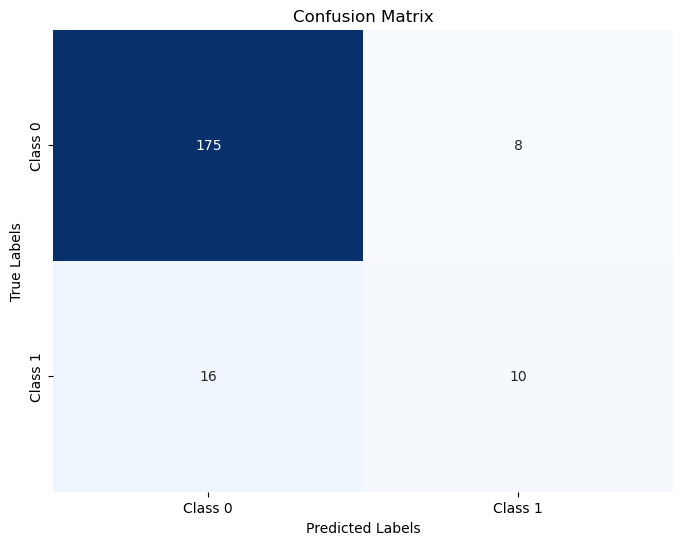

In [5]:
param_gridxa = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5],
    'model__min_child_weight': [1, 2, 3],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_lambda': [0, 0.1, 0.2],
    # 'model__reg_alpha': [0, 0.1, 0.2],
    # 'model__gamma': [0, 0.1, 0.2],
    # 'model__max_delta_step': [0, 1, 2],
    # 'model__scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8],
}
# pipelinexa = make_pipeline_xgb()
best_paramsxa, best_modelxa = grid_searcher(param_gridxa, best_modelx, 'f1', X_train_x, cv = 5)
model_test(best_modelxa, X_test_x)
winsound.Beep(1000, 3000)

In [39]:
len(y_nt)/y_nt.sum()

7.934426229508197

In [40]:
len(y_t)/y_t.sum()

8.038461538461538

In [7]:
# VANILLA/NORMAL
scaler = StandardScaler()
imputer = SimpleImputer(strategy = 'median')
svm1 = SVC(random_state = 42)
pipeline_svc1 = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('svm', svm1)
])

In [11]:
pipeline_svc1.fit(X_train_x, y_nt)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      1.00      0.94       183
     Class 1       1.00      0.08      0.14        26

    accuracy                           0.89       209
   macro avg       0.94      0.54      0.54       209
weighted avg       0.90      0.89      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       183 |         0 |
+-----------+-----------+
|        24 |         2 |
+-----------+-----------+


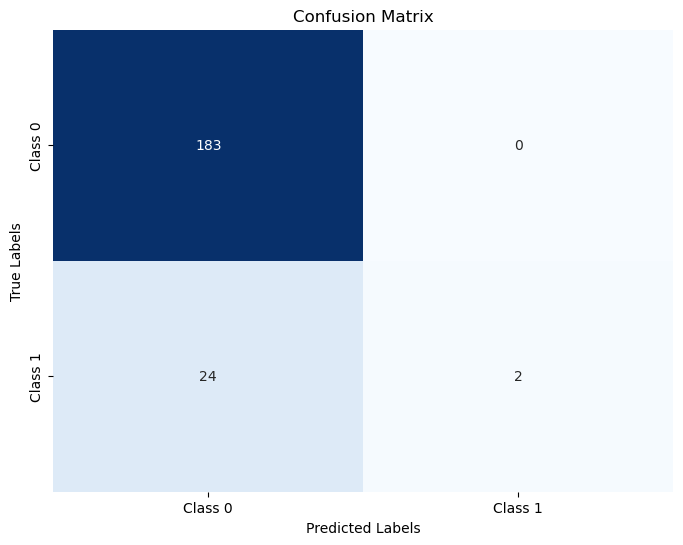

In [12]:
model_test(pipeline_svc1, X_test_x)

Fitting 10 folds for each of 1170 candidates, totalling 11700 fits
Best Hyperparameters: {'svm__C': 25, 'svm__degree': 4, 'svm__gamma': 0.9, 'svm__kernel': 'poly'}
Time Taken: 137.5229983329773
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.86      0.87       183
     Class 1       0.21      0.27      0.24        26

    accuracy                           0.78       209
   macro avg       0.55      0.56      0.56       209
weighted avg       0.81      0.78      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       157 |        26 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


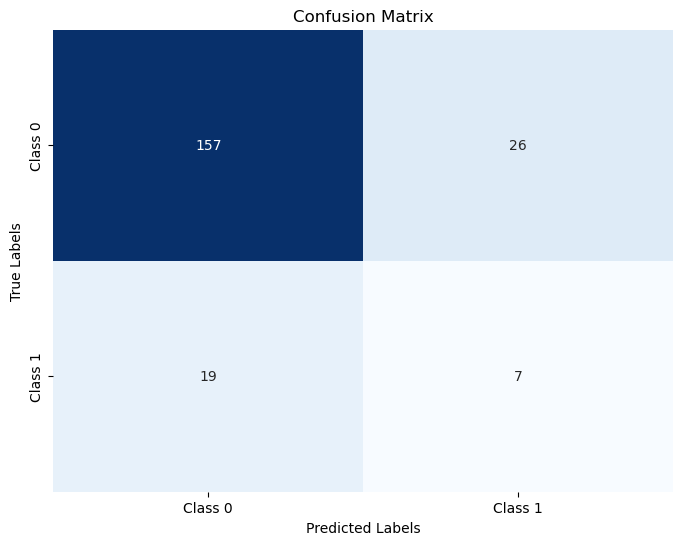

In [14]:
param_grid_svc1a = {
    'svm__C': [0.1, 0.25, 0.5, 1, 2, 2.5, 4, 5, 8, 10, 20, 25, 40], # 50, 75, 80, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': list(np.arange(0.1, 1, 0.1)) + ['auto'],  # Adjust the range based on your needs
    'svm__degree': [2, 3, 4],  # Only applicable for 'poly' kernel
}
best_params_svc1a, best_model_svc1a = grid_searcher(param_grid_svc1a, pipeline_svc1, 'f1', X_train_x, cv = 10)
model_test(best_model_svc1a, X_test_x)

In [16]:
X_train_x.columns

Index(['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'N'], dtype='object')

Fitting 10 folds for each of 1170 candidates, totalling 11700 fits
Best Hyperparameters: {'svm__C': 0.25, 'svm__degree': 2, 'svm__gamma': 0.8, 'svm__kernel': 'poly'}
Time Taken: 54.39265537261963
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.89       183
     Class 1       0.24      0.27      0.25        26

    accuracy                           0.80       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.81      0.80      0.81       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       161 |        22 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


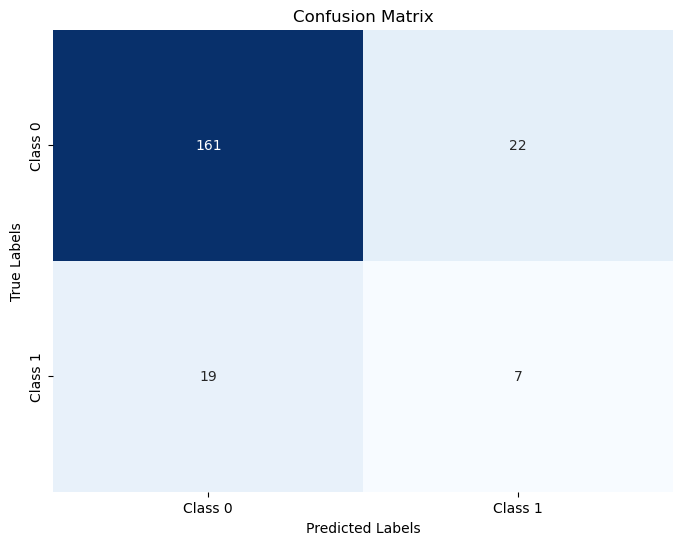

In [15]:
param_grid_svc1 = {
    'svm__C': [0.1, 0.25, 0.5, 1, 2, 2.5, 4, 5, 8, 10, 20, 25, 40], # 50, 75, 80, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': list(np.arange(0.1, 1, 0.1)) + ['auto'],  # Adjust the range based on your needs
    'svm__degree': [2, 3, 4],  # Only applicable for 'poly' kernel
}
best_params_svc1, best_model_svc1 = grid_searcher(param_grid_svc1, pipeline_svc1, 'f1', X_nt, cv = 10)
model_test(best_model_svc1, X_t)

In [6]:
def make_pipeline_svc():
    svc = SVC(random_state = 42)
    imputer = SimpleImputer(strategy = 'median')
    scaler = StandardScaler()
    pipeline = Pipeline([
        ('imputer', imputer),
        ('scaler', scaler),
        ('svm', svc)
    ])
    return pipeline

In [16]:
def massive_gridsearch_svc():
    template = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']
    candidates = np.array(['AGE', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2', 'N'])
    # we first create a dictionary, which will store
    param_grid = {
        'svm__C': [0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20, 40],
        'svm__kernel': ['linear', 'rbf', 'poly'],
        'svm__gamma': [0.1, 0.25, 0.5, 0.75, 1, 'auto'],
        'svm__degree': [2, 4],
        'svm__coef0': [0.0, 0.5, 1.0],  # Add coef0 parameter options
        'svm__class_weight': [None, 'balanced']  # Add class_weight parameter options
    }
    rows_list = []
    count = 0
    for perm in list(generate_permutations()):
        print(f"Index: {count}")
        new_list = template + list(candidates[list(map(bool, perm))])
        X_train_i = grade_X.loc[X_nt.index, new_list]
        X_test_i = grade_X.loc[X_t.index, new_list]
        pipeline = make_pipeline_svc()
        best_params, best_model = grid_searcher(param_grid, pipeline, 'f1', X_train_i, cv = 5)
        report_test, cm_table, f1 = model_test(best_model, X_test_i, y_t, True, True)
        dict1 = {'col_list': new_list, 'best_params': best_params, 'best_model': best_model,
                 'report_test': report_test, 'cm_table': cm_table, 'f1': f1}
        rows_list.append(dict1)
        count += 1
        winsound.Beep(1000, 1000)
        if count % 5 == 0:
            time.sleep(240)
        else:
            time.sleep(240)
    df = pd.DataFrame(rows_list)
    return df

In [ ]:
tic = time.time()
svc_search_df_new = massive_gridsearch_svc()
toc = time.time()
print(f"{toc - tic} seconds")

Index: 0
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best Hyperparameters: {'svm__C': 2.5, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 0.25, 'svm__kernel': 'rbf'}
Time Taken: 178.28371143341064
Index: 1
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best Hyperparameters: {'svm__C': 2.5, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Time Taken: 207.2700171470642


In [ ]:
tic = time.time()
svc_search_df = massive_gridsearch_svc()
toc = time.time()
print(f"{toc - tic} seconds")

Index: 0
Fitting 5 folds for each of 4212 candidates, totalling 21060 fits
Best Hyperparameters: {'svm__C': 2, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Time Taken: 410.09609842300415
Index: 1
Fitting 5 folds for each of 4212 candidates, totalling 21060 fits
Best Hyperparameters: {'svm__C': 2.5, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Time Taken: 449.3100688457489
Index: 2
Fitting 5 folds for each of 4212 candidates, totalling 21060 fits
Best Hyperparameters: {'svm__C': 0.25, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Time Taken: 355.15102195739746
Index: 3
Fitting 5 folds for each of 4212 candidates, totalling 21060 fits
Best Hyperparameters: {'svm__C': 40, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}
Time Ta

In [5]:
svc_search_df

col_list  \
0                     [M, GRADE, T, IVC INV, MAX DIA]   
1                  [M, GRADE, T, IVC INV, MAX DIA, N]   
2         [M, GRADE, T, IVC INV, MAX DIA, APPROACH_2]   
3      [M, GRADE, T, IVC INV, MAX DIA, APPROACH_2, N]   
4         [M, GRADE, T, IVC INV, MAX DIA, APPROACH_1]   
..                                                ...   
59  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
60  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
61  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
62  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
63  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   

                                          best_params  \
0   {'svm__C': 4, 'svm__degree': 4, 'svm__gamma': ...   
1   {'svm__C': 4, 'svm__degree': 4, 'svm__gamma': ...   
2   {'svm__C': 25, 'svm__degree': 4, 'svm__gamma':...   
3   {'svm__C': 40, 'svm__degree': 4, 'svm__gamma':...   
4   {'svm__C': 2.5, 'svm__degree': 4, 'svm__gamma'...   
..                                                ...   
59  {'svm__C': 4, 'svm__degree': 4, 'svm__gamma': ...   
60  {'svm__C': 8, 'svm__degree': 2, 'svm__gamma': ...   
61  {'svm__C': 8, 'svm__degree': 3, 'svm__gamma': ...   
62  {'svm__C': 40, 'svm__degree': 2, 'svm__gamma':...   
63  {'svm__C': 1, 'svm__degree': 4, 'svm__gamma': ...   

                                           best_model  \
0   (SimpleImputer(strategy='median'), StandardSca...   
1   (SimpleImputer(strategy='median'), StandardSca...   
2   (SimpleImputer(strategy='median'), StandardSca...   
3   (SimpleImputer(strategy='median'), StandardSca...   
4   (SimpleImputer(strategy='median'), StandardSca...   
..                                                ...   
59  (SimpleImputer(strategy='median'), StandardSca...   
60  (SimpleImputer(strategy='median'), StandardSca...   
61  (SimpleImputer(strategy='median'), StandardSca...   
62  (SimpleImputer(strategy='median'), StandardSca...   
63  (SimpleImputer(strategy='median'), StandardSca...   

                                          report_test  \
0                 precision    recall  f1-score   ...   
1                 precision    recall  f1-score   ...   
2                 precision    recall  f1-score   ...   
3                 precision    recall  f1-score   ...   
4                 precision    recall  f1-score   ...   
..                                                ...   
59                precision    recall  f1-score   ...   
60                precision    recall  f1-score   ...   
61                precision    recall  f1-score   ...   
62                precision    recall  f1-score   ...   
63                precision    recall  f1-score   ...   

                                             cm_table        f1  
0   +-----------+-----------+\n|   Class 0 |   Cla...  0.000000  
1   +-----------+-----------+\n|   Class 0 |   Cla...  0.125000  
2   +-----------+-----------+\n|   Class 0 |   Cla...  0.176471  
3   +-----------+-----------+\n|   Class 0 |   Cla...  0.256410  
4   +-----------+-----------+\n|   Class 0 |   Cla...  0.263158  
..                                                ...       ...  
59  +-----------+-----------+\n|   Class 0 |   Cla...  0.280702  
60  +-----------+-----------+\n|   Class 0 |   Cla...  0.294118  
61  +-----------+-----------+\n|   Class 0 |   Cla...  0.237288  
62  +-----------+-----------+\n|   Class 0 |   Cla...  0.324324  
63  +-----------+-----------+\n|   Class 0 |   Cla...  0.324324  

[64 rows x 6 columns]

In [34]:
for key, value in xgb_f1_series[:5].items():
    print(f"row = {key}")
    for col in ['col_list', 'f1', 'best_params']: # 'report_test', 'cm_table', 
        print(xgb_search_df.loc[key, col])
    print()

row = 25
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'N']
0.4285714285714286
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__reg_lambda': 0.2, 'model__subsample': 1.0}

row = 24
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA']
0.40909090909090906
{'model__colsample_bytree': 0.9, 'model__learning_rate': 0.2, 'model__max_depth': 4, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__reg_lambda': 0, 'model__subsample': 0.9}

row = 30
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2']
0.4
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__reg_lambda': 0, 'model__subsample': 0.9}

row = 29
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'N']
0.3902439024390244
{'model__

In [ ]:
# i want my function such that it retains the functionality of the original megafunction.
# whenever i run an iteration, it sort of retains the original configuration, 

In [ ]:
def massive_gridsearch_svc():
    template = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']
    candidates = np.array(['AGE', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2', 'N'])
    # we first create a dictionary, which will store
    param_grid = {
        'svm__C': [0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20, 40],
        'svm__kernel': ['linear', 'rbf', 'poly'],
        'svm__gamma': [0.1, 0.25, 0.5, 0.75, 1, 'auto'],
        'svm__degree': [2, 4],
        'svm__coef0': [0.0, 0.5, 1.0],  # Add coef0 parameter options
        'svm__class_weight': [None, 'balanced']  # Add class_weight parameter options
    }
    rows_list = []
    count = 0
    for perm in list(generate_permutations()):
        print(f"Index: {count}")
        new_list = template + list(candidates[list(map(bool, perm))])
        X_train_i = grade_X.loc[X_nt.index, new_list]
        X_test_i = grade_X.loc[X_t.index, new_list]
        pipeline = make_pipeline_svc()
        best_params, best_model = grid_searcher(param_grid, pipeline, 'f1', X_train_i, cv = 5)
        report_test, cm_table, f1 = model_test(best_model, X_test_i, y_t, True, True)
        dict1 = {'col_list': new_list, 'best_params': best_params, 'best_model': best_model,
                 'report_test': report_test, 'cm_table': cm_table, 'f1': f1}
        rows_list.append(dict1)
        count += 1
        winsound.Beep(1000, 1000)
        if count % 5 == 0:
            time.sleep(240)
        else:
            time.sleep(240)
    df = pd.DataFrame(rows_list)
    return df

In [13]:
def increment_and_print():
    if not hasattr(increment_and_print, "static_variable"):
        increment_and_print.static_variable = 0
    print(increment_and_print.static_variable)
    increment_and_print.static_variable += 1

In [7]:
template = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']
candidates = np.array(['AGE', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2', 'N'])
param_grid = {
    'svm__C': [0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20, 40],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': [0.1, 0.25, 0.5, 0.75, 1, 'auto'],
    'svm__degree': [2, 4],
    'svm__coef0': [0.0, 0.5, 1.0],  # Add coef0 parameter options
    'svm__class_weight': [None, 'balanced']  # Add class_weight parameter options
}
svc_rows_list = []
feature_perms = dict(enumerate(generate_permutations()))

In [24]:
# def massive_gridsearch_svc():
#     if not hasattr(massive_gridsearch_svc, "static_variable"):
#         massive_gridsearch_svc.static_variable = 0
#     perm = feature_perms[massive_gridsearch_svc.static_variable]
#     print(perm)
#     new_list = template + list(candidates[list(map(bool, perm))])
#     X_train_i = grade_X.loc[X_nt.index, new_list]
#     X_test_i = grade_X.loc[X_t.index, new_list]
#     pipeline = make_pipeline_svc()
#     best_params, best_model = grid_searcher(param_grid, pipeline, 'f1', X_train_i, cv = 5)
#     report_test, cm_table, f1 = model_test(best_model, X_test_i, y_t, True, True)
#     dict1 = {'col_list': new_list, 'best_params': best_params, 'best_model': best_model,
#              'report_test': report_test, 'cm_table': cm_table, 'f1': f1}
#     svc_rows_list.append(dict1)
#     winsound.Beep(1000, 1000)
#     massive_gridsearch_svc.static_variable += 1

In [36]:
increment_and_print()

20


In [21]:
len(svc_rows_list)

64

In [ ]:
massive_gridsearch_svc()

In [6]:
def generate_permutations():
    imputation_values = [0, 1]
    permutations = itertools.product(imputation_values, repeat=6)
    # permutations = [np.random.choice(imputation_values, size = 6) for _ in range(num_samples)]
    return permutations

In [26]:
svc_search_df = pd.DataFrame(svc_rows_list)
svc_search_df

col_list  \
0                     [M, GRADE, T, IVC INV, MAX DIA]   
1                  [M, GRADE, T, IVC INV, MAX DIA, N]   
2         [M, GRADE, T, IVC INV, MAX DIA, APPROACH_2]   
3      [M, GRADE, T, IVC INV, MAX DIA, APPROACH_2, N]   
4         [M, GRADE, T, IVC INV, MAX DIA, APPROACH_1]   
..                                                ...   
59  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
60  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
61  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
62  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   
63  [M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...   

                                          best_params  \
0   {'svm__C': 2.5, 'svm__class_weight': 'balanced...   
1   {'svm__C': 2.5, 'svm__class_weight': 'balanced...   
2   {'svm__C': 0.25, 'svm__class_weight': 'balance...   
3   {'svm__C': 40, 'svm__class_weight': 'balanced'...   
4   {'svm__C': 5, 'svm__class_weight': 'balanced',...   
..                                                ...   
59  {'svm__C': 1, 'svm__class_weight': 'balanced',...   
60  {'svm__C': 0.1, 'svm__class_weight': 'balanced...   
61  {'svm__C': 0.25, 'svm__class_weight': 'balance...   
62  {'svm__C': 10, 'svm__class_weight': 'balanced'...   
63  {'svm__C': 1, 'svm__class_weight': 'balanced',...   

                                           best_model  \
0   (SimpleImputer(strategy='median'), StandardSca...   
1   (SimpleImputer(strategy='median'), StandardSca...   
2   (SimpleImputer(strategy='median'), StandardSca...   
3   (SimpleImputer(strategy='median'), StandardSca...   
4   (SimpleImputer(strategy='median'), StandardSca...   
..                                                ...   
59  (SimpleImputer(strategy='median'), StandardSca...   
60  (SimpleImputer(strategy='median'), StandardSca...   
61  (SimpleImputer(strategy='median'), StandardSca...   
62  (SimpleImputer(strategy='median'), StandardSca...   
63  (SimpleImputer(strategy='median'), StandardSca...   

                                          report_test  \
0                 precision    recall  f1-score   ...   
1                 precision    recall  f1-score   ...   
2                 precision    recall  f1-score   ...   
3                 precision    recall  f1-score   ...   
4                 precision    recall  f1-score   ...   
..                                                ...   
59                precision    recall  f1-score   ...   
60                precision    recall  f1-score   ...   
61                precision    recall  f1-score   ...   
62                precision    recall  f1-score   ...   
63                precision    recall  f1-score   ...   

                                             cm_table        f1  
0   +-----------+-----------+\n|   Class 0 |   Cla...  0.363636  
1   +-----------+-----------+\n|   Class 0 |   Cla...  0.378378  
2   +-----------+-----------+\n|   Class 0 |   Cla...  0.350000  
3   +-----------+-----------+\n|   Class 0 |   Cla...  0.346939  
4   +-----------+-----------+\n|   Class 0 |   Cla...  0.390244  
..                                                ...       ...  
59  +-----------+-----------+\n|   Class 0 |   Cla...  0.320988  
60  +-----------+-----------+\n|   Class 0 |   Cla...  0.357143  
61  +-----------+-----------+\n|   Class 0 |   Cla...  0.342857  
62  +-----------+-----------+\n|   Class 0 |   Cla...  0.346667  
63  +-----------+-----------+\n|   Class 0 |   Cla...  0.361446  

[64 rows x 6 columns]

In [27]:
svc_f1_series = svc_search_df.sort_values(by = 'f1', ascending = False)['f1']
svc_f1_series

12    0.492308
14    0.418605
15    0.404494
10    0.400000
20    0.400000
        ...   
54    0.282609
18    0.282051
48    0.281690
49    0.268657
52    0.242424
Name: f1, Length: 64, dtype: float64

In [28]:
for key, value in svc_f1_series.items():
    print(f"{key}: {value}")

12: 0.4923076923076924
14: 0.41860465116279066
15: 0.4044943820224719
10: 0.4
20: 0.4
43: 0.39534883720930236
4: 0.3902439024390244
28: 0.3896103896103896
23: 0.38775510204081626
29: 0.3835616438356164
27: 0.380952380952381
21: 0.380952380952381
1: 0.3783783783783784
41: 0.37362637362637363
42: 0.37362637362637363
38: 0.37362637362637363
13: 0.37362637362637363
6: 0.37362637362637363
36: 0.37362637362637363
45: 0.37209302325581395
7: 0.36363636363636365
37: 0.36363636363636365
57: 0.36363636363636365
0: 0.36363636363636365
63: 0.3614457831325302
40: 0.36000000000000004
47: 0.3595505617977528
5: 0.3595505617977528
33: 0.3578947368421053
60: 0.3571428571428572
44: 0.3564356435643564
46: 0.35555555555555557
34: 0.35555555555555557
25: 0.35555555555555557
58: 0.35514018691588783
39: 0.35294117647058826
32: 0.35051546391752575
2: 0.35000000000000003
8: 0.34951456310679613
3: 0.34693877551020413
62: 0.3466666666666667
31: 0.34545454545454546
11: 0.3440860215053763
56: 0.3440860215053763
35: 

In [29]:
for key, value in svc_f1_series[:5].items():
    print(f"row = {key}")
    for col in ['col_list', 'report_test', 'cm_table', 'f1', 'best_params']:
        print(svc_search_df.loc[key, col])
    print()

row = 12
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'HEMATURIA', 'APPROACH_1']
              precision    recall  f1-score   support

     Class 0       0.94      0.87      0.91       183
     Class 1       0.41      0.62      0.49        26

    accuracy                           0.84       209
   macro avg       0.68      0.74      0.70       209
weighted avg       0.88      0.84      0.85       209

+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       160 |        23 |
+-----------+-----------+
|        10 |        16 |
+-----------+-----------+
0.4923076923076924
{'svm__C': 1, 'svm__class_weight': 'balanced', 'svm__coef0': 0.5, 'svm__degree': 4, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}

row = 14
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2']
              precision    recall  f1-score   support

     Class 0       0.95      0.77      0.85       183
     Class 1       0.30      0.69      0.42        26

    accurac

In [33]:
for key, value in svc_f1_series[:5].items():
    print(f"row = {key}")
    for col in ['col_list', 'f1', 'best_params']: # 'report_test', 'cm_table', 
        print(svc_search_df.loc[key, col])
    print()

row = 12
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'HEMATURIA', 'APPROACH_1']
0.4923076923076924
{'svm__C': 1, 'svm__class_weight': 'balanced', 'svm__coef0': 0.5, 'svm__degree': 4, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}

row = 14
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2']
0.41860465116279066
{'svm__C': 0.25, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 0.25, 'svm__kernel': 'rbf'}

row = 15
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2', 'N']
0.4044943820224719
{'svm__C': 0.25, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 0.25, 'svm__kernel': 'rbf'}

row = 10
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'HEMATURIA', 'APPROACH_2']
0.4
{'svm__C': 0.25, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 0.5, 'svm__kernel': 'rbf'}

row = 20
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'APPROACH_1']
0.

In [35]:
template

['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']

In [34]:
for key, value in xgb_f1_series[:5].items():
    print(f"row = {key}")
    for col in ['col_list', 'f1', 'best_params']: # 'report_test', 'cm_table', 
        print(svc_search_df.loc[key, col])
    print()

row = 25
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'N']
0.35555555555555557
{'svm__C': 0.25, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}

row = 24
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA']
0.3170731707317073
{'svm__C': 2.5, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}

row = 30
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2']
0.33766233766233766
{'svm__C': 1, 'svm__class_weight': 'balanced', 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 0.25, 'svm__kernel': 'rbf'}

row = 29
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'N']
0.3835616438356164
{'svm__C': 0.25, 'svm__class_weight': 'balanced', 'svm__coef0': 0.5, 'svm__degree': 4, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}

row = 23
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'MONTH